<h1 align="center">
<img src="https://drive.google.com/uc?export=view&id=1_ZkE3dnYg9KykzdZE6lIK2s_q_nbiKk_" width="160" height="160">
</h1>
<h1 align="center">Massive Data Analytics - 25577</h1>
<h3 align="center">Dr. Gholampour</h3>
<h5 align="center">Sharif University of Technology<br/>Electrical Engineering Department<br/>  Fall 2022</h5>

---

# Project
<h4 align="center">Vahid Pourakbar     400205511</h4>

## Spark Installation And Downloading Data

In [2]:
!apt update

Ign:1 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:5 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:6 http://archive.ubuntu.com/ubuntu focal InRelease
Get:7 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:9 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Get:12 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:14 http://security.ubuntu.com/ubuntu focal-securi

In [3]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq --fix-missing
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 20.3 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=548728dbbc8934cb83f894d0227c67408d1690cfe01f05dd11c682054c97c912
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The followin

In [4]:
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
!unzip drive/MyDrive/SUT/MDA2022ProjectData.zip 

Archive:  drive/MyDrive/SUT/MDA2022ProjectData.zip
  inflating: MDA2022ProjectData.csv  


## Part 0
***Preprocessing and cleaning up data***

In [6]:
import numpy as np
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("MDA_2022_PROJECT") \
    .master("local[*]") \
    .getOrCreate()

spark.sparkContext.setCheckpointDir("checkpoint directory")
sc=spark.sparkContext


In [7]:
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark.sql.types import *

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
get_ipython().system_raw('./ngrok http 4050 &')
!curl -s http://localhost:4040/api/tunnels

--2023-02-05 20:41:02--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.202.168.65, 54.161.241.46, 54.237.133.81, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.202.168.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.1’

ngrok-stable-linux- 100%[===================>]  13.19M  5.96MB/s    in 2.2s    

2023-02-05 20:41:05 (5.96 MB/s) - ‘ngrok-stable-linux-amd64.zip.1’ saved [13832437/13832437]

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ngrok                   
{"tunnels":[{"name":"command_line","uri":"/api/tunnels/command_line","public_url":"https://254c-34-80-173-48.ngrok.io","proto":"https","config":{"addr":"http://localhost:4050","inspect":true},"metrics":{"conns":{"count":2,"gauge":0,"rate1":0.006040663754846687,"rate5":0.0047372883420303

In [8]:
dataframe = spark.read.format("csv") \
  .option("inferSchema", True) \
  .option("header", True) \
  .option("sep", ",") \
  .load("MDA2022ProjectData.csv")
dataframe.limit(20).show()

+-----------+---------+---------------+-------------+----------------+----------+-------------------+
|DEVICE_CODE|SYSTEM_ID|ORIGINE_CAR_KEY|FINAL_CAR_KEY|CHECK_STATUS_KEY|COMPANY_ID|      PASS_DAY_TIME|
+-----------+---------+---------------+-------------+----------------+----------+-------------------+
|   22010047|      284|       63455590|     63455590|               6|       161|2021-12-22 00:59:30|
|   22010054|      284|       63566637|     64111706|               7|       161|2021-12-22 01:24:58|
|   22010057|      284|       63653636|     63653636|               6|       161|2021-12-22 00:46:37|
|   22010039|      284|       63562975|     64111706|               7|       161|2021-12-22 00:27:32|
|   22010053|      284|       63634047|     64111706|               7|       161|2021-12-22 01:29:24|
|  100701119|      284|       63466030|     64111706|               7|       161|2021-12-22 01:05:33|
|   22010047|      284|       63479234|     63479234|               6|       161|2

In [ ]:
# dataframe.summary().show()

+-------+--------------------+------------------+--------------------+--------------------+-----------------+------------------+
|summary|         DEVICE_CODE|         SYSTEM_ID|     ORIGINE_CAR_KEY|       FINAL_CAR_KEY| CHECK_STATUS_KEY|        COMPANY_ID|
+-------+--------------------+------------------+--------------------+--------------------+-----------------+------------------+
|  count|           137860560|         137860560|           137860560|           137500256|        137500256|         137860560|
|   mean|2.0409413625759594E7|228.91315492262618|3.8876864354355924E7| 4.023159558635585E7| 5.43343081484881|214.39138850879468|
| stddev| 3.658430903524803E7| 87.57389372594602|3.2729616408470348E7|3.1743341283397306E7|0.696407497939759| 65.47375894020084|
|    min|                 100|                81|             7631921|             7631921|                1|                 0|
|    25%|              631799|               102|            10104804|            10326422|      

In [9]:
dataframe.cache()

DataFrame[DEVICE_CODE: int, SYSTEM_ID: int, ORIGINE_CAR_KEY: int, FINAL_CAR_KEY: int, CHECK_STATUS_KEY: int, COMPANY_ID: int, PASS_DAY_TIME: timestamp]

In [ ]:
print('dataframe rows count:\t', dataframe.count())
print('dataframe cars count:\t', dataframe.select('FINAL_CAR_KEY').distinct().count())
print('dataframe cameras count:\t', dataframe.select('DEVICE_CODE').distinct().count())

dataframe rows count:	 137860560
dataframe cars count:	 11825779
dataframe cameras count:	 983


In [10]:
sample_df = dataframe
# sample_df = dataframe.sample(False ,fraction=0.01, seed=3)
# sample_df.summary().show()

In [ ]:
# sample_DATA_COUNT = sample_df.count()
# sample_CAR_COUNT = sample_df.select('FINAL_CAR_KEY').distinct().count()
# sample_CAMERA_COUNT = sample_df.select('DEVICE_CODE').distinct().count()
# print('sample dataframe rows count: \t', sample_DATA_COUNT)
# print('sample dataframe cars count: \t', sample_CAR_COUNT)
# print('sample dataframe cameras count: \t', sample_CAMERA_COUNT)

sample dataframe rows count: 	 1379248
sample dataframe cars count: 	 898312
sample dataframe cameras count: 	 959


In [ ]:
sample_df.groupBy('DEVICE_CODE').count()\
.sort('count', ascending=False).show()

+-----------+-------+
|DEVICE_CODE|  count|
+-----------+-------+
|     900212|2691052|
|     900244|2675087|
|  100700853|2262938|
|     900269|2223929|
|     900222|1913133|
|     631634|1756297|
|     900101|1715822|
|     900142|1599632|
|  100700841|1522286|
|     900225|1507290|
|     900268|1470360|
|     631633|1432201|
|     900155|1431657|
|     900246|1388846|
|     900236|1374651|
|     900164|1298190|
|     900191|1297814|
|     631357|1230004|
|  100700804|1174342|
|   22010054|1155678|
+-----------+-------+
only showing top 20 rows



In [ ]:
sample_df.groupBy('FINAL_CAR_KEY').count() \
  .sort('count', ascending=False).show()

+-------------+--------+
|FINAL_CAR_KEY|   count|
+-------------+--------+
|     64111706|12749535|
|         null|  360304|
|     69177480|  321060|
|      8073331|  147394|
|     91715532|    3033|
|      7633319|    2208|
|      7682972|    1834|
|      8282689|    1667|
|     12481252|    1655|
|      8396536|    1651|
|     76478733|    1644|
|     70522715|    1597|
|     26516372|    1567|
|      7726986|    1501|
|     40425941|    1499|
|      8358998|    1478|
|     11054045|    1416|
|     15147933|    1400|
|      8552081|    1399|
|      7632644|    1382|
+-------------+--------+
only showing top 20 rows



In [ ]:
# top camera and companies producing Null in FINAL_CAR_KEY
sample_df.filter(col("FINAL_CAR_KEY").isNull()).groupBy('DEVICE_CODE', 'COMPANY_ID').count()\
  .sort('count', ascending=False).show()

+-----------+----------+-----+
|DEVICE_CODE|COMPANY_ID|count|
+-----------+----------+-----+
|     900269|       264|10187|
|     631357|       161| 7393|
|     900222|       264| 6619|
|     631795|       161| 6081|
|     900246|       264| 5987|
|     900101|       264| 5804|
|     900225|       264| 5492|
|     900244|       264| 5328|
|     900155|       264| 5280|
|     900214|       264| 5041|
|     900164|       264| 4731|
|     900236|       264| 4607|
|     900212|       264| 4357|
|        114|       161| 4283|
|     631829|       161| 4055|
|     900268|       264| 3982|
|  100700804|       264| 3913|
|  100700841|       264| 3769|
|     900102|       264| 3652|
|     631368|       161| 3550|
+-----------+----------+-----+
only showing top 20 rows



In [ ]:
sample_df.filter(col('ORIGINE_CAR_KEY') != col('FINAL_CAR_KEY')).show()

+-----------+---------+---------------+-------------+----------------+----------+-------------------+
|DEVICE_CODE|SYSTEM_ID|ORIGINE_CAR_KEY|FINAL_CAR_KEY|CHECK_STATUS_KEY|COMPANY_ID|      PASS_DAY_TIME|
+-----------+---------+---------------+-------------+----------------+----------+-------------------+
|   22010043|      284|       63344316|     64111706|               7|       161|2021-12-22 00:44:24|
|   22010059|      284|       37033492|     64111706|               7|       161|2021-12-22 01:24:32|
|   22010079|      284|       64248485|     64111706|               7|       161|2021-12-22 00:33:12|
|   22010048|      284|       50759834|     64111706|               7|       161|2021-12-22 01:16:15|
|   22010039|      284|       50945866|     64111706|               7|       161|2021-12-22 01:19:39|
|   22010047|      284|       65302760|     64111706|               7|       161|2021-12-22 01:31:03|
|   22010047|      284|       53085229|     64111706|               7|       161|2

In [ ]:
sample_df.groupBy('PASS_DAY_TIME', 'FINAL_CAR_KEY').count()\
.sort('count', ascending=False).show()

+-------------------+-------------+-----+
|      PASS_DAY_TIME|FINAL_CAR_KEY|count|
+-------------------+-------------+-----+
|2022-01-20 07:08:54|     64111706| 1123|
|2022-01-01 16:29:34|     64111706| 1044|
|2021-12-26 10:34:34|     64111706|  448|
|2022-01-01 11:48:31|     64111706|  351|
|2022-01-19 16:46:14|     64111706|  328|
|2022-01-04 15:58:00|     64111706|  260|
|2021-12-22 07:25:27|     64111706|  104|
|2022-01-15 10:26:05|     64111706|   89|
|2022-01-01 09:03:50|     64111706|   41|
|2022-01-20 12:17:50|     64111706|   37|
|2022-01-17 11:09:52|     64111706|   34|
|2022-01-20 12:44:39|     64111706|   34|
|2022-01-11 08:12:01|     64111706|   33|
|2022-01-20 11:29:44|     64111706|   33|
|2021-12-29 13:10:21|     64111706|   33|
|2022-01-20 11:00:01|     64111706|   33|
|2021-12-29 08:28:24|     64111706|   33|
|2022-01-19 09:16:51|     64111706|   33|
|2022-01-20 12:38:53|     64111706|   33|
|2021-12-29 10:11:20|     64111706|   33|
+-------------------+-------------

***Cleaning up data***

In [11]:
df_cleaned = sample_df.na.drop(subset=['FINAL_CAR_KEY']) \
  .filter(col('ORIGINE_CAR_KEY') == col('FINAL_CAR_KEY')) \
    .dropDuplicates(['FINAL_CAR_KEY', 'PASS_DAY_TIME'])
# print('cleaned dataframe rows count: \t', df_cleaned.count())
df_cleaned.show(3)

+-----------+---------+---------------+-------------+----------------+----------+-------------------+
|DEVICE_CODE|SYSTEM_ID|ORIGINE_CAR_KEY|FINAL_CAR_KEY|CHECK_STATUS_KEY|COMPANY_ID|      PASS_DAY_TIME|
+-----------+---------+---------------+-------------+----------------+----------+-------------------+
|     631349|       81|        7631926|      7631926|               5|       161|2021-12-31 23:56:41|
|     900221|      283|        7631926|      7631926|               5|       264|2022-01-03 00:04:06|
|   22010039|      284|        7631928|      7631928|               6|       161|2022-01-08 13:49:36|
+-----------+---------+---------------+-------------+----------------+----------+-------------------+
only showing top 3 rows



In [ ]:
print('cleaned dataframe rows count: \t', df_cleaned.count())
print('cleaned dataframe cars count: \t', df_cleaned.select('FINAL_CAR_KEY').distinct().count())
print('cleaned dataframe cameras count: \t', df_cleaned.select('DEVICE_CODE').distinct().count())

cleaned dataframe rows count: 	 124660169
cleaned dataframe cars count: 	 11820889
cleaned dataframe cameras count: 	 983


In [12]:
df_car_counts = df_cleaned.groupBy('FINAL_CAR_KEY').count() \
  .sort('count', ascending=False)

top_frequent_car = df_car_counts.select(col('count')).first()[0]
df_car_counts.show(10)

+-------------+------+
|FINAL_CAR_KEY| count|
+-------------+------+
|     69177480|320860|
|      8073331|147087|
|     91715532|  3033|
|      7633319|  2208|
|      7682972|  1834|
|      8282689|  1667|
|     12481252|  1655|
|      8396536|  1651|
|     76478733|  1644|
|     70522715|  1597|
+-------------+------+
only showing top 10 rows



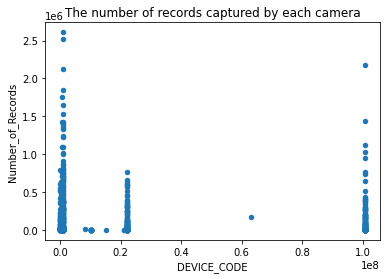

In [ ]:
df_camera_records = df_cleaned.select(col("DEVICE_CODE")).rdd.map(lambda x: (x[0], 1)).reduceByKey(lambda x,y: x+y).toDF(["DEVICE_CODE", "Number_of_Records"])
df_camera_records.toPandas().plot.scatter(x='DEVICE_CODE', y='Number_of_Records', title = "The number of records captured by each camera")

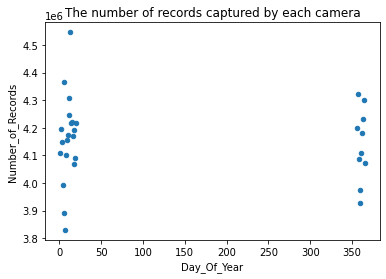

In [ ]:
df_camera_day_records = df_cleaned.select(dayofyear(col("PASS_DAY_TIME"))).rdd.map(lambda x: (x[0], 1)).reduceByKey(lambda x,y: x+y).toDF(["Day_Of_Year", "Number_of_Records"])
df_camera_day_records.toPandas().plot.scatter(x='Day_Of_Year', y='Number_of_Records', title = "The number of records captured by each camera")

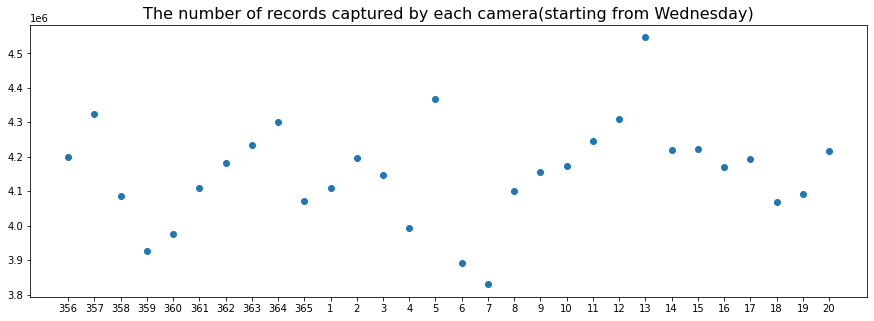

In [ ]:
def plot_df_camera_records():
  df = df_camera_day_records.toPandas().sort_values('Day_Of_Year')
  x = [str(x) for x in np.roll(np.array(df['Day_Of_Year'].values),10)]
  y = np.roll(np.array(df['Number_of_Records']),10)
  plt.figure(figsize=(15, 5))
  plt.scatter(x,y)
  plt.title('The number of records captured by each camera(starting from Wednesday)', fontsize=16)
  plt.show()
  return
plot_df_camera_records()

## Part A
***camera neighbors***

In [118]:
df_car_timesorted_camera = df_cleaned.select(col("PASS_DAY_TIME").alias('time'),
                                             col("FINAL_CAR_KEY").alias('car'),
                                             col("DEVICE_CODE").alias('camera')) \
  .groupby("car") \
    .agg(sort_array(collect_list(struct("time", "camera")), asc=True).alias("list_col"))

df_car_timesorted_camera.show(3)

+-------+--------------------+
|    car|            list_col|
+-------+--------------------+
|7632011|[{2022-01-09 16:3...|
|7632067|[{2021-12-22 16:4...|
|7632206|[{2021-12-22 17:5...|
+-------+--------------------+
only showing top 3 rows



In [ ]:
# pandas_car_timesorted_camera = df_car_timesorted_camera.toPandas()
# pandas_car_timesorted_camera

### Part A01

In [ ]:
def camera_neighbors():
  neighbors_dict = {}
  for list_col in pandas_car_timesorted_camera['list_col']:
    if len(list_col) > 1:
      for tc, i in zip(list_col, range(len(list_col)-1)):
        if tc[1] not in neighbors_dict:
          neighbors_dict[tc[1]] = {list_col[i+1][1]}
          if list_col[i+1][1] not in neighbors_dict:
            neighbors_dict[list_col[i+1][1]] = {tc[1]}
          else:
            neighbors_dict[list_col[i+1][1]].add(tc[1])
        else:
          neighbors_dict[tc[1]].add(list_col[i+1][1])
  
  # sorting neighbors
  neighbors_dict = {k:sorted(v) for k,v in neighbors_dict.items()} 
  # sorting cameras
  neighbors_dict = {i: neighbors_dict[i] for i in sorted(neighbors_dict.keys())}
  return neighbors_dict

camera_neighbors_dict = camera_neighbors()
len(camera_neighbors_dict)

886

In [ ]:
!pip install scipy==1.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 MB 16.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3


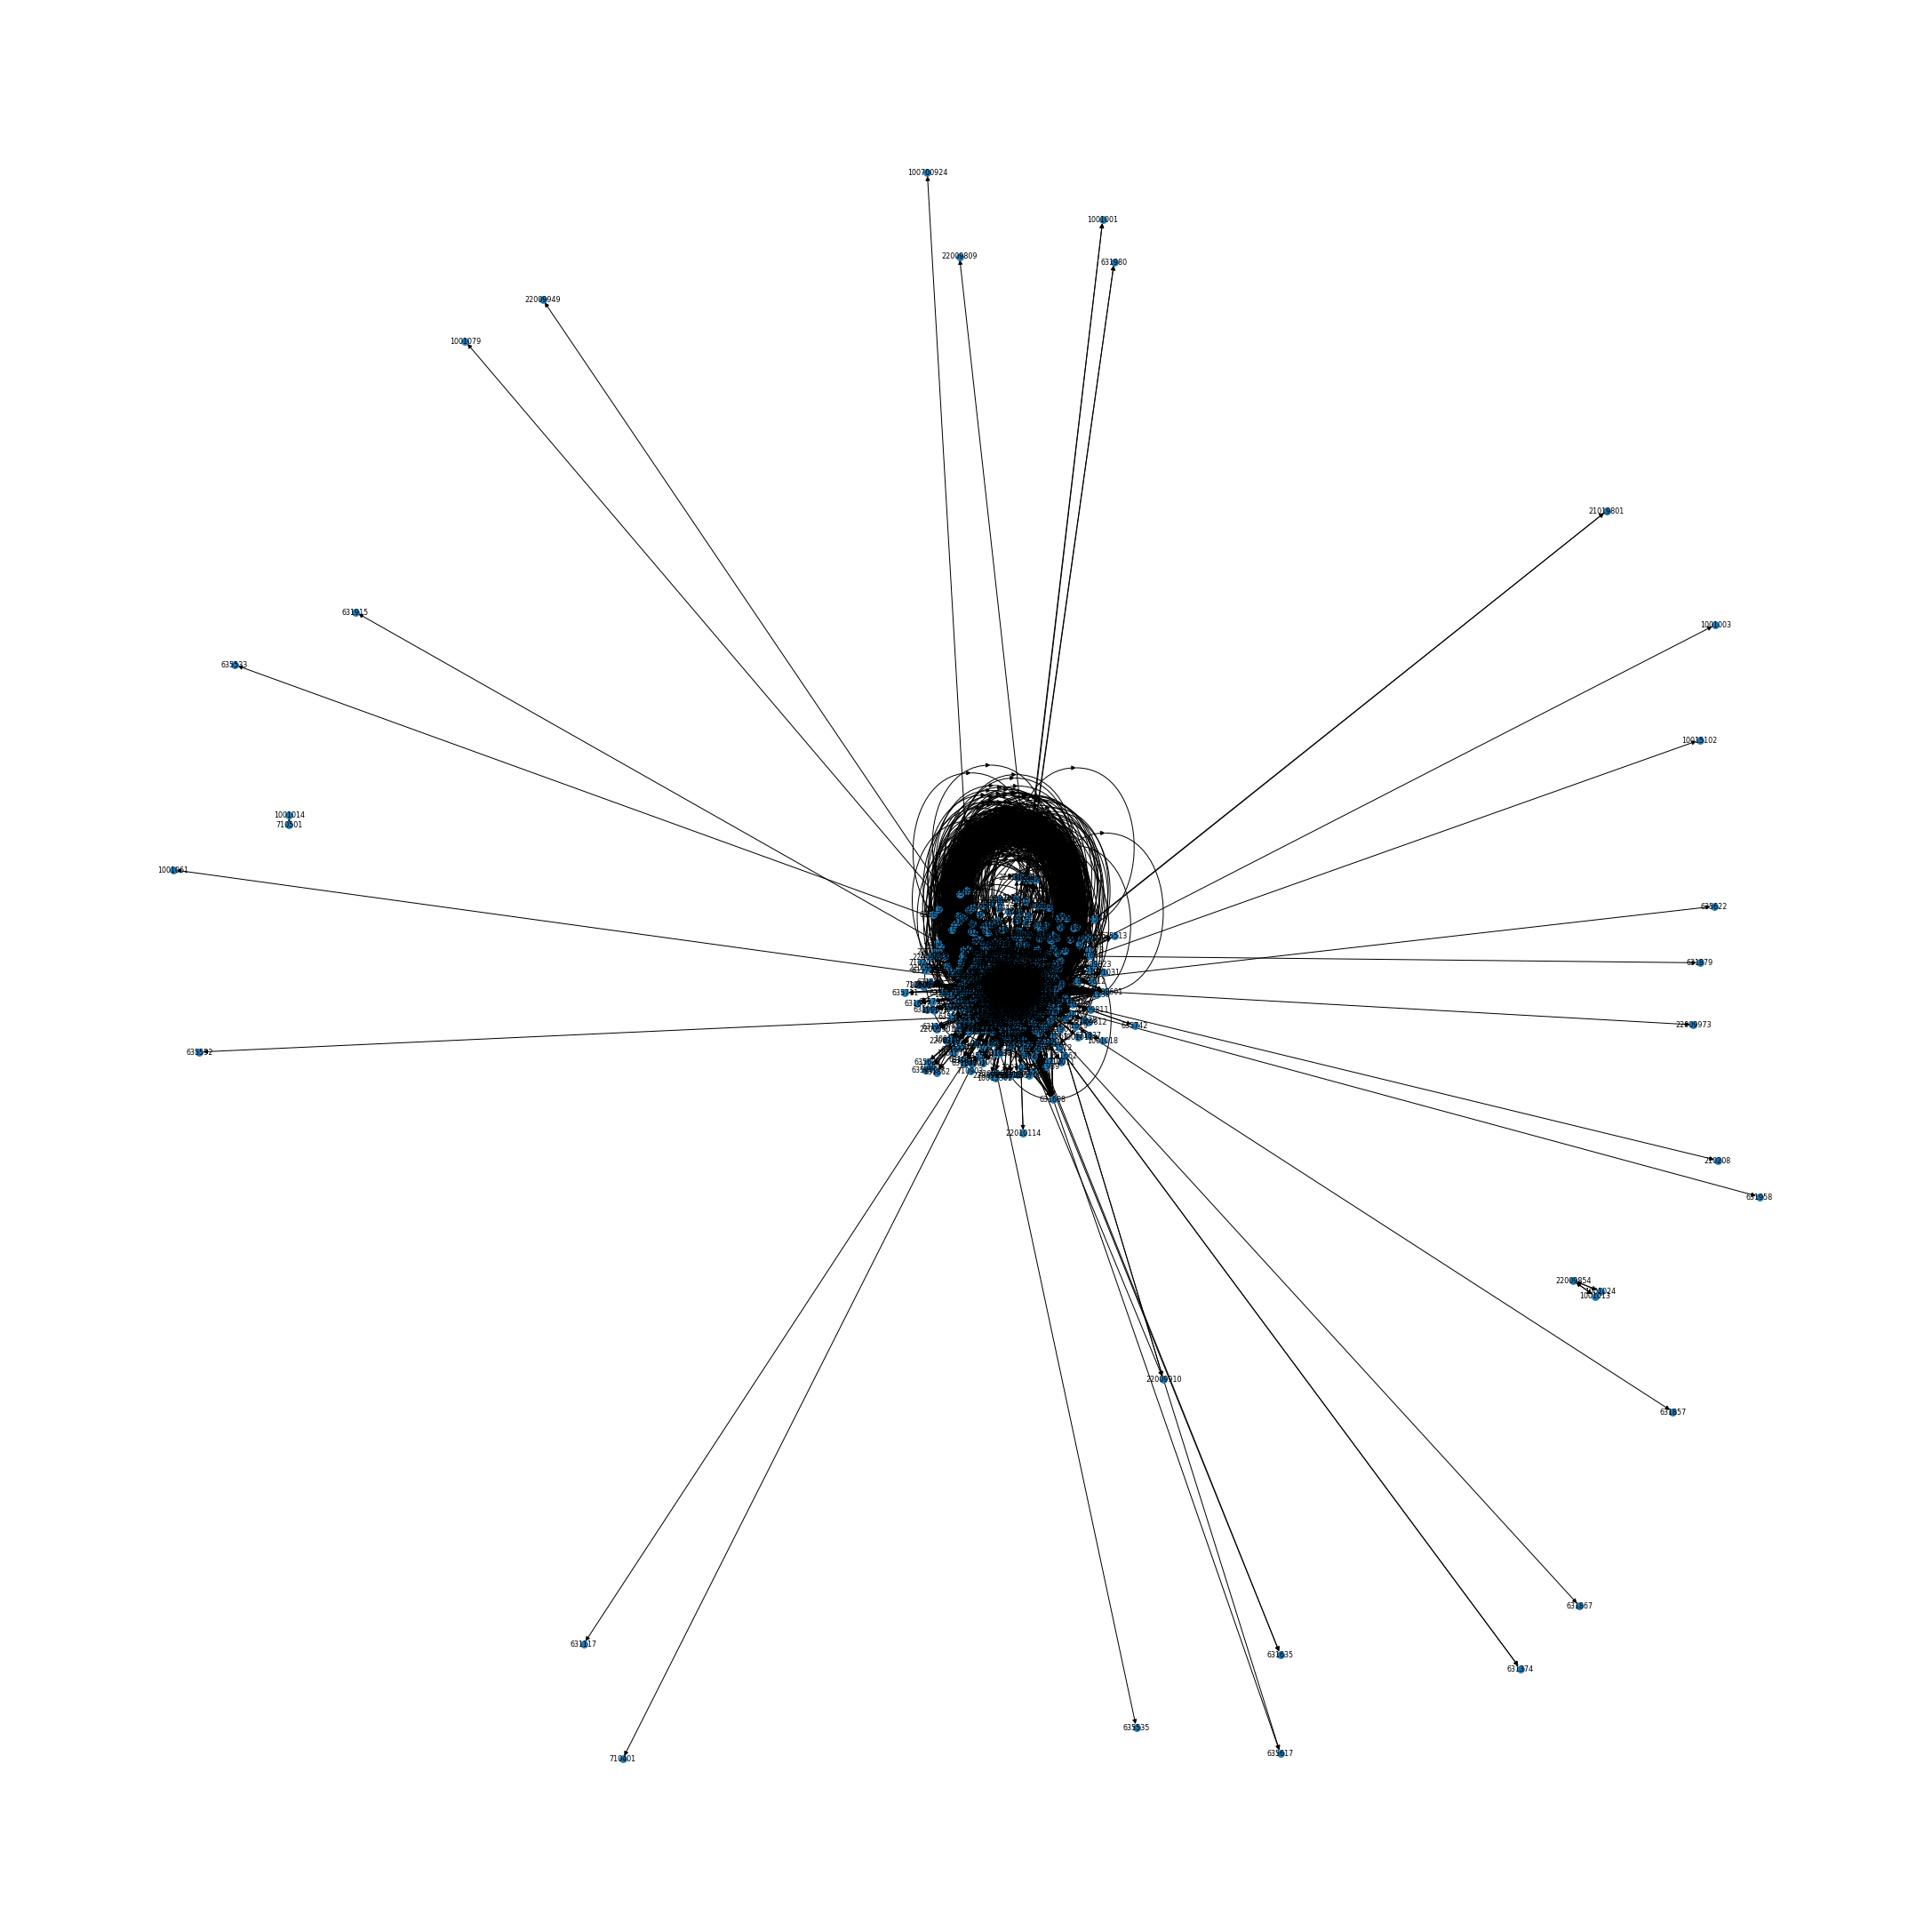

In [ ]:
def plot_graph(input_dict):
  G = nx.DiGraph(input_dict)
  plt.figure(figsize=(30,30))
  nx.draw(G,with_labels=True,node_size=60,font_size=8) 
  plt.show()
plot_graph(camera_neighbors_dict)

NameError: ignored

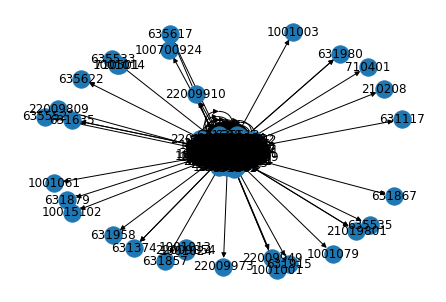

In [ ]:
import networkx as nx

g = nx.DiGraph()
g.add_nodes_from(camera_neighbors_dict.keys())
for k, v in camera_neighbors_dict.items():
    g.add_edges_from(([(k, t) for t in v]))
nx.draw(g,with_labels=True)
# plt.draw()
# plt.show()


In [ ]:
# camera 900244,900212
# day 362
hist_day_362 = df_cleaned.filter(dayofyear(col("PASS_DAY_TIME"))==362).select(hour(col("PASS_DAY_TIME")).alias('time'),
                                                                              col("FINAL_CAR_KEY").alias('car'),
                                                                              col("DEVICE_CODE").alias('camera'))\
  .filter((col('camera')==900244) | (col('camera')==900244))\
    .groupby('time').count().toPandas()

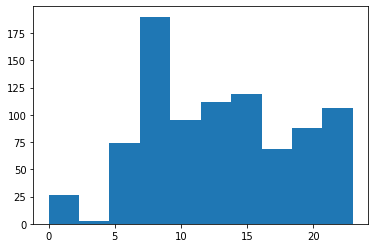

In [ ]:
plt.hist(hist_day_362.time, weights=hist_day_362['count'])
plt.show()

### Part A02

In [ ]:
from datetime import datetime, timedelta

def camera_neighbors_2():
  neighbors_dict = {}
  for list_col in pandas_car_timesorted_camera['list_col']:
    if len(list_col) > 1:
      for tc, i in zip(list_col, range(len(list_col)-1)):
        if list_col[i+1][0] - tc[0] < timedelta(minutes = 30):
          if tc[1] not in neighbors_dict:
            neighbors_dict[tc[1]] = {list_col[i+1][1]}
            if list_col[i+1][1] not in neighbors_dict:
              neighbors_dict[list_col[i+1][1]] = {tc[1]}
            else:
              neighbors_dict[list_col[i+1][1]].add(tc[1])
          else:
            neighbors_dict[tc[1]].add(list_col[i+1][1])
  # neighbors sort
  neighbors_dict = {k:sorted(v) for k,v in neighbors_dict.items()} 
  # camera sort
  neighbors_dict = {i: neighbors_dict[i] for i in sorted(neighbors_dict.keys())}
  return neighbors_dict

camera_neighbors_dict = camera_neighbors_2()
len(camera_neighbors_dict)

754

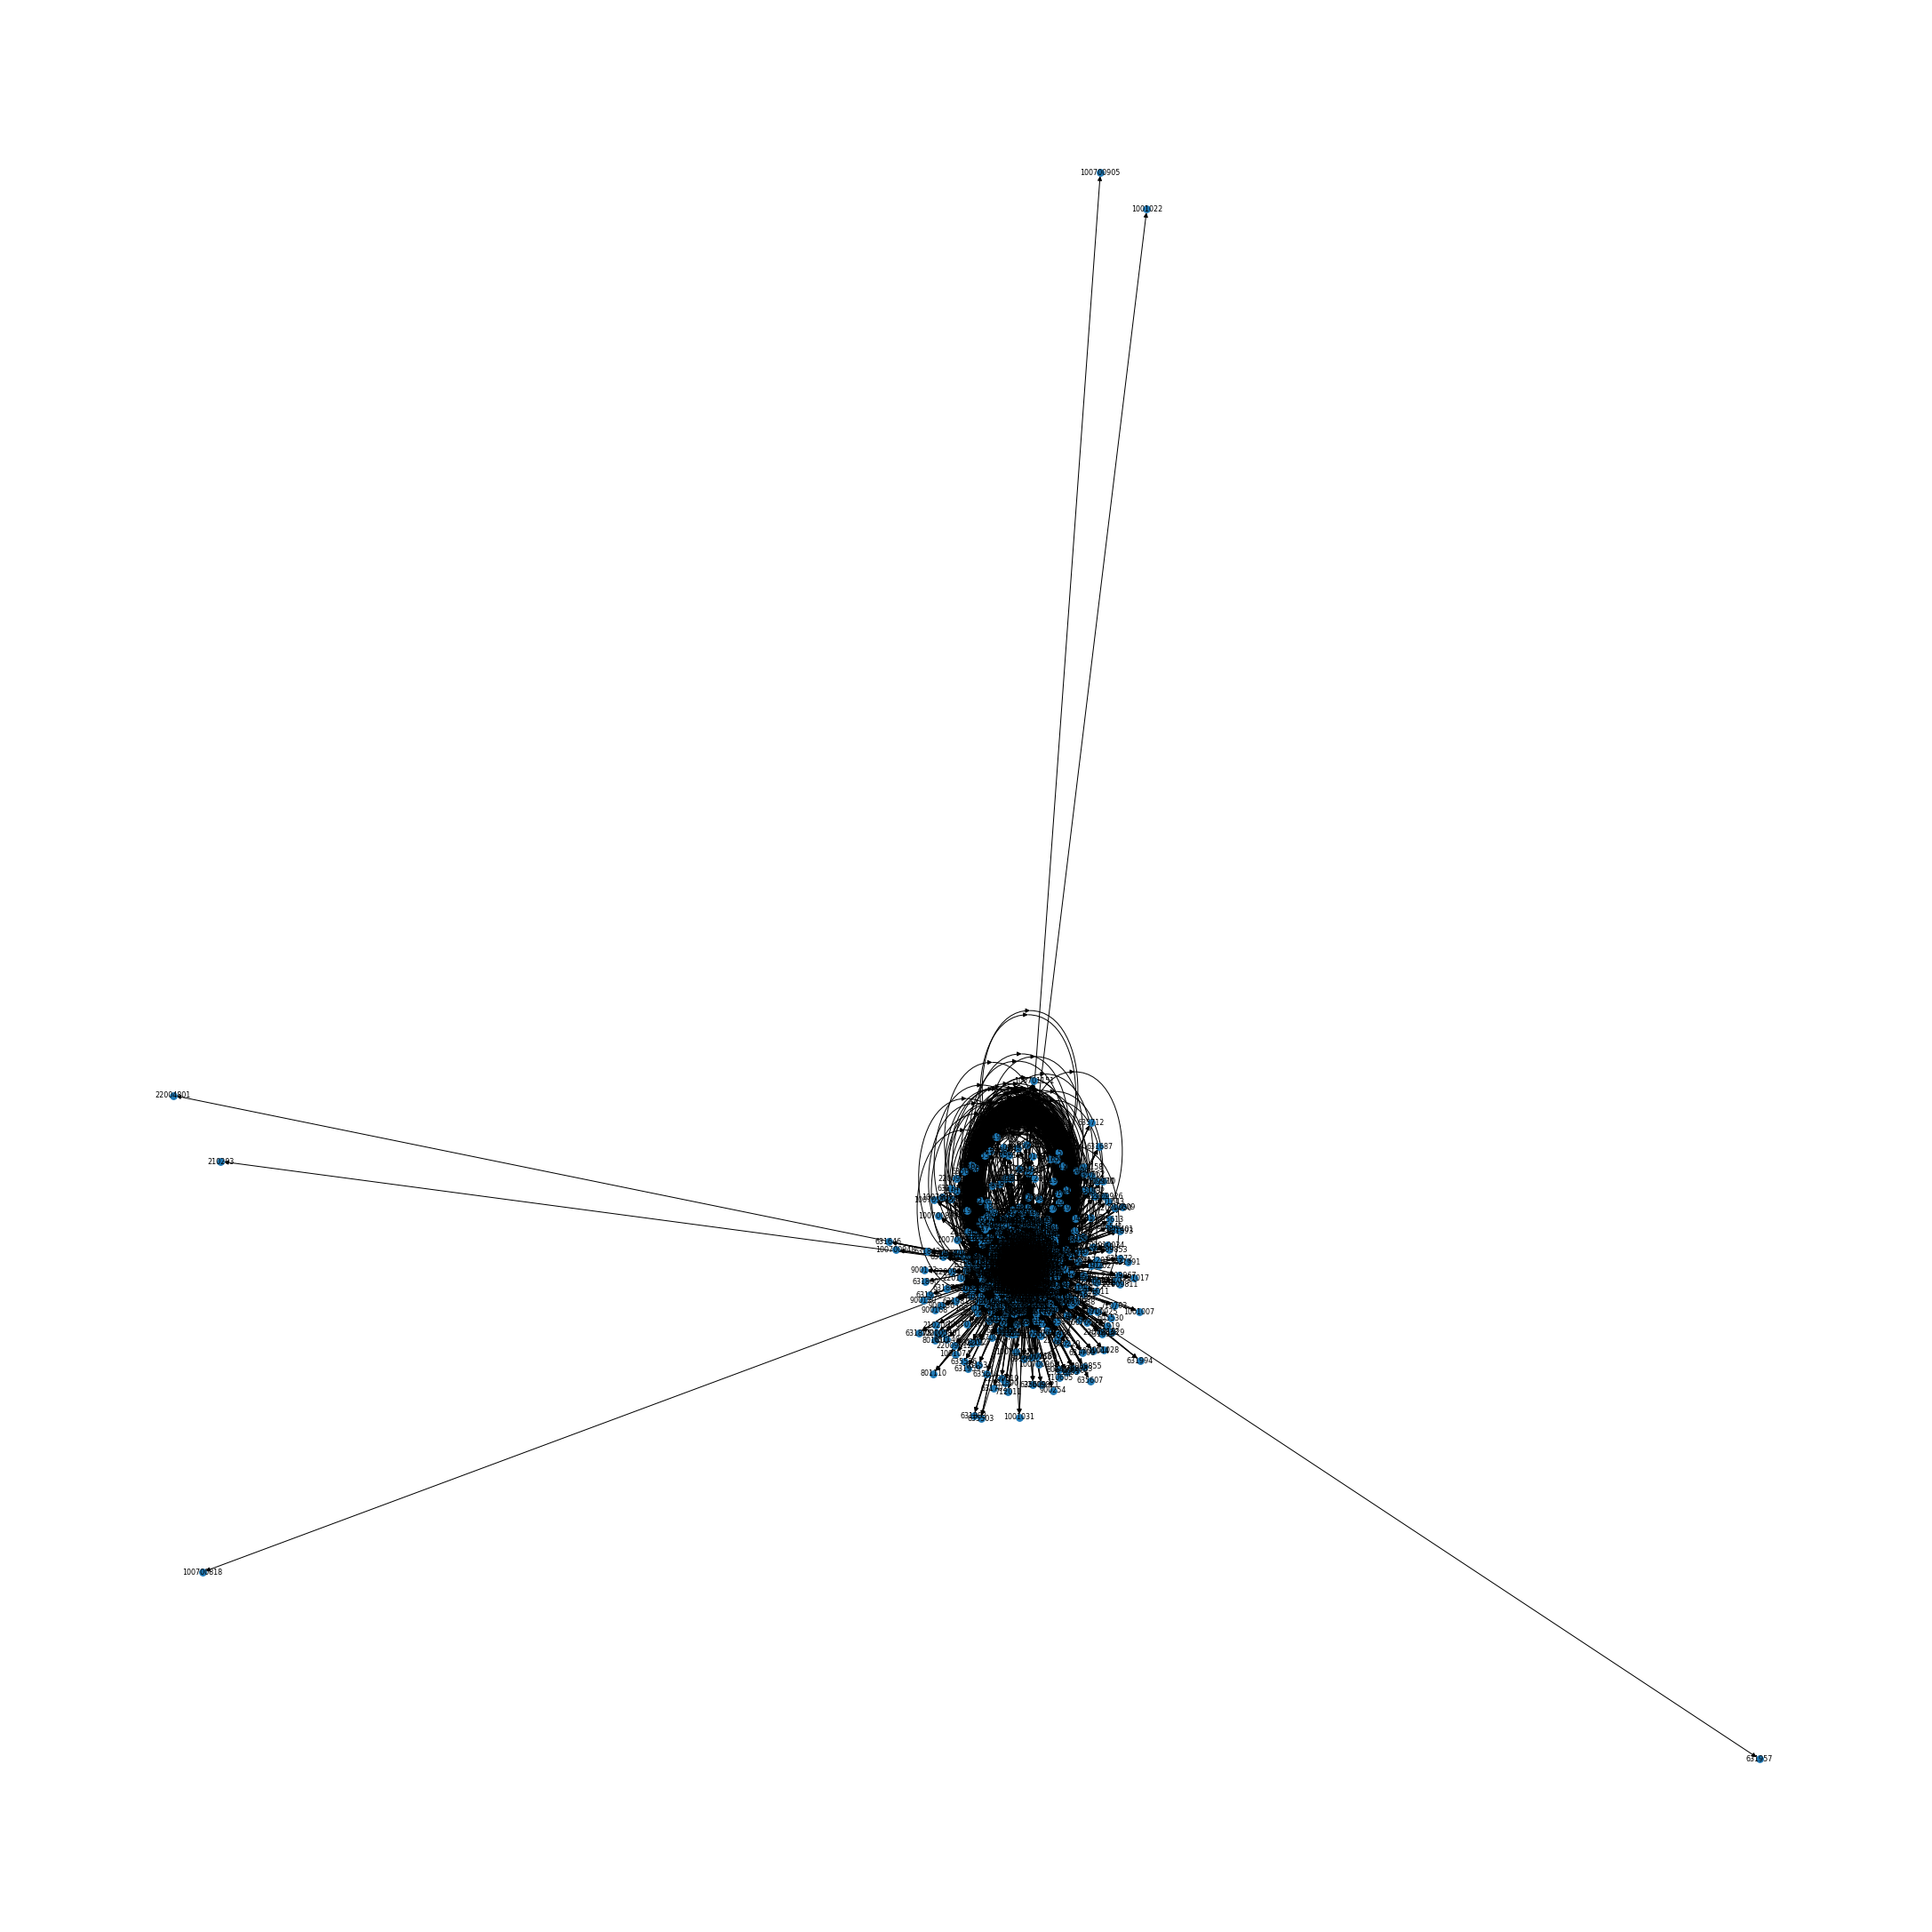

In [ ]:
plot_graph(camera_neighbors_dict)

In [ ]:
# 900244,900212
# day 362
hist_day_362 = df_cleaned.filter(dayofyear(col("PASS_DAY_TIME"))==362).select(hour(col("PASS_DAY_TIME")).alias('time'), col("FINAL_CAR_KEY").alias('car'), col("DEVICE_CODE").alias('camera'))\
  .filter((col('camera')==900244) | (col('camera')==900244))\
    .groupby('time').count().toPandas()

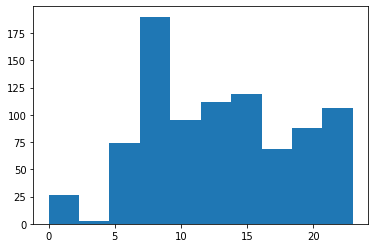

In [ ]:
plt.hist(hist_day_362.time, weights=hist_day_362['count'])
plt.show()

### Part A03

In [128]:
# camera: 900244,900212
# day 362
hist_day_362 = df_cleaned.filter(dayofyear(col("PASS_DAY_TIME"))==362).select(col("PASS_DAY_TIME").alias('time'), col("FINAL_CAR_KEY").alias('car'), col("DEVICE_CODE").alias('camera'))\
  .filter((col('camera')==900244) | (col('camera')==900212))\
    .withColumn("time_quarter", hour(col('time'))*4 + round(minute(col('time'))/15)) \
      .groupby('time_quarter').count().toPandas()

In [129]:
# camera: 900244,900212
# day 7
hist_day_7_1 = df_cleaned.filter(dayofyear(col("PASS_DAY_TIME"))==7).select(col("PASS_DAY_TIME").alias('time'), col("FINAL_CAR_KEY").alias('car'), col("DEVICE_CODE").alias('camera'))\
  .filter((col('camera')==900244) | (col('camera')==900212))\
    .withColumn("time_quarter", hour(col('time'))*4 + round(minute(col('time'))/15)) \
      .groupby('time_quarter').count().toPandas()

In [125]:
# camera: 114,100
# day 7
hist_day_7_2 = df_cleaned.filter(dayofyear(col("PASS_DAY_TIME"))==7).select(col("PASS_DAY_TIME").alias('time'), col("FINAL_CAR_KEY").alias('car'), col("DEVICE_CODE").alias('camera'))\
  .filter((col('camera')==114) | (col('camera')==100))\
    .withColumn("time_quarter", hour(col('time'))*4 + round(minute(col('time'))/15)) \
      .groupby('time_quarter').count().toPandas()

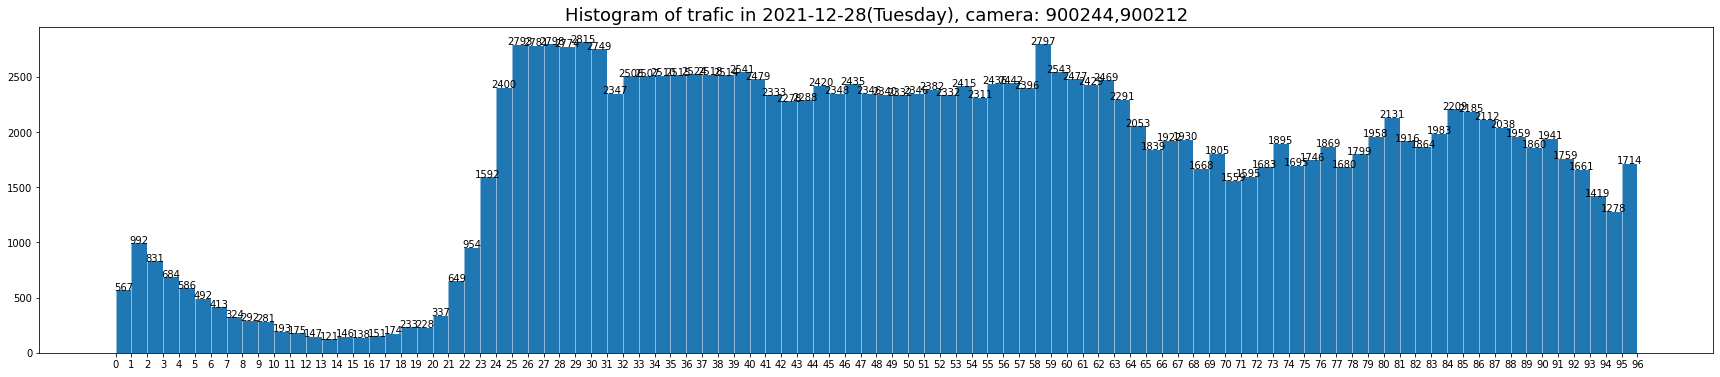

['0=0:0', '1=0:15', '2=0:30', '3=0:45', '4=1:0', '5=1:15', '6=1:30', '7=1:45', '8=2:0', '9=2:15', '10=2:30', '11=2:45', '12=3:0', '13=3:15', '14=3:30', '15=3:45', '16=4:0', '17=4:15', '18=4:30', '19=4:45', '20=5:0', '21=5:15', '22=5:30', '23=5:45', '24=6:0', '25=6:15', '26=6:30', '27=6:45', '28=7:0', '29=7:15', '30=7:30', '31=7:45', '32=8:0', '33=8:15', '34=8:30', '35=8:45', '36=9:0', '37=9:15', '38=9:30', '39=9:45', '40=10:0', '41=10:15', '42=10:30', '43=10:45', '44=11:0', '45=11:15', '46=11:30', '47=11:45', '48=12:0', '49=12:15', '50=12:30', '51=12:45', '52=13:0', '53=13:15', '54=13:30', '55=13:45', '56=14:0', '57=14:15', '58=14:30', '59=14:45', '60=15:0', '61=15:15', '62=15:30', '63=15:45', '64=16:0', '65=16:15', '66=16:30', '67=16:45', '68=17:0', '69=17:15', '70=17:30', '71=17:45', '72=18:0', '73=18:15', '74=18:30', '75=18:45', '76=19:0', '77=19:15', '78=19:30', '79=19:45', '80=20:0', '81=20:15', '82=20:30', '83=20:45', '84=21:0', '85=21:15', '86=21:30', '87=21:45', '88=22:0', '89=

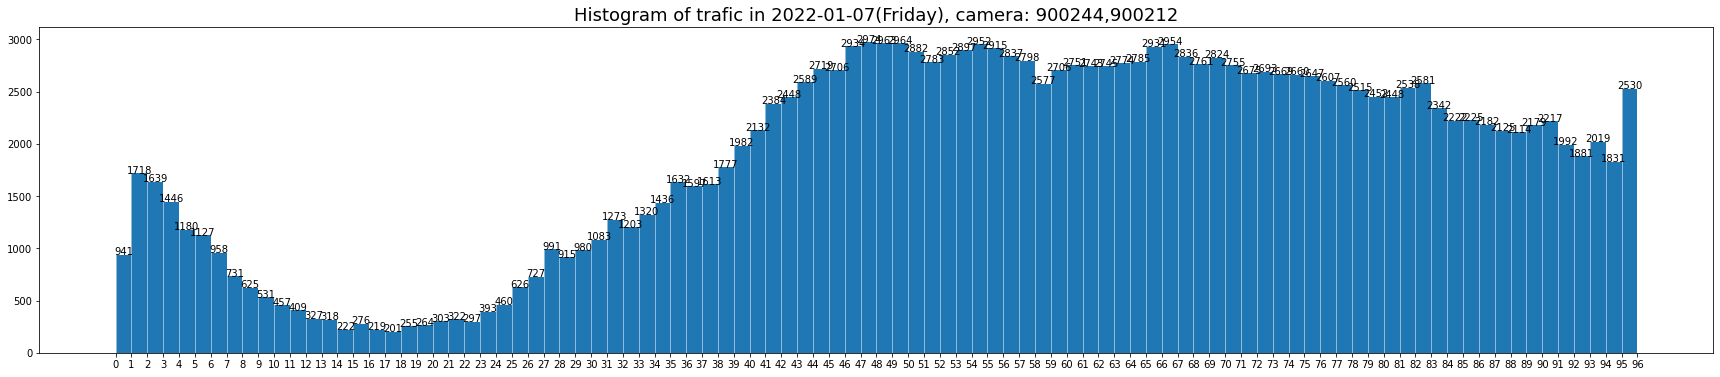

['0=0:0', '1=0:15', '2=0:30', '3=0:45', '4=1:0', '5=1:15', '6=1:30', '7=1:45', '8=2:0', '9=2:15', '10=2:30', '11=2:45', '12=3:0', '13=3:15', '14=3:30', '15=3:45', '16=4:0', '17=4:15', '18=4:30', '19=4:45', '20=5:0', '21=5:15', '22=5:30', '23=5:45', '24=6:0', '25=6:15', '26=6:30', '27=6:45', '28=7:0', '29=7:15', '30=7:30', '31=7:45', '32=8:0', '33=8:15', '34=8:30', '35=8:45', '36=9:0', '37=9:15', '38=9:30', '39=9:45', '40=10:0', '41=10:15', '42=10:30', '43=10:45', '44=11:0', '45=11:15', '46=11:30', '47=11:45', '48=12:0', '49=12:15', '50=12:30', '51=12:45', '52=13:0', '53=13:15', '54=13:30', '55=13:45', '56=14:0', '57=14:15', '58=14:30', '59=14:45', '60=15:0', '61=15:15', '62=15:30', '63=15:45', '64=16:0', '65=16:15', '66=16:30', '67=16:45', '68=17:0', '69=17:15', '70=17:30', '71=17:45', '72=18:0', '73=18:15', '74=18:30', '75=18:45', '76=19:0', '77=19:15', '78=19:30', '79=19:45', '80=20:0', '81=20:15', '82=20:30', '83=20:45', '84=21:0', '85=21:15', '86=21:30', '87=21:45', '88=22:0', '89=

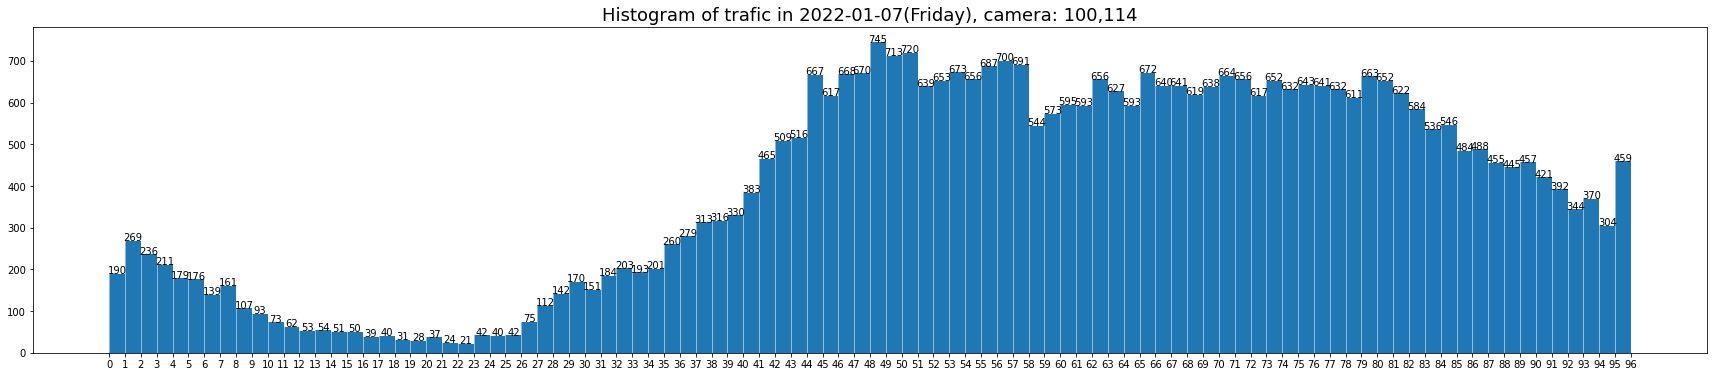

['0=0:0', '1=0:15', '2=0:30', '3=0:45', '4=1:0', '5=1:15', '6=1:30', '7=1:45', '8=2:0', '9=2:15', '10=2:30', '11=2:45', '12=3:0', '13=3:15', '14=3:30', '15=3:45', '16=4:0', '17=4:15', '18=4:30', '19=4:45', '20=5:0', '21=5:15', '22=5:30', '23=5:45', '24=6:0', '25=6:15', '26=6:30', '27=6:45', '28=7:0', '29=7:15', '30=7:30', '31=7:45', '32=8:0', '33=8:15', '34=8:30', '35=8:45', '36=9:0', '37=9:15', '38=9:30', '39=9:45', '40=10:0', '41=10:15', '42=10:30', '43=10:45', '44=11:0', '45=11:15', '46=11:30', '47=11:45', '48=12:0', '49=12:15', '50=12:30', '51=12:45', '52=13:0', '53=13:15', '54=13:30', '55=13:45', '56=14:0', '57=14:15', '58=14:30', '59=14:45', '60=15:0', '61=15:15', '62=15:30', '63=15:45', '64=16:0', '65=16:15', '66=16:30', '67=16:45', '68=17:0', '69=17:15', '70=17:30', '71=17:45', '72=18:0', '73=18:15', '74=18:30', '75=18:45', '76=19:0', '77=19:15', '78=19:30', '79=19:45', '80=20:0', '81=20:15', '82=20:30', '83=20:45', '84=21:0', '85=21:15', '86=21:30', '87=21:45', '88=22:0', '89=

In [130]:
from matplotlib.ticker import AutoMinorLocator

def plot_hist(imput_pandas,date):
  plt.figure(figsize=(30,6))
  n, bins, patches = plt.hist(imput_pandas.time_quarter, weights=imput_pandas['count'], bins=96)
  xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
  plt.xticks(bins)
  for idx, value in enumerate(n):
      if value > 0:
          plt.text(xticks[idx], value+0.5, int(value), ha='center')
  plt.grid(color='white', lw = 0.5, axis='x')
  plt.title(f'Histogram of trafic in {date}', fontsize = 18)
  plt.show()
  return bins
print(["{}={}:{}".format(int(b), int(b/4), int(b%4*15)) for b in plot_hist(hist_day_362, '2021-12-28(Tuesday), camera: 900244,900212')])
print(["{}={}:{}".format(int(b), int(b/4), int(b%4*15)) for b in plot_hist(hist_day_7_1, '2022-01-07(Friday), camera: 900244,900212')])
print(["{}={}:{}".format(int(b), int(b/4), int(b%4*15)) for b in plot_hist(hist_day_7_2, '2022-01-07(Friday), camera: 100,114')])


## Part B
***Item Basket***

## Part C
***Recommender***

In [92]:
from pyspark.mllib.recommendation import Rating
from pyspark.mllib.recommendation import ALS
from pyspark.mllib.evaluation import RegressionMetrics
from pyspark.ml.feature import MinMaxScaler

### Part C01

In [93]:
from pyspark.sql.types import StringType
from pyspark.sql.functions import udf

def translate(mapping):
    def translate_(col):
        return mapping.get(col)
    return udf(translate_, StringType())

week_day_dict = {'Fri': 5, 'Mon': 1, 'Sat': 6, 'Sun': 0, 'Thu': 4, 'Tue': 2, 'Wed': 3}
w = Window.partitionBy('DEVICE_CODE', 'dayofmonth', 'week_day', 'hour')

df_camera_weekday_hour_count = df_cleaned.withColumn('dayofmonth', dayofmonth(col("PASS_DAY_TIME"))) \
  .withColumn('hour', hour("PASS_DAY_TIME")).withColumn('week_day', date_format(col("PASS_DAY_TIME"), "E")) \
    .withColumn('week_day_id', translate(week_day_dict)("week_day")) \
      .select(col("DEVICE_CODE").alias('camera'), col('week_day_id'), col('hour'),  count('FINAL_CAR_KEY').over(w).alias('count')) \
        .groupby('camera', 'week_day_id', 'hour').mean().sort(['camera', 'week_day_id', 'hour']) \
          .select('camera', 'week_day_id', 'hour', round(col('avg(count)'),3).alias('avg_count'))
df_camera_weekday_hour_count.show()
    

+------+-----------+----+---------+
|camera|week_day_id|hour|avg_count|
+------+-----------+----+---------+
|   100|          0|   0|  189.987|
|   100|          0|   1|   94.342|
|   100|          0|   2|   46.602|
|   100|          0|   3|    32.14|
|   100|          0|   4|   31.205|
|   100|          0|   5|  132.604|
|   100|          0|   6|  640.373|
|   100|          0|   7|  707.949|
|   100|          0|   8|  478.405|
|   100|          0|   9|   616.13|
|   100|          0|  10|   649.56|
|   100|          0|  11|  562.699|
|   100|          0|  12|  504.537|
|   100|          0|  13|   511.22|
|   100|          0|  14|  550.207|
|   100|          0|  15|  599.616|
|   100|          0|  16|  590.153|
|   100|          0|  17|  832.498|
|   100|          0|  18|  911.868|
|   100|          0|  19|   889.29|
+------+-----------+----+---------+
only showing top 20 rows



In [94]:
df_camera_7_24 = df_camera_weekday_hour_count.groupby("camera") \
    .agg(collect_list(struct('week_day_id','hour','avg_count')).alias("list_col"))
df_camera_7_24.show(3, truncate=False)

+------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [95]:
def matrix_7_24(input_tuple):
  mat_ = np.ones((7,24))*np.nan
  for t in input_tuple:
    t = list(t)
    mat_[int(t[0])][t[1]] = t[2]
  
  # mean of non-nan values
  mat_ = np.round(mat_-mat_[~np.isnan(mat_)].mean(),3)
  mat_[np.isnan(mat_)] = 0
  return mat_

df_camera_7_24_rdd = df_camera_7_24.rdd.map(lambda x: (x[0], matrix_7_24(x[1])))
df_camera_7_24_rdd.take(2)

[(101, array([[-20.835, -22.275, -26.275, -25.875, -25.775, -22.942,  -7.989,
           -2.879,  -5.428,   3.508,   2.309,   4.237,   5.373,  -4.586,
            1.813,   3.543,   2.171,  28.558,  32.673,  47.116,  21.478,
            5.987,  -1.412, -12.02 ],
         [-19.775, -22.639, -24.675, -26.275, -25.875, -22.418,  -7.801,
           -3.888,  -1.02 ,   6.836,   5.497,   0.404,   3.507,  -2.315,
           -0.852,  -0.663,   2.329,  22.074,  21.736,  33.072,  40.937,
            2.838, -10.798, -13.544],
         [-20.275, -24.525, -25.775, -24.942, -24.942, -22.275,  -6.13 ,
           -0.369,  -6.012,   5.074,  -1.305,   0.392,   4.122,  -6.414,
           -5.118,   3.637,   1.463,  28.478,  23.317,  38.12 ,  26.244,
            5.802,   1.373, -11.767],
         [-17.717, -22.093, -24.457, -25.275, -25.608, -22.449,  -4.721,
           -1.094,  -3.721,   1.243,   4.698,   4.3  ,   1.172,   0.647,
           -3.643,   7.701,  13.35 ,  30.938,  33.69 ,  33.092,  38.389,
     

In [96]:
df_camera_7_24_rdd.cache()

PythonRDD[33805] at RDD at PythonRDD.scala:53

In [97]:
def func_1(input):
  return [(input[0],idx, val) for idx, val in enumerate(input[1].flatten())]
  
df_camera_item_7_24_rdd = df_camera_7_24_rdd.flatMap(lambda x: func_1(x))
df_camera_item_7_24_rdd.take(3)

[(101, 0, -20.835), (101, 1, -22.275), (101, 2, -26.275)]

In [98]:
ratings = df_camera_item_7_24_rdd.map(lambda x: Rating(x[0], x[1], float(x[2])))
ratings.take(3)

[Rating(user=101, product=0, rating=-20.835),
 Rating(user=101, product=1, rating=-22.275),
 Rating(user=101, product=2, rating=-26.275)]

In [99]:
def ALS_Algorithm(input_rdd):
  train, test = input_rdd.randomSplit([0.8, 0.2])
  trained_model = ALS.train(train, rank = 15, iterations= 20, lambda_=0.01)
  # extract just user and product
  train_features = train.map(lambda x: (x.user, x.product))
  # predict by train data
  train_predict_rating = trained_model.predictAll(train_features).map(lambda x: ((x[0], x[1]), x[2]))
  # real train rating
  train_real_rating = train.map(lambda x: ((x.user, x.product), x.rating))
  # join predict and real rating
  predict_join_real = train_predict_rating.join(train_real_rating).map(lambda x: x[1])
  # compute regression metrics on train
  train_metrics = RegressionMetrics(predict_join_real)
  # train evaluation
  train_mse = train_metrics.meanSquaredError
  print("train mse:", train_mse)

  # extract just user and product
  test_features = test.map(lambda x: (x.user, x.product))
  # predict by test data
  test_predict_rating = trained_model.predictAll(test_features).map(lambda x: ((x[0], x[1]), x[2]))
  # real test rating
  test_real_rating = test.map(lambda x: ((x.user, x.product), x.rating))
  # join predict and real rating
  predict_join_real = test_predict_rating.join(test_real_rating).map(lambda x: x[1])
  # compute regression metrics on test
  test_metrics = RegressionMetrics(predict_join_real)
  # test evaluation
  test_mae = test_metrics.meanSquaredError
  print("test mse:",test_mae)

ALS_Algorithm(ratings)

/usr/local/lib/python3.8/dist-packages/pyspark/sql/context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


train mse: 1048.4873130766289
test mse: 4301.897262415017


### Part C02

In [100]:
from datetime import timedelta
df_camera_weekday_sixhour_count = df_cleaned.withColumn('dayofmonth', dayofmonth(col("PASS_DAY_TIME"))) \
  .withColumn('hour', (hour("PASS_DAY_TIME")/6).cast('int')).withColumn('week_day', date_format(col("PASS_DAY_TIME"), "E")) \
    .withColumn('week_day_id', translate(week_day_dict)("week_day")) \
      .select(col("DEVICE_CODE").alias('camera'), col('week_day_id'), col('hour'),  count('FINAL_CAR_KEY').over(w).alias('count')) \
        .groupby('camera', 'week_day_id', 'hour').mean().sort(['camera', 'week_day_id', 'hour']) \
          .select('camera', 'week_day_id', 'hour', round(col('avg(count)'),3).alias('avg_count'))
df_camera_weekday_sixhour_count.toPandas()

,camera,week_day_id,hour,avg_count
0,100,0,0,521.336
1,100,0,1,3640.160
2,100,0,2,3577.514
3,100,0,3,4149.287
4,100,1,0,535.303
...,...,...,...,...
25392,100701303,4,2,4901.149
25393,100701303,4,3,2560.824
25394,100701303,6,1,3571.065
25395,100701303,6,2,5339.001


In [101]:
df_camera_7_6 = df_camera_weekday_sixhour_count.groupby("camera") \
    .agg(collect_list(struct('week_day_id','hour','avg_count')).alias("list_col"))

def matrix_7_6(input_tuple):
  mat_ = np.ones((7,6))*np.nan
  for t in input_tuple:
    t = list(t)
    mat_[int(t[0])][t[1]] = t[2]
  mat_ = mat_ - mat_[~np.isnan(mat_)].mean()
  mat_[np.isnan(mat_)] = 0
  # mat_ = np.round(mat_ / np.linalg.norm(mat_), 3)
  return np.round(mat_, 3)
df_camera_7_6_rdd = df_camera_7_6.rdd.map(lambda x: (x[0], matrix_7_6(x[1])))
df_camera_7_6_rdd.take(2)

[(100,
  array([[-2541.332,   577.492,   514.846,  1086.619,     0.   ,     0.   ],
         [-2527.365,   601.173,   417.668,  1180.95 ,     0.   ,     0.   ],
         [-2503.721,   534.397,   512.304,  1126.888,     0.   ,     0.   ],
         [-2321.314,   546.332,   524.742,  1414.807,     0.   ,     0.   ],
         [-2464.176,  -345.036,  2111.192,  1142.68 ,     0.   ,     0.   ],
         [-2250.196,  -346.605,  2436.141,  1161.865,     0.   ,     0.   ],
         [-2375.54 ,   556.863,   470.947,   757.383,     0.   ,     0.   ]])),
 (101, array([[-140.161,   -2.031,   40.616,   90.705,    0.   ,    0.   ],
         [-140.14 ,    2.4  ,   25.658,   75.831,    0.   ,    0.   ],
         [-139.314,   -5.27 ,   22.259,   83.305,    0.   ,    0.   ],
         [-132.766,    2.263,   49.88 ,   95.714,    0.   ,    0.   ],
         [-138.639,  -37.056,  269.706,   24.499,    0.   ,    0.   ],
         [-126.164,  -34.163,  133.296,   31.688,    0.   ,    0.   ],
         [-133.419, 

In [102]:
df_camera_item_7_6_rdd = df_camera_7_6_rdd.flatMap(lambda x: func_1(x))

ratings = df_camera_item_7_6_rdd.map(lambda x: Rating(x[0], x[1], float(x[2])))
ALS_Algorithm(ratings)

/usr/local/lib/python3.8/dist-packages/pyspark/sql/context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


train mse: 1108.0055797909001
test mse: 2150344.934726578


### Part C03

In [ ]:
car_camera_rating = df_cleaned.select(col("FINAL_CAR_KEY").alias('car'), col("DEVICE_CODE").alias('camera')).rdd.map(lambda x: ((x[0], x[1]), 1))\
    .reduceByKey(lambda x,y : x+y) \
        .map(lambda x: (x[0][0], x[0][1], x[1]))
car_camera_rating.take(3)

In [ ]:
car_camera_rating_df = car_camera_rating.toDF(["car", "camera", "rating"])
normalize_rating_rdd = car_camera_rating_df.rdd.map(lambda x: (x[1], (x[0], x[2]))).groupByKey()
normalize_rating_rdd.cache()

In [ ]:
from operator import itemgetter
import builtins as py_builtin

def normalize_func(x):
  max_rating = py_builtin.max(x[1],key=itemgetter(1))[1]
  output = []
  for items in x[1]:
    output.append((items[0], x[0], items[1]/max_rating))
  return output

normalized_rdd = normalize_rating_rdd.flatMap(lambda x: normalize_func(x))
normalized_rdd.cache()
normalized_rdd.take(3)

In [ ]:
ratings = normalized_rdd.map(lambda x: Rating(x[0], x[1], x[2]))
ratings.take(3)

In [ ]:
ALS_Algorithm(ratings)

## Part D
***Pixie***

### Part D01

In [13]:
support_threshold = int(top_frequent_car * 0.004)
frequent_cars_list = df_car_counts.filter(col('count') > support_threshold) \
  .select(col('FINAL_CAR_KEY')).rdd.flatMap(lambda x: x).collect()
  
df_camera_car_count = df_cleaned.filter(df_cleaned['FINAL_CAR_KEY'].isin(frequent_cars_list)) \
  .groupBy('DEVICE_CODE', 'FINAL_CAR_KEY').count() \
    .sort('count', ascending=False)
  
df_camera_car_count.show()

+-----------+-------------+-----+
|DEVICE_CODE|FINAL_CAR_KEY|count|
+-----------+-------------+-----+
|   22010043|     69177480|51678|
|   22010061|     69177480|47835|
|   22009830|      8073331|41143|
|   22010039|     69177480|30859|
|   22010040|     69177480|27938|
|   22010053|     69177480|27734|
|   22010047|     69177480|22935|
|   22010044|     69177480|17203|
|   22010048|     69177480|13382|
|   22010054|     69177480|12918|
|   22010053|      8073331|11318|
|  100701119|     69177480|10735|
|   22010054|      8073331|10135|
|     631634|      8073331| 7721|
|     631633|      8073331| 7632|
|   22010079|     69177480| 7516|
|   22010058|      8073331| 6774|
|   22010056|     69177480| 6563|
|   22010048|      8073331| 5624|
|   22010072|      8073331| 4943|
+-----------+-------------+-----+
only showing top 20 rows



In [14]:
from pyspark.ml.feature import StringIndexer

df_camera_car_count_indexed = StringIndexer(inputCol='FINAL_CAR_KEY', outputCol='CAR_INDEX').fit(df_camera_car_count).transform(df_camera_car_count)
df_camera_car_count_indexed = StringIndexer(inputCol='DEVICE_CODE', outputCol='CAMERA_INDEX').fit(df_camera_car_count_indexed).transform(df_camera_car_count_indexed)
df_camera_car_count_indexed.show(3)

+-----------+-------------+-----+---------+------------+
|DEVICE_CODE|FINAL_CAR_KEY|count|CAR_INDEX|CAMERA_INDEX|
+-----------+-------------+-----+---------+------------+
|   22010043|     69177480|51678|      5.0|       400.0|
|   22010061|     69177480|47835|      5.0|       319.0|
|   22009830|      8073331|41143|      0.0|       493.0|
+-----------+-------------+-----+---------+------------+
only showing top 3 rows



In [15]:
df_car_nodes = df_camera_car_count_indexed.select(col('CAR_INDEX'), col('CAMERA_INDEX'), col('count')) \
  .groupBy('CAR_INDEX').agg(collect_list('CAMERA_INDEX'))

df_camera_nodes = df_camera_car_count_indexed.select(col('CAR_INDEX'), col('CAMERA_INDEX'), col('count')) \
  .groupBy('CAMERA_INDEX').agg(collect_list('CAR_INDEX'))

df_car_nodes.show(3)
df_camera_nodes.show(3)

+---------+--------------------------+
|CAR_INDEX|collect_list(CAMERA_INDEX)|
+---------+--------------------------+
|      8.0|      [65.0, 131.0, 128...|
|      0.0|      [493.0, 120.0, 17...|
|      7.0|      [43.0, 2.0, 24.0,...|
+---------+--------------------------+
only showing top 3 rows

+------------+-----------------------+
|CAMERA_INDEX|collect_list(CAR_INDEX)|
+------------+-----------------------+
|         0.0|   [1.0, 6.0, 14.0, ...|
|         1.0|   [13.0, 12.0, 20.0...|
|         2.0|   [24.0, 20.0, 22.0...|
+------------+-----------------------+
only showing top 3 rows



In [16]:
car_nodes_rdd = df_car_nodes.rdd.map(lambda x: (x[0], sorted(x[1])))
camera_nodes_rdd = df_camera_nodes.rdd.map(lambda x: (x[0], sorted(x[1])))

In [30]:
from matplotlib import pyplot as plt

def plot_node_scores(input_list, title=None):
  fig = plt.figure(figsize = (40, 10))
  labels = [i for i, e in enumerate(input_list)]
  plt.bar(labels, input_list, width = 1.2)
  x_ticks_list = [i for i, e in enumerate(input_list) if e != 0]
  plt.xticks([i for i, _ in enumerate(input_list) if i%10 == 0], fontsize=20, rotation='vertical')
  plt.yticks(fontsize=30)
  for x in x_ticks_list:
    if int(input_list[x]) > __builtin__.max(input_list)*0.1:
      plt.text(x, input_list[x]+0.5, f'({x}, {int(input_list[x])})', ha='center', fontsize=15)
  if title:
      plt.title(title, fontsize=30)
  plt.show()

def Pixie_Algorithm(QUERY_NODE, PIN_NODES=camera_nodes_rdd, BOARD_NODES=car_nodes_rdd,
                    ALPHA=0.5, N_STEPS=10000, EARLY_STOPPING=50):
  pin_scores = [0]*PIN_NODES.count()
  len_early_stop, flag_early_stop = -1, 0

  related_pin = QUERY_NODE
  for i in range(N_STEPS):
    if i!=0 and i%(EARLY_STOPPING*10) == 0:
      if len(pin_scores) == len_early_stop:
        flag_early_stop = 1
      len_early_stop = len(np.nonzero(pin_scores)[0])
      plot_node_scores(pin_scores, f'pin_scores step={i}')

    # pin_node.get_random_neighbor()
    related_board_node = PIN_NODES.lookup(related_pin)[0]
    r = np.random.randint(0, len(related_board_node))
    board_node = related_board_node[r]

    # board_node.get_random_neighbor()
    related_pin_node = BOARD_NODES.lookup(board_node)[0]
    r = np.random.randint(0, len(related_pin_node))
    pin_node = related_pin_node[r]
    pin_scores[int(pin_node)] += 1
    if np.random.random() < ALPHA: 
      related_pin = QUERY_NODE

    if flag_early_stop or len(list(__builtin__.filter(lambda x: x >= 20, pin_scores))) > EARLY_STOPPING:
      break 
      
  plot_node_scores(pin_scores, f'pin_scores step={i}')
  return pin_scores

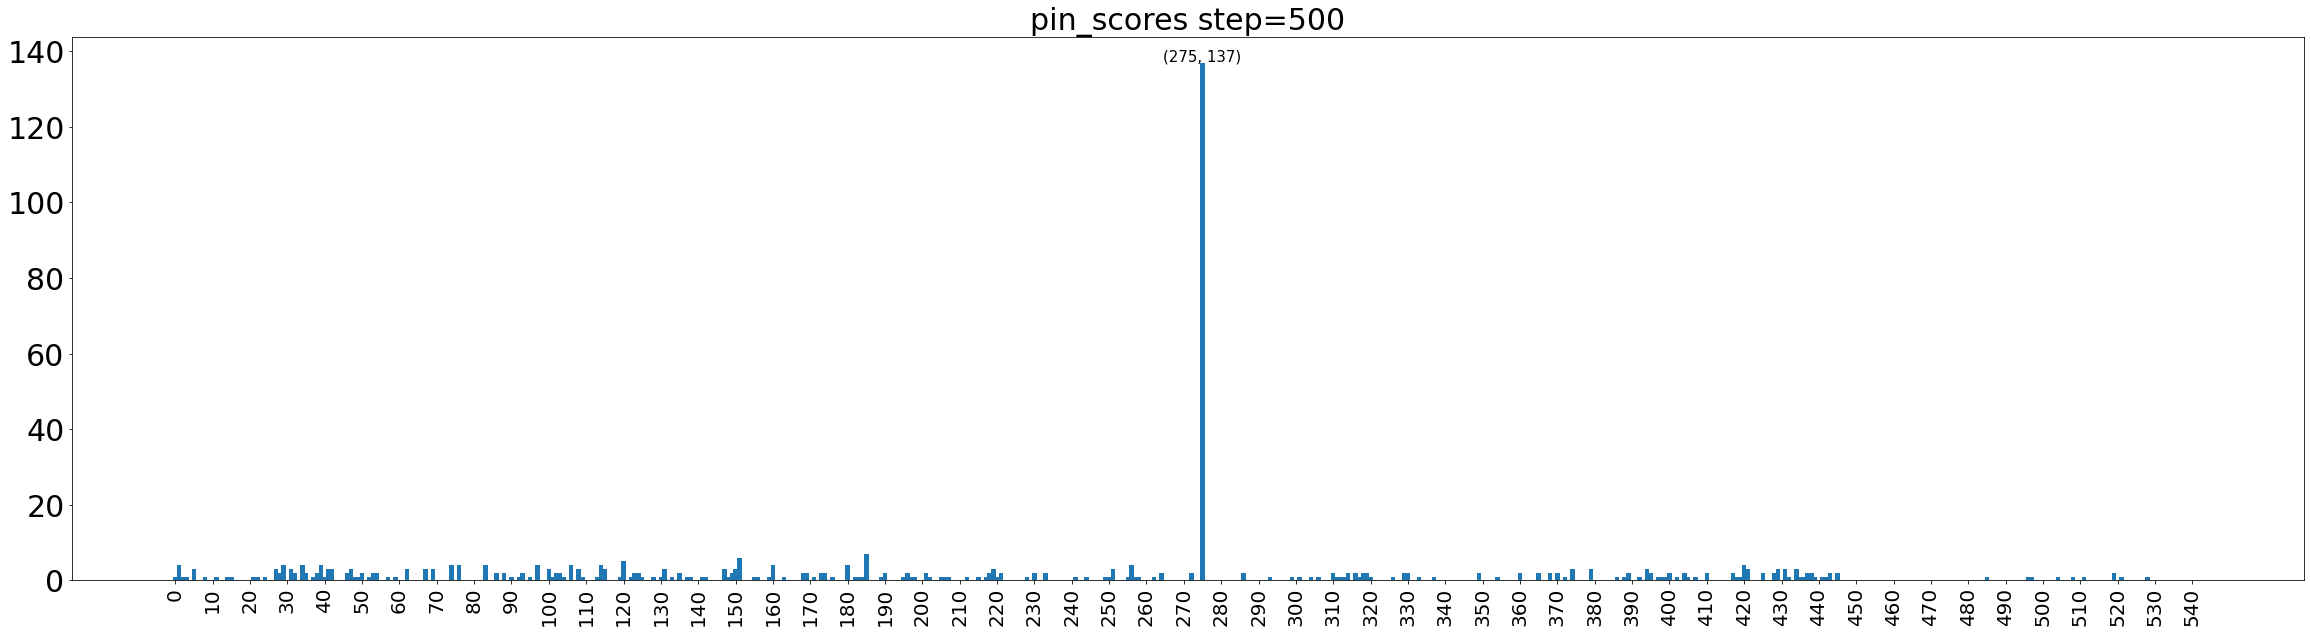

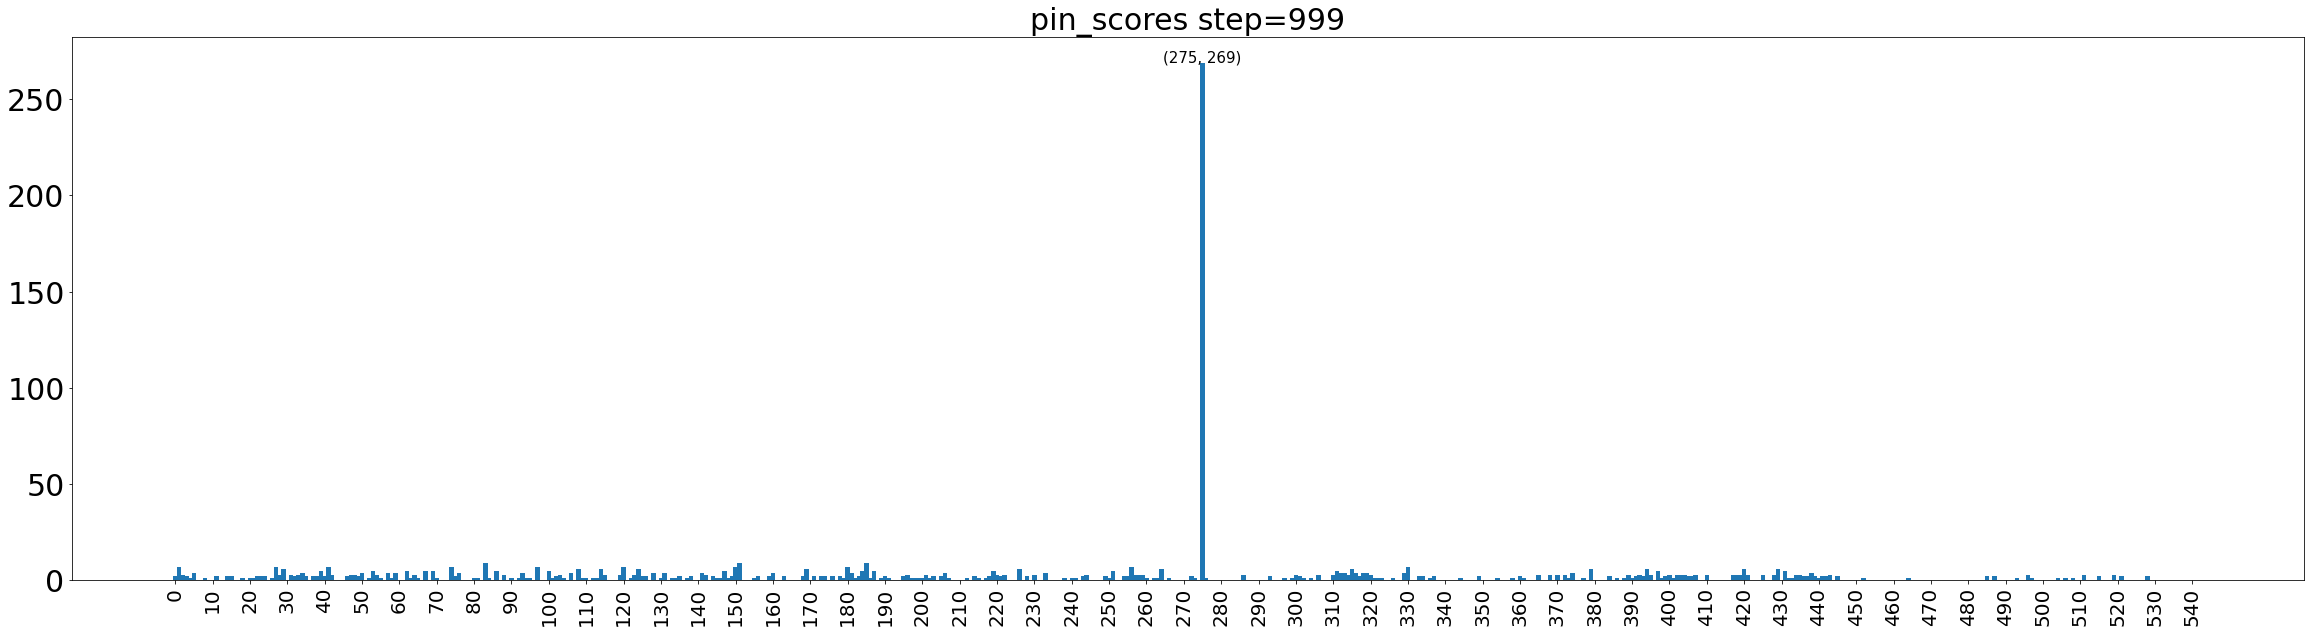

In [32]:
query_camera = 275
camera_scores = Pixie_Algorithm(query_camera, PIN_NODES=camera_nodes_rdd, BOARD_NODES=car_nodes_rdd,
                N_STEPS=1000, ALPHA=0.3)

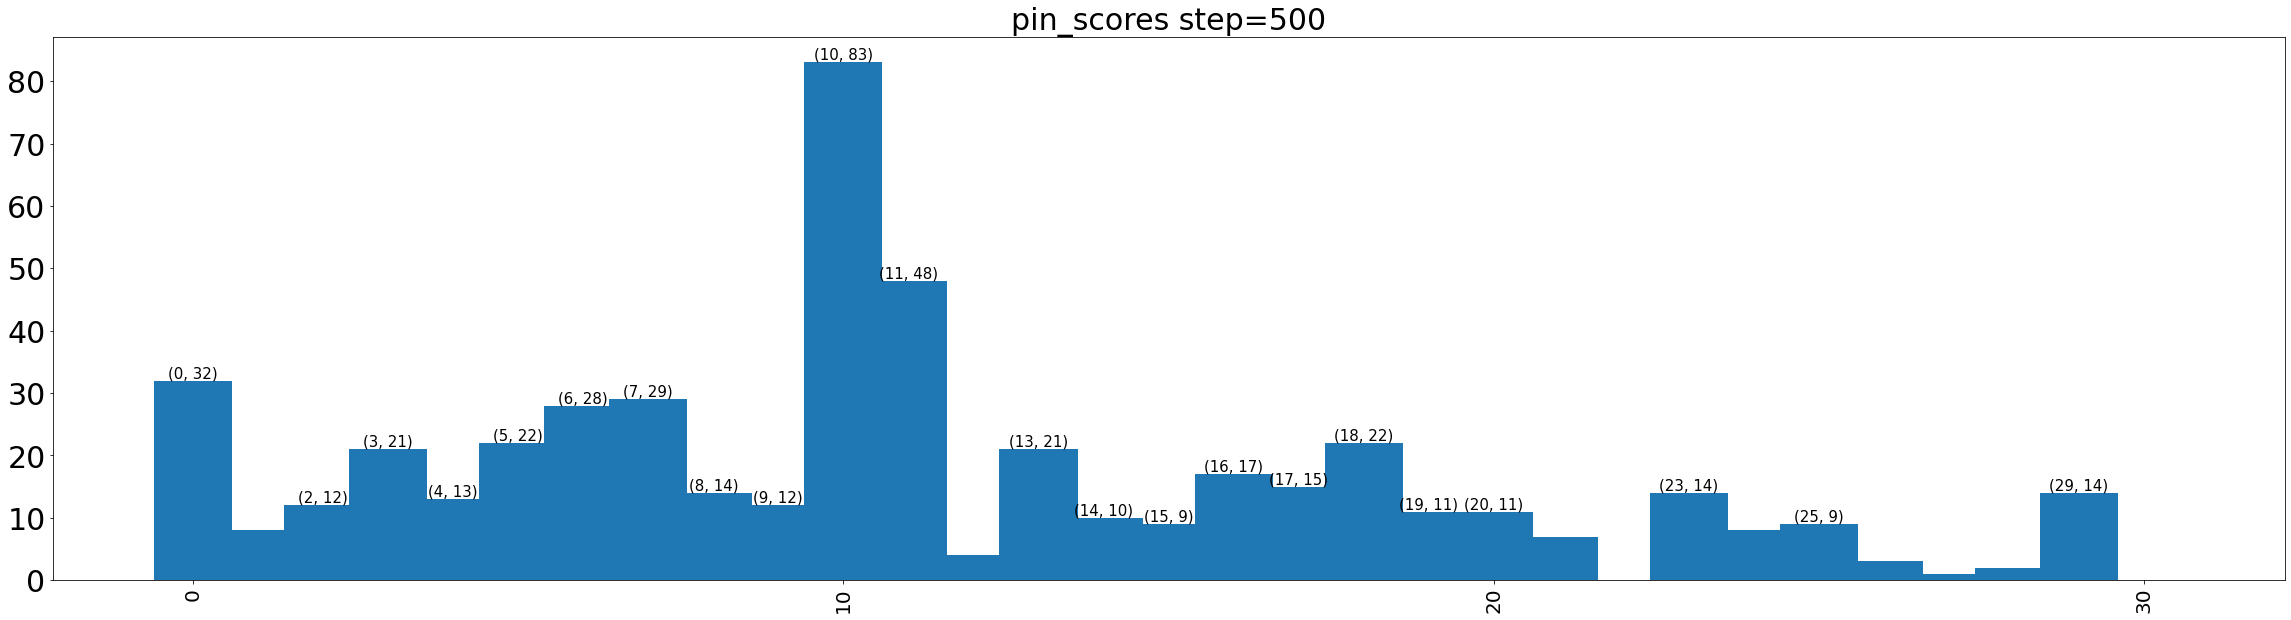

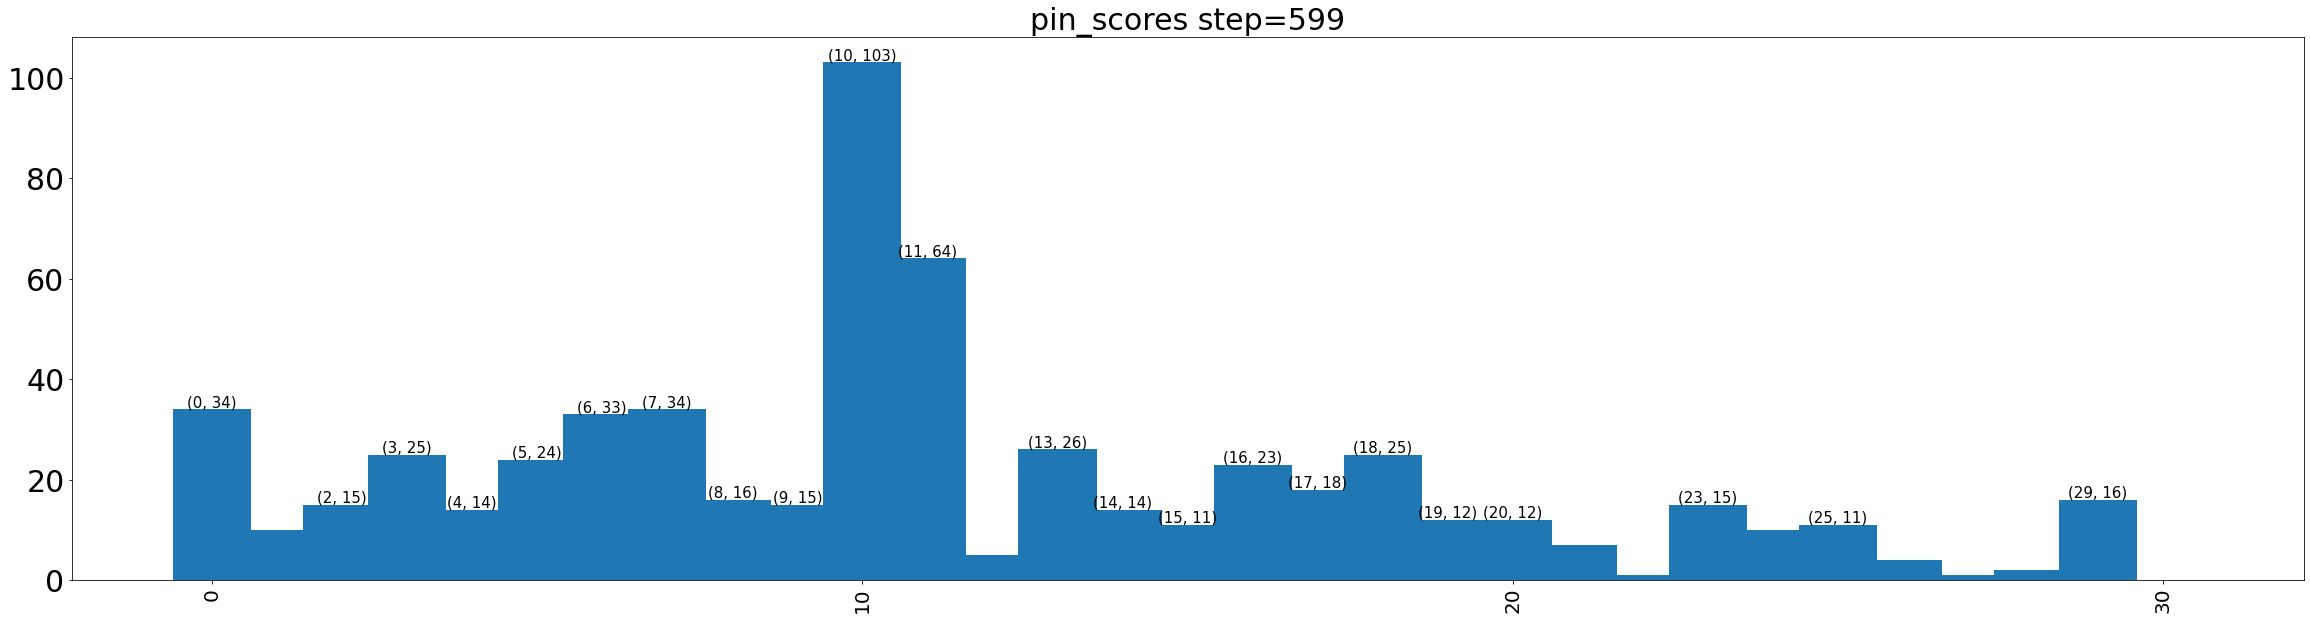

In [37]:
query_car = 10
car_scores = Pixie_Algorithm(query_car, PIN_NODES=car_nodes_rdd, BOARD_NODES=camera_nodes_rdd,
                N_STEPS=600, ALPHA=0.5)

### Part D02

In [38]:
def get_car_and_camera_nodes(day_of_week=9, hour_of_day=26):    
  df_camera_car_count = df_cleaned.filter(df_cleaned['FINAL_CAR_KEY'].isin(frequent_cars_list)) \
    .select('DEVICE_CODE', 'FINAL_CAR_KEY', 'PASS_DAY_TIME') \
      .filter((dayofweek('PASS_DAY_TIME')==day_of_week) | (hour('PASS_DAY_TIME')==hour_of_day)) \
        .groupBy('DEVICE_CODE', 'FINAL_CAR_KEY').count() \
          .sort('count', ascending=False)
  
  df_camera_car_count_indexed = StringIndexer(inputCol='FINAL_CAR_KEY', outputCol='CAR_INDEX').fit(df_camera_car_count).transform(df_camera_car_count)
  df_camera_car_count_indexed = StringIndexer(inputCol='DEVICE_CODE', outputCol='CAMERA_INDEX').fit(df_camera_car_count_indexed).transform(df_camera_car_count_indexed)
  
  df_car_nodes = df_camera_car_count_indexed.select(col('CAR_INDEX'), col('CAMERA_INDEX'), col('count')) \
    .groupBy('CAR_INDEX').agg(collect_list('CAMERA_INDEX'))

  df_camera_nodes = df_camera_car_count_indexed.select(col('CAR_INDEX'), col('CAMERA_INDEX'), col('count')) \
    .groupBy('CAMERA_INDEX').agg(collect_list('CAR_INDEX'))

  car_nodes_rdd = df_car_nodes.rdd.map(lambda x: (x[0], sorted(x[1])))
  camera_nodes_rdd = df_camera_nodes.rdd.map(lambda x: (x[0], sorted(x[1])))

  return car_nodes_rdd, camera_nodes_rdd

In [39]:
car_nodes_rdd, camera_nodes_rdd = get_car_and_camera_nodes(4,7)

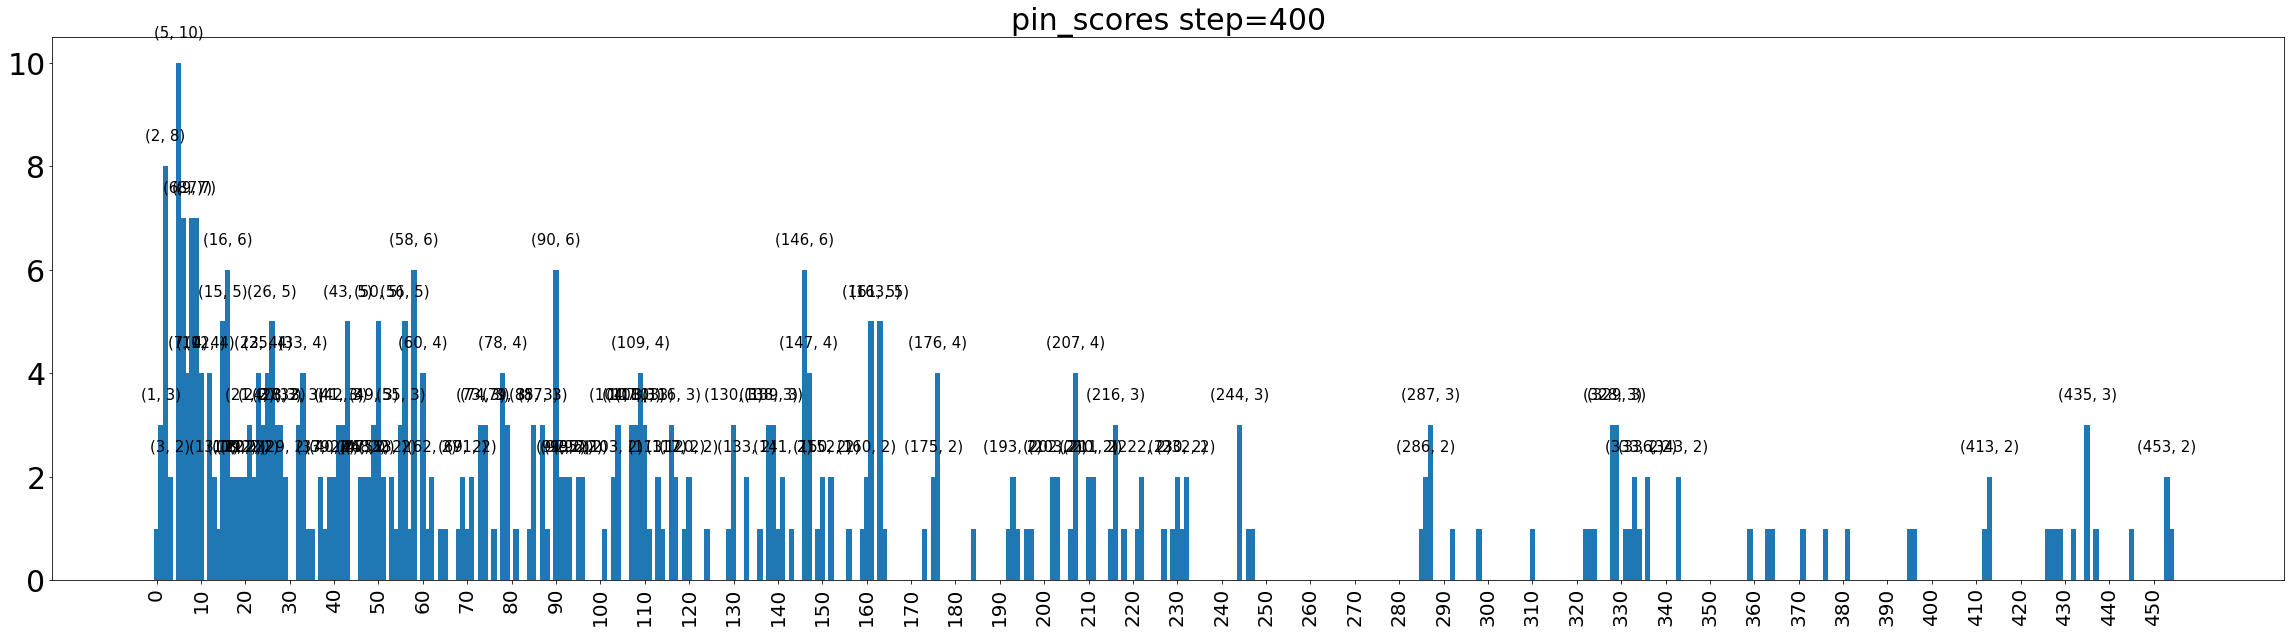

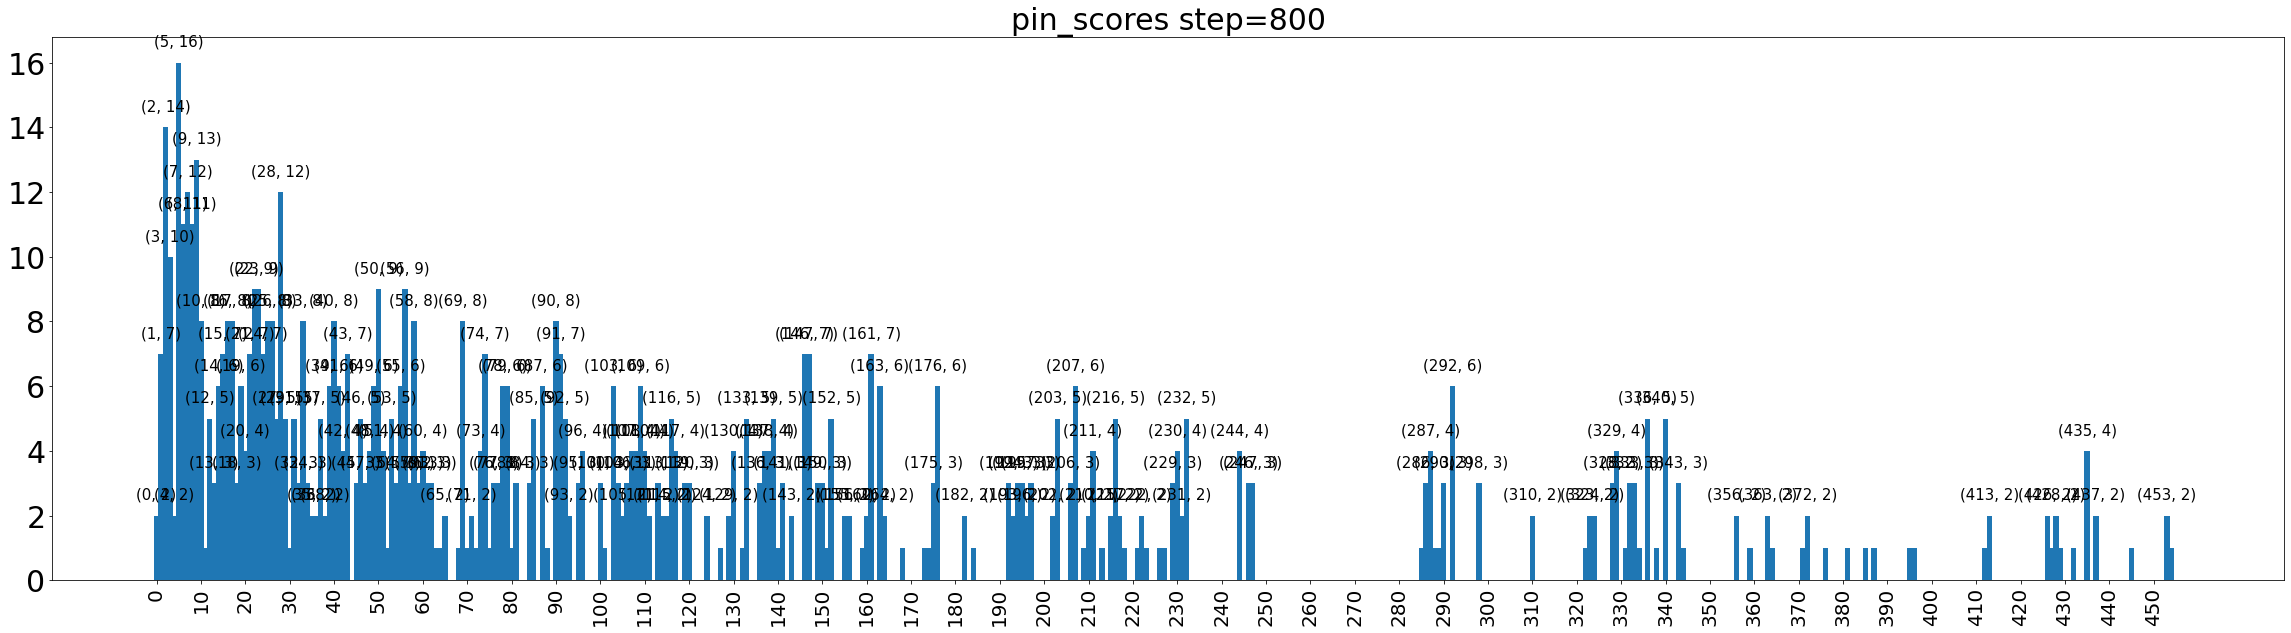

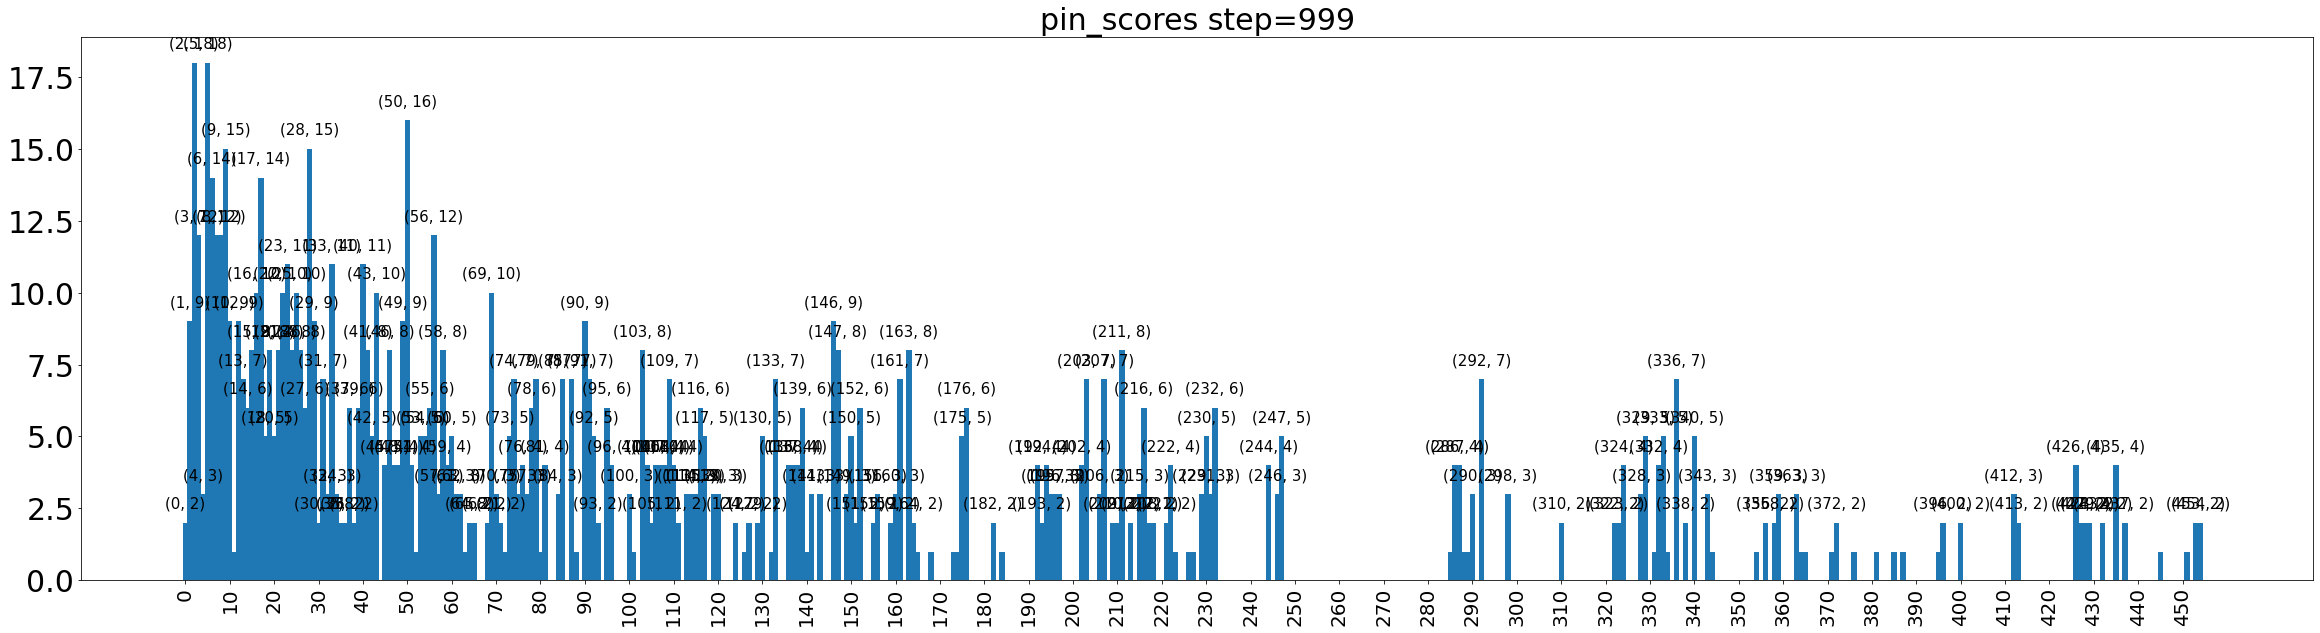

In [40]:
query_camera = 50
camera_scores = Pixie_Algorithm(query_camera, PIN_NODES=camera_nodes_rdd, BOARD_NODES=car_nodes_rdd,
                N_STEPS=1000, ALPHA=0.3, EARLY_STOPPING=40)

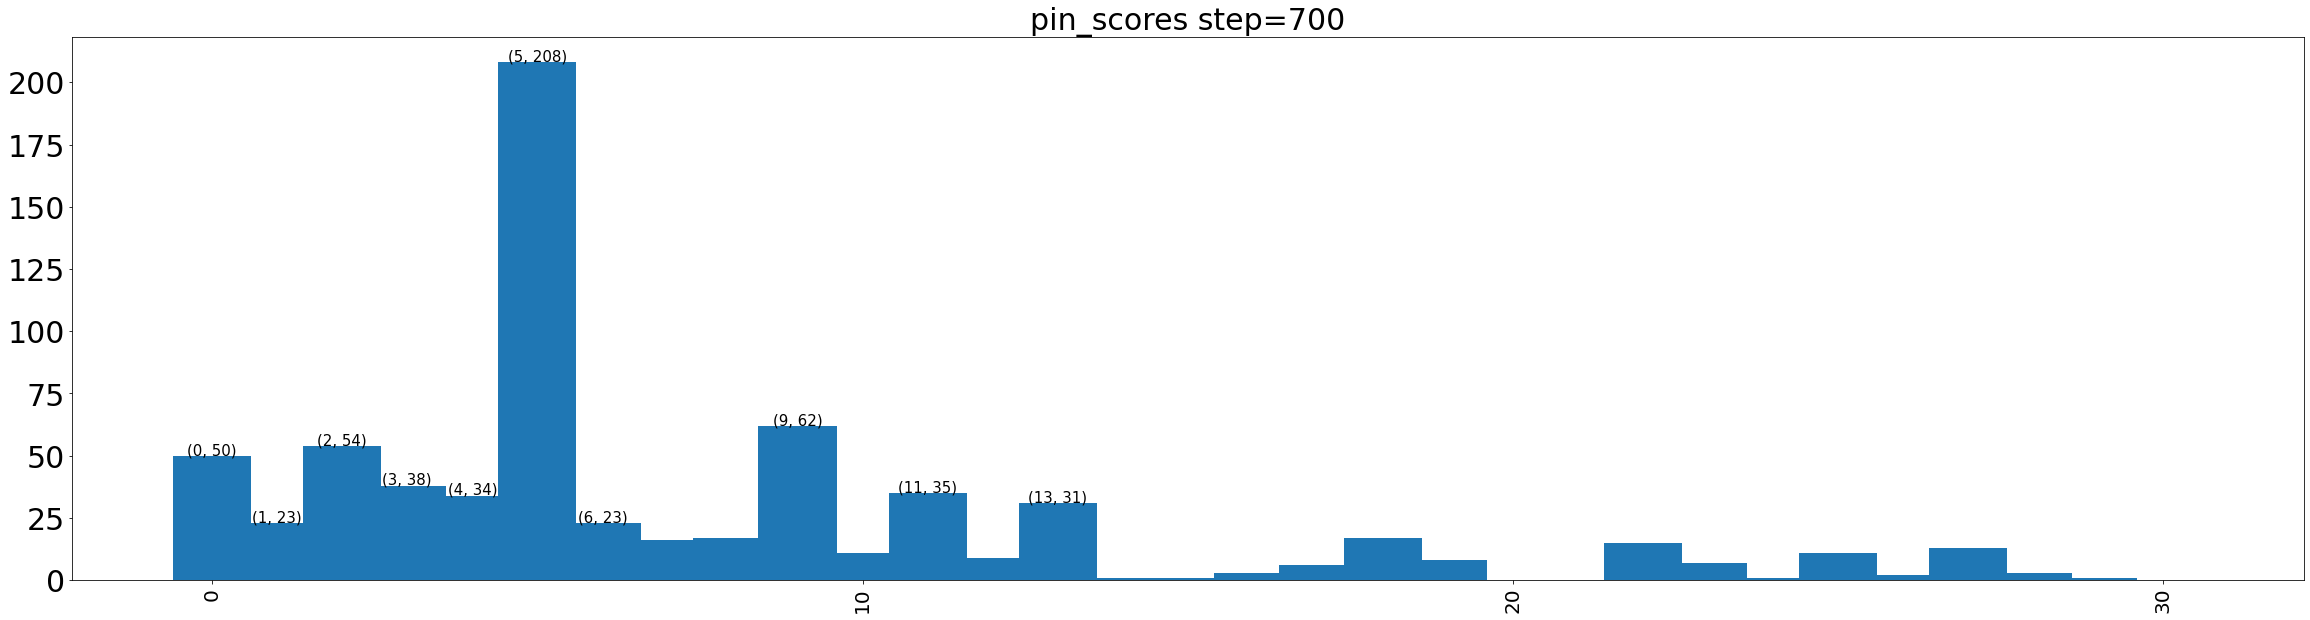

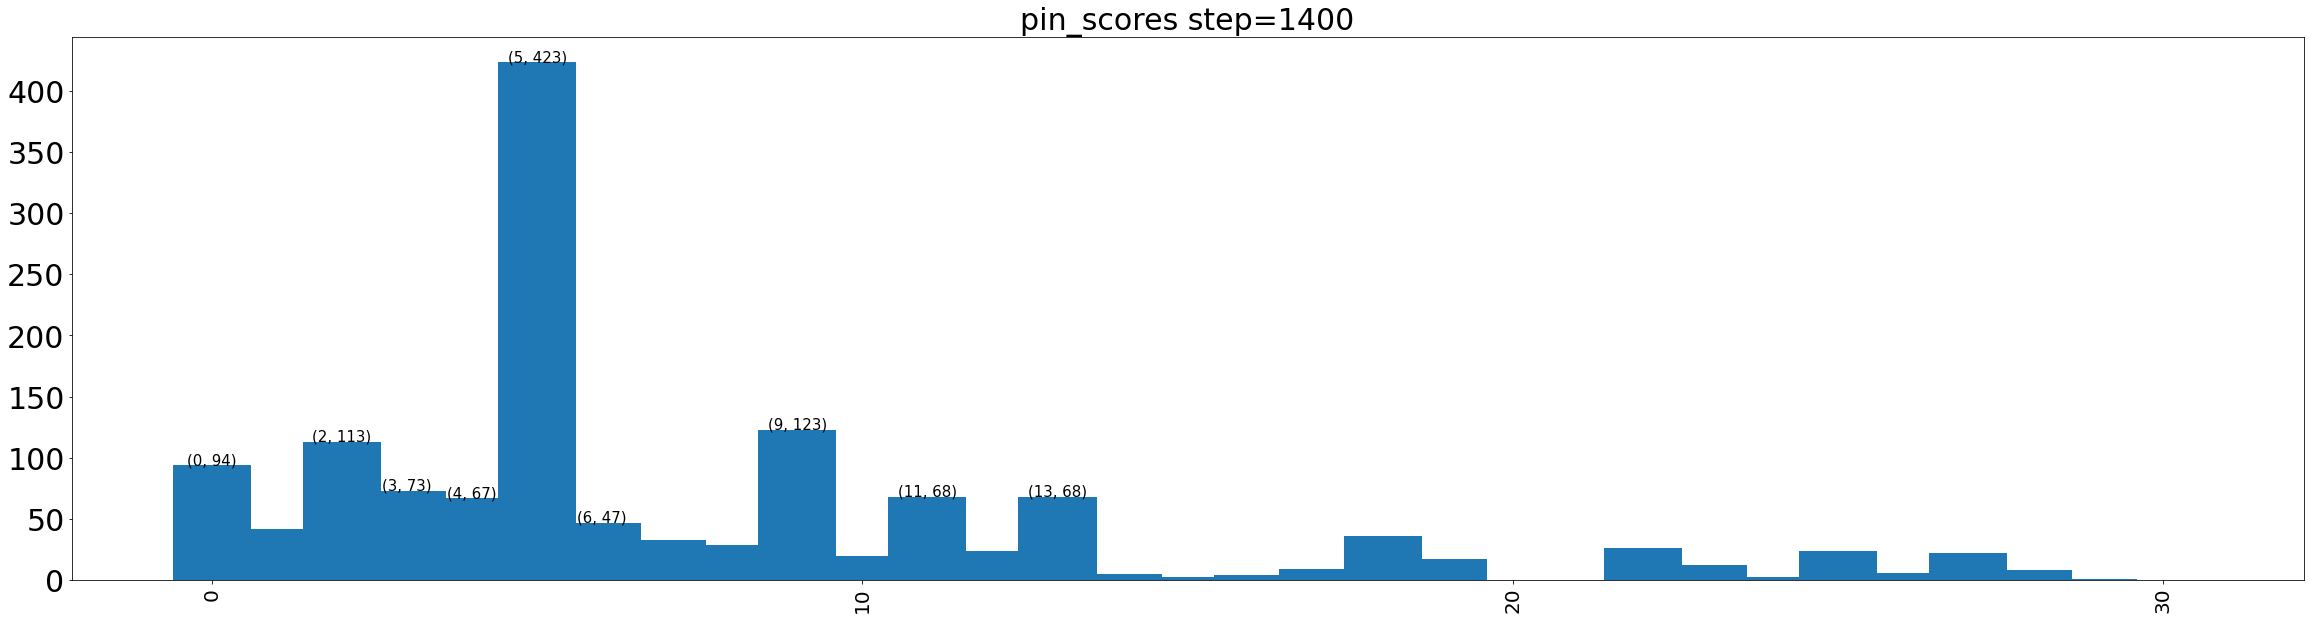

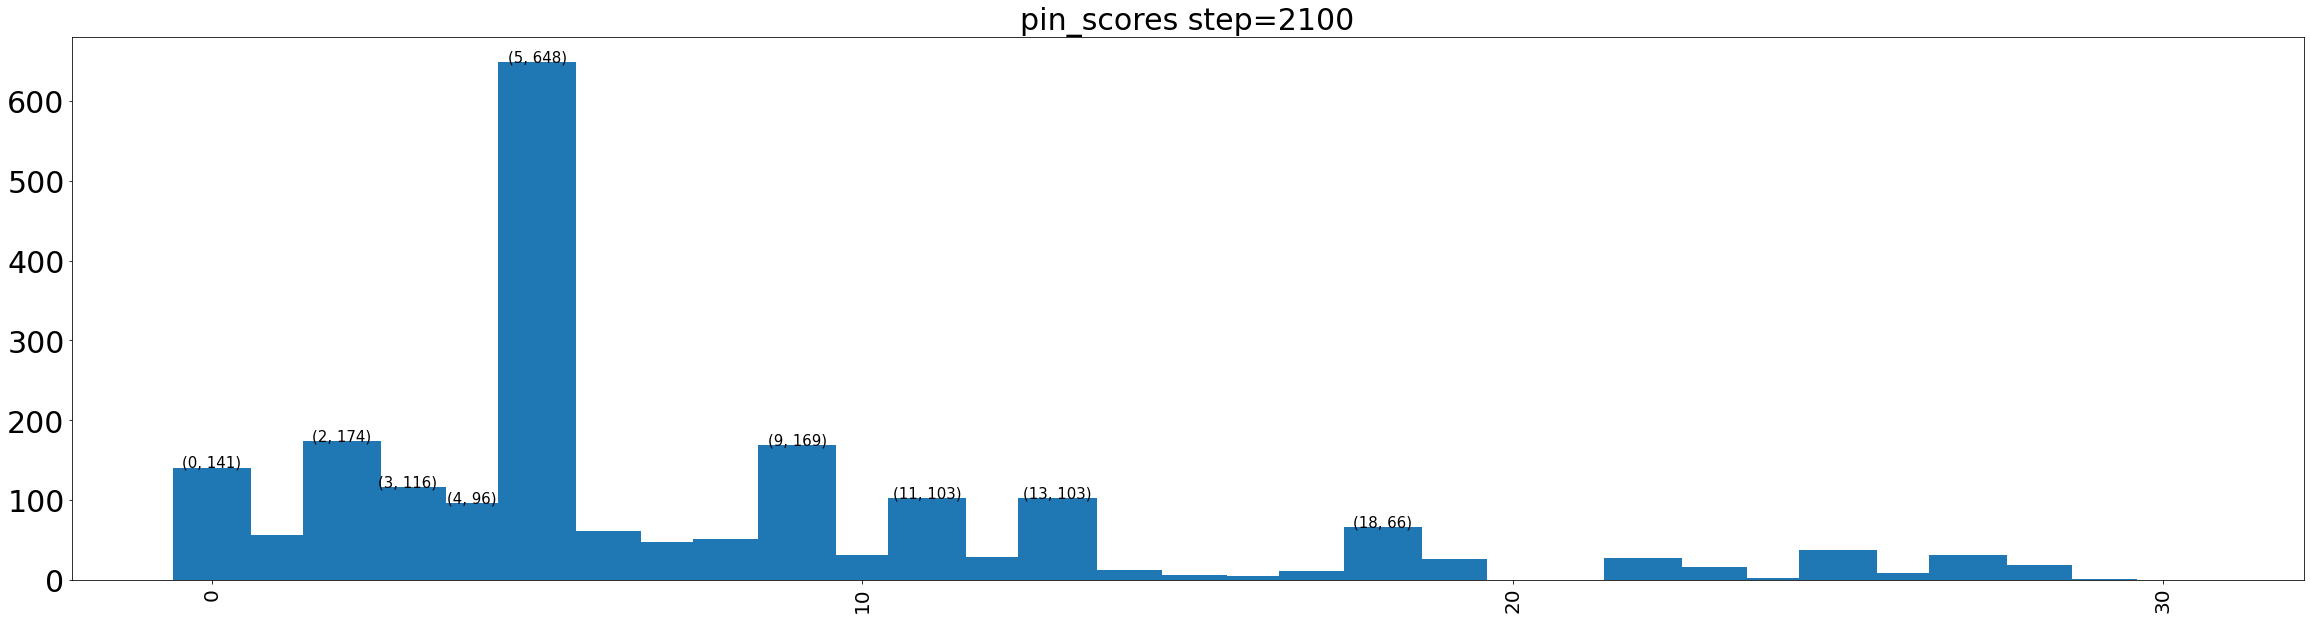

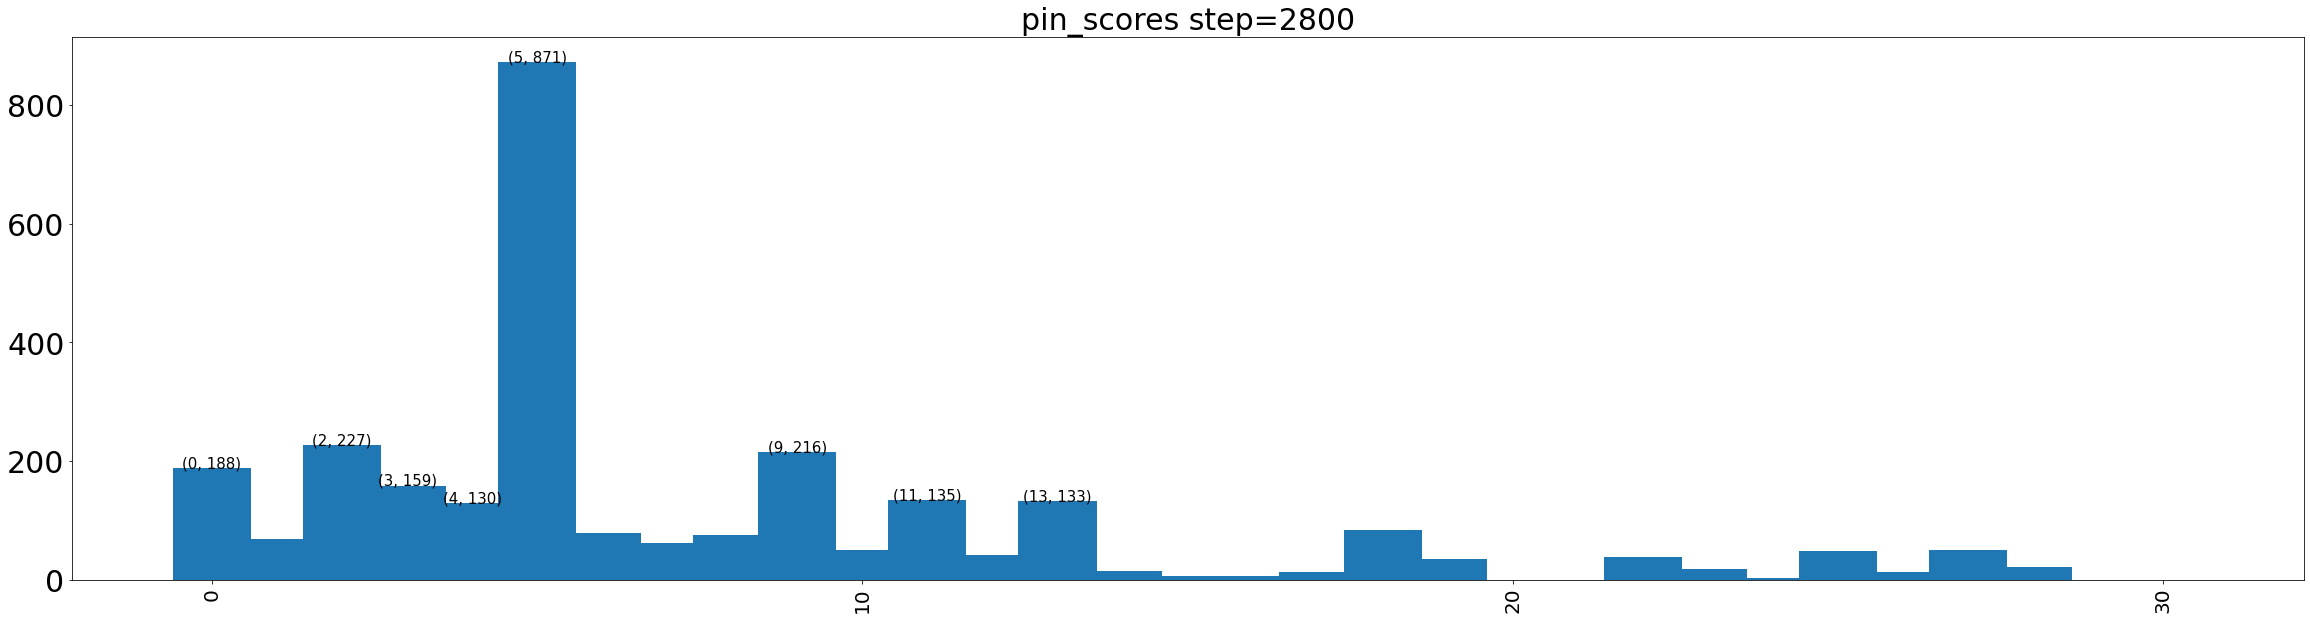

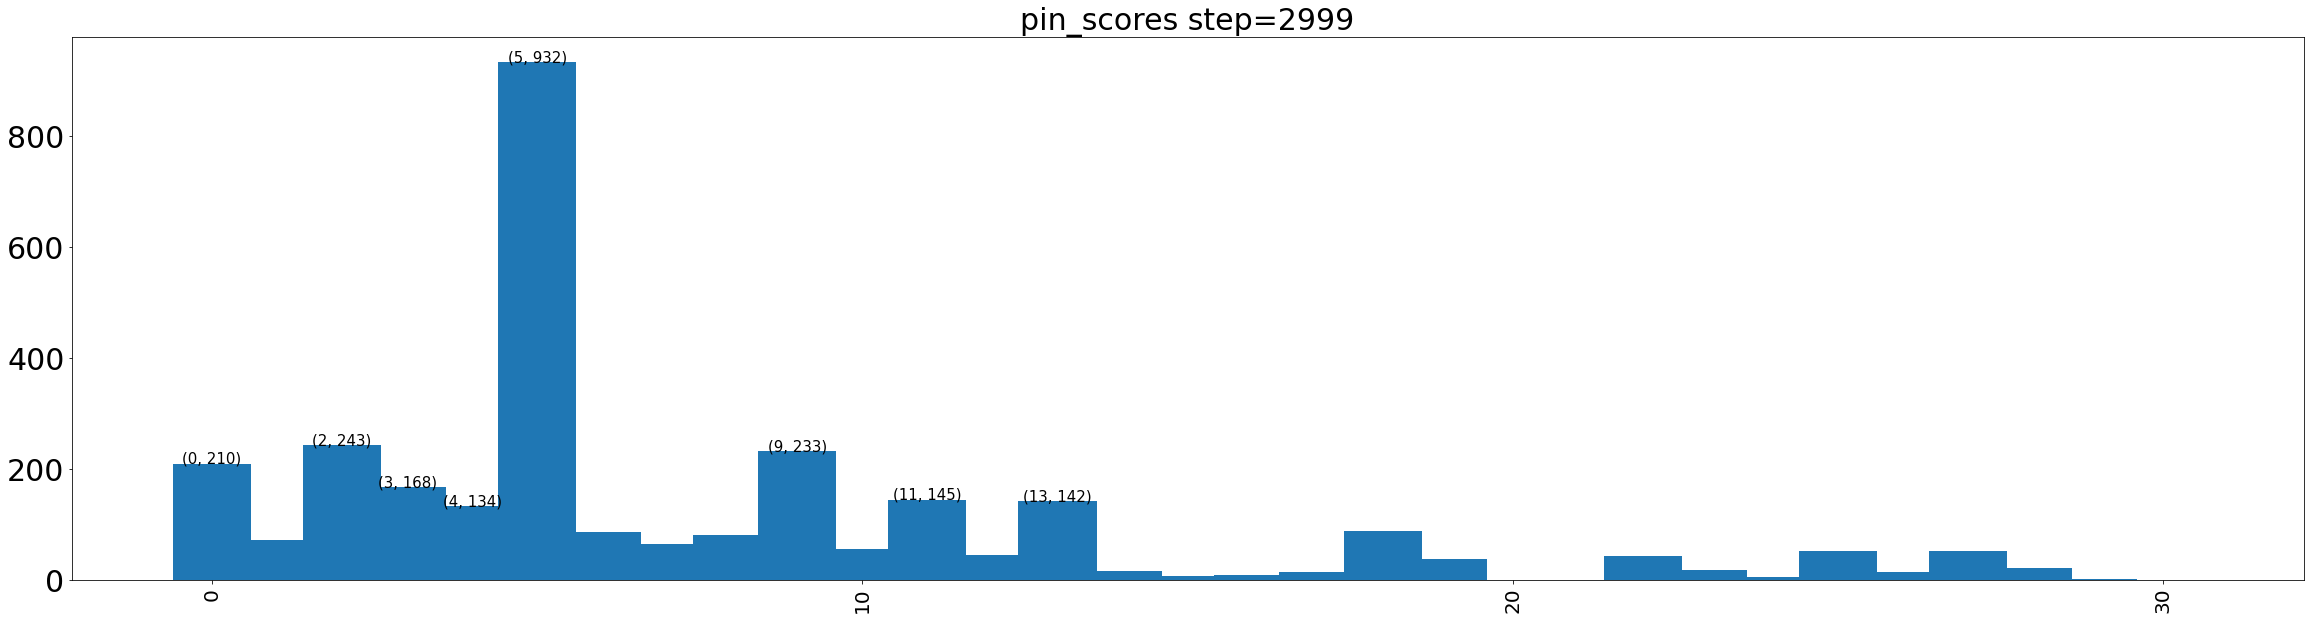

In [42]:
query_car = 5
car_scores = Pixie_Algorithm(query_car, PIN_NODES=car_nodes_rdd, BOARD_NODES=camera_nodes_rdd,
                N_STEPS=3000, ALPHA=0.5, EARLY_STOPPING=70)

### Part D03

In [43]:
car_nodes_rdd, camera_nodes_rdd = get_car_and_camera_nodes(4)

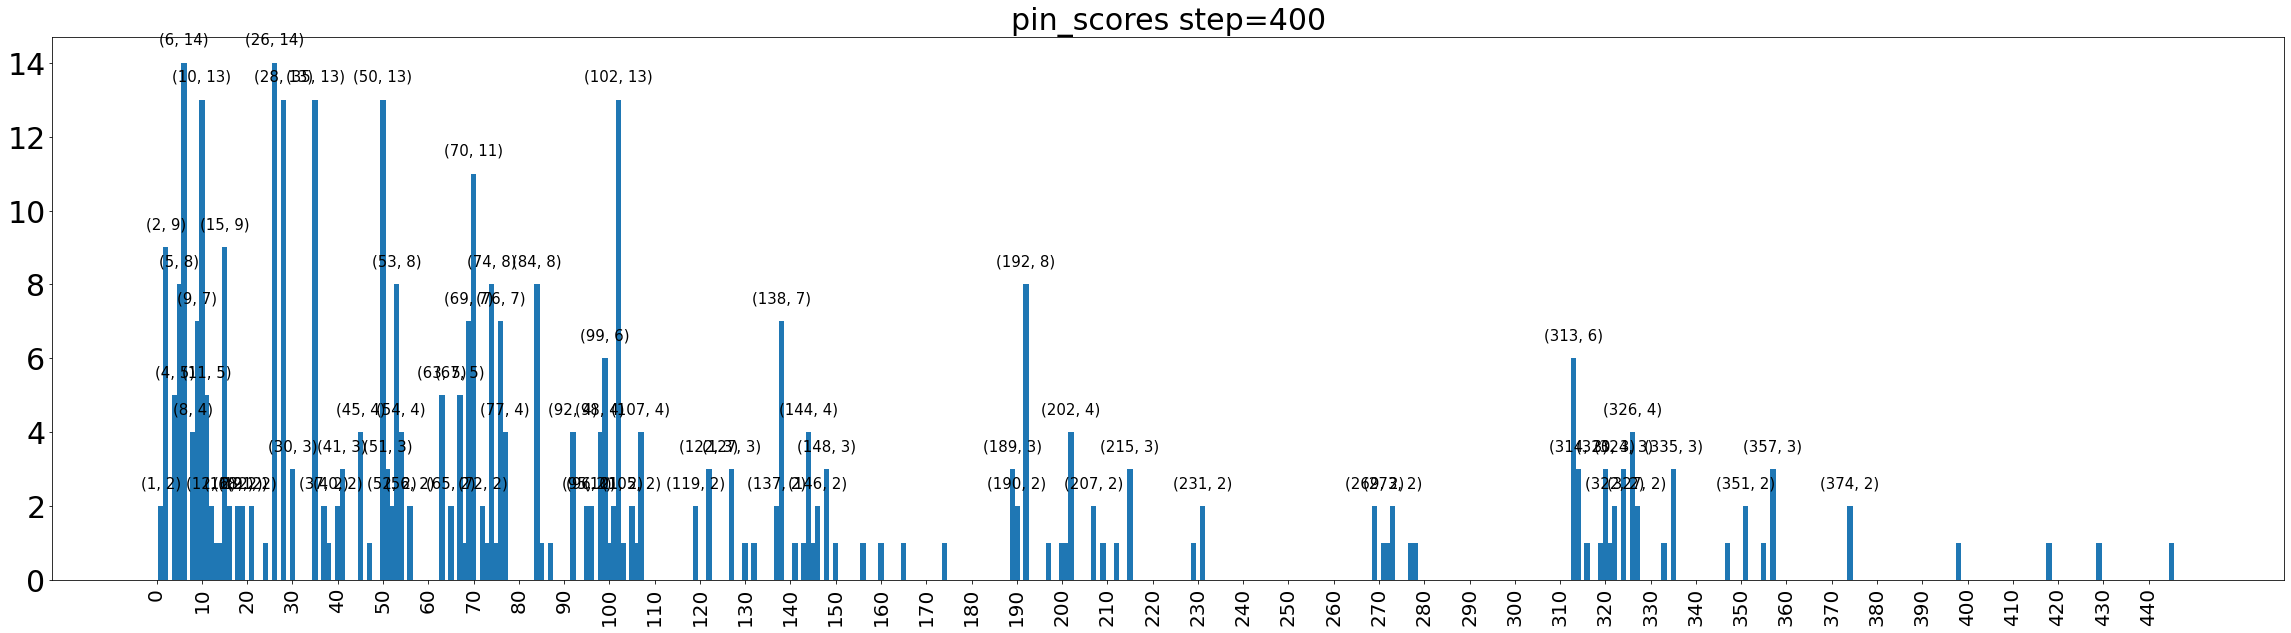

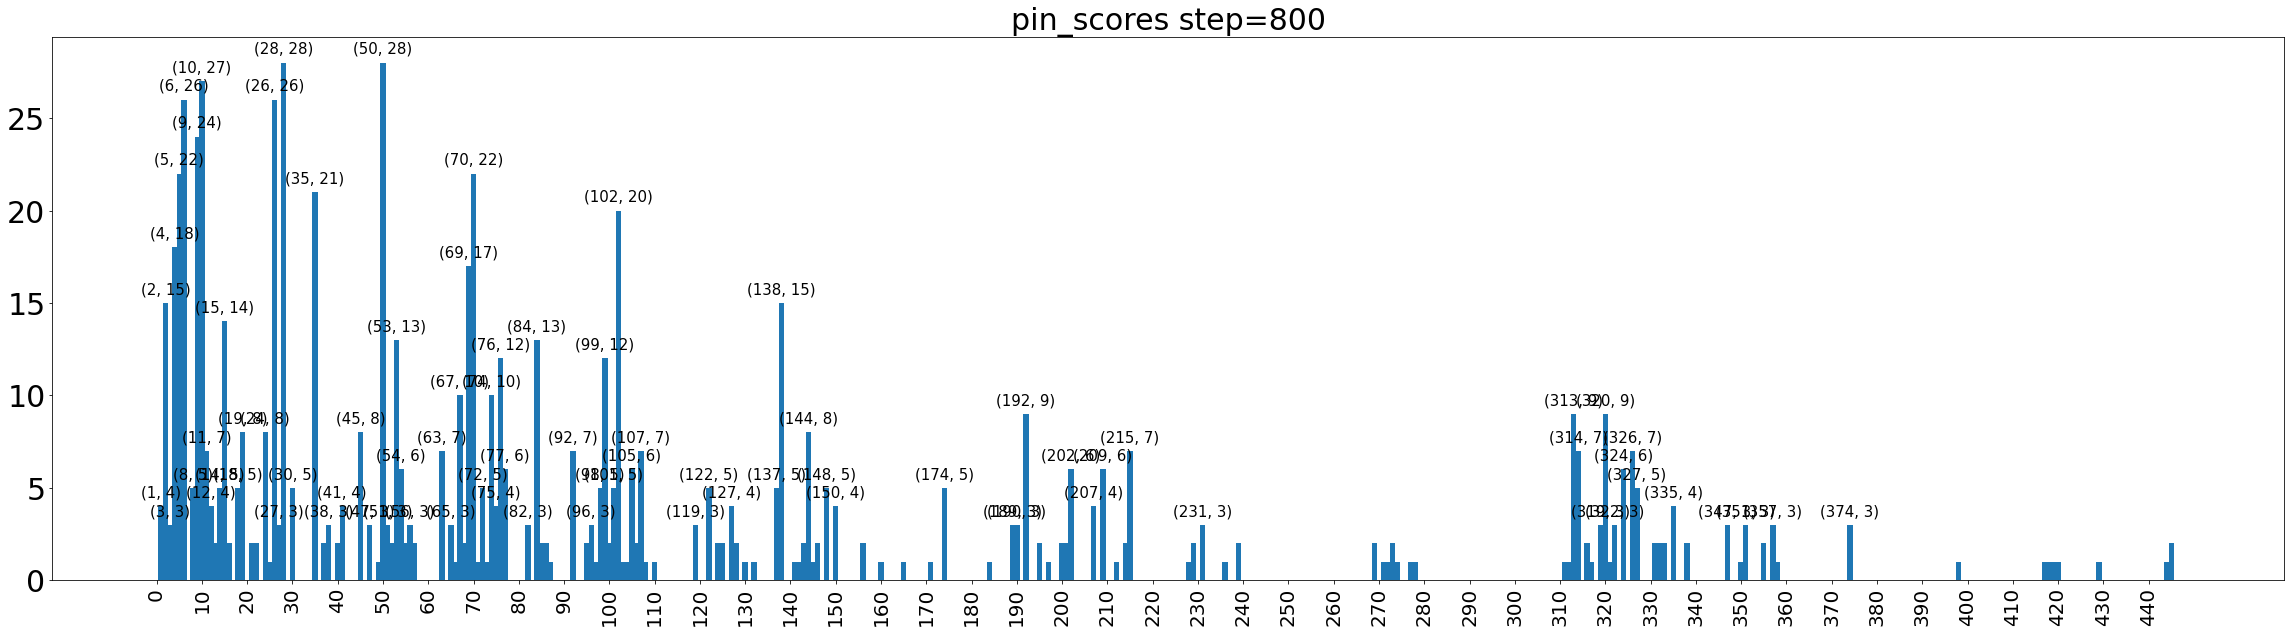

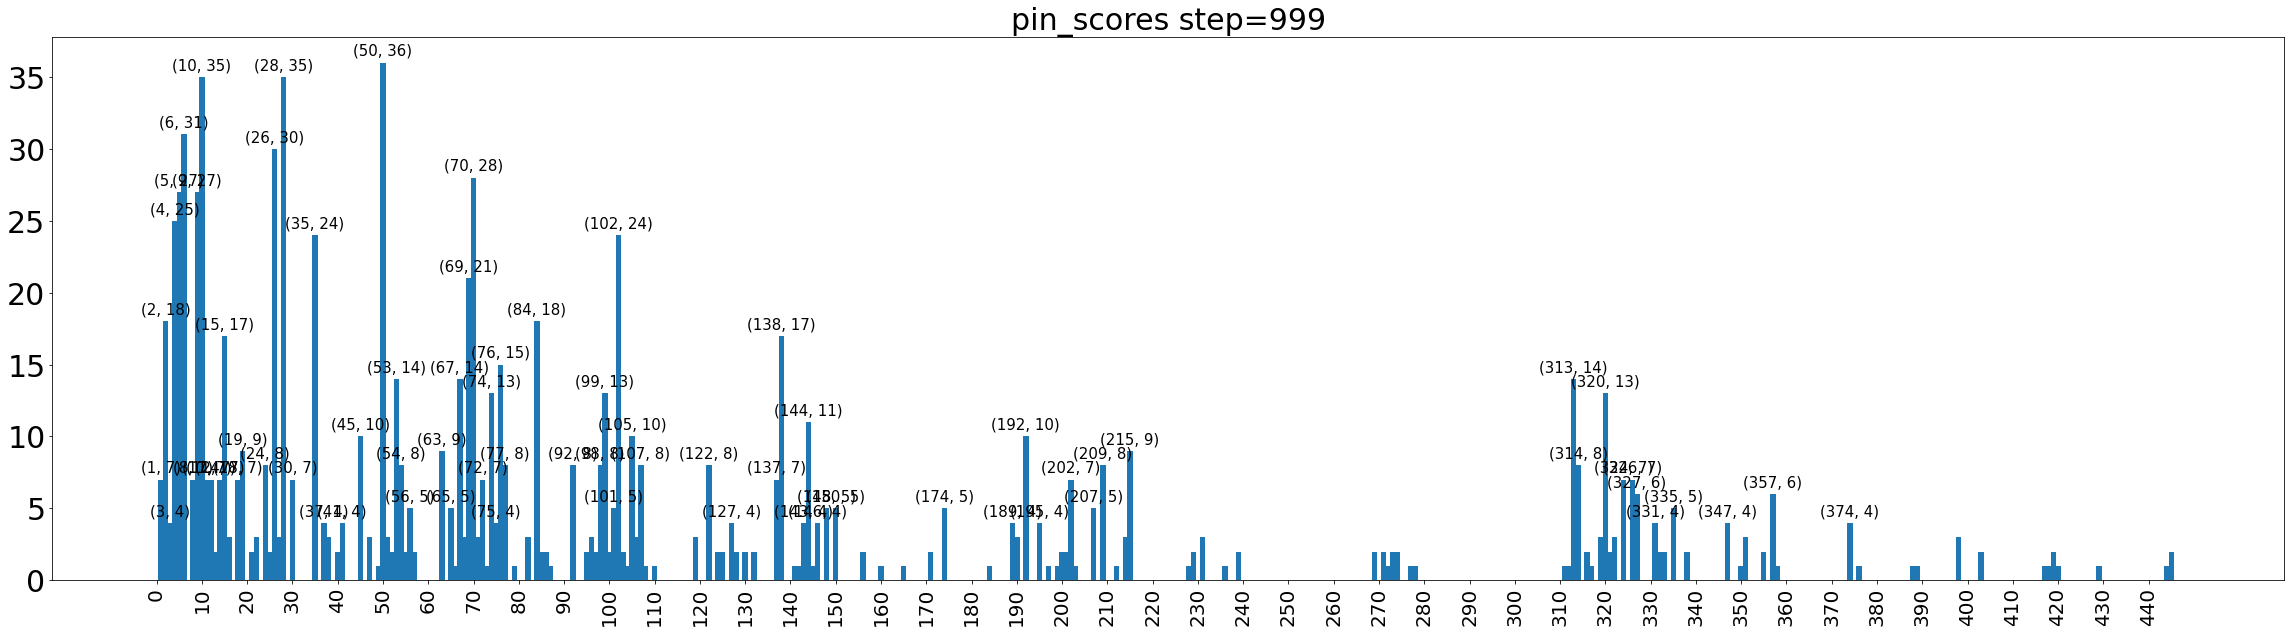

In [44]:
query_camera = 50
camera_scores = Pixie_Algorithm(query_camera, PIN_NODES=camera_nodes_rdd, BOARD_NODES=car_nodes_rdd,
                N_STEPS=1000, ALPHA=0.3, EARLY_STOPPING=40)

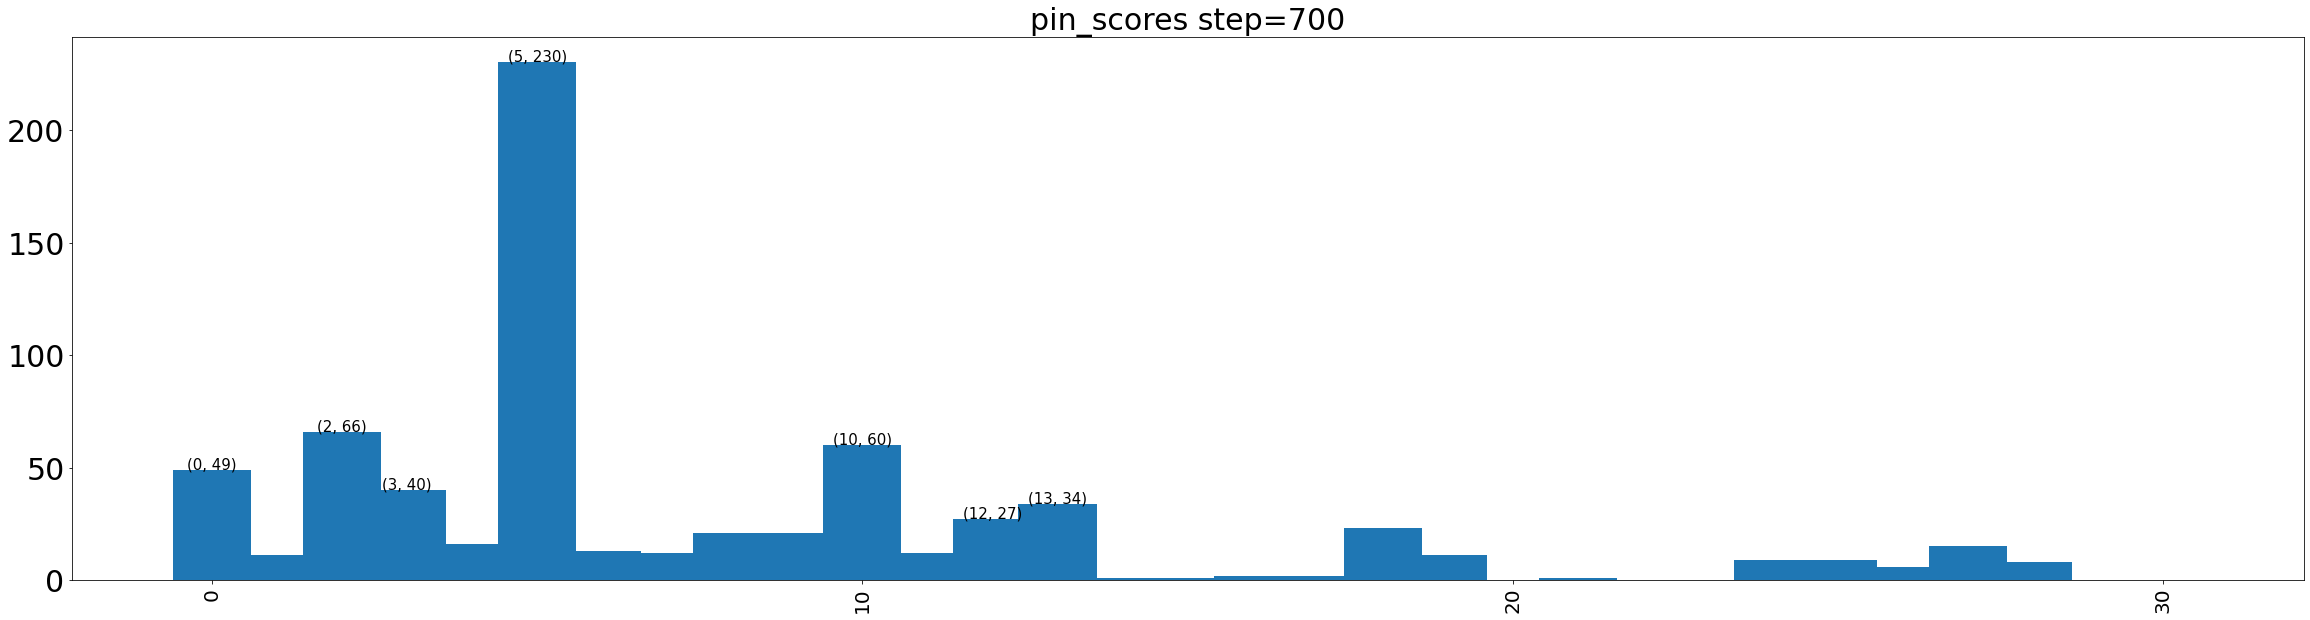

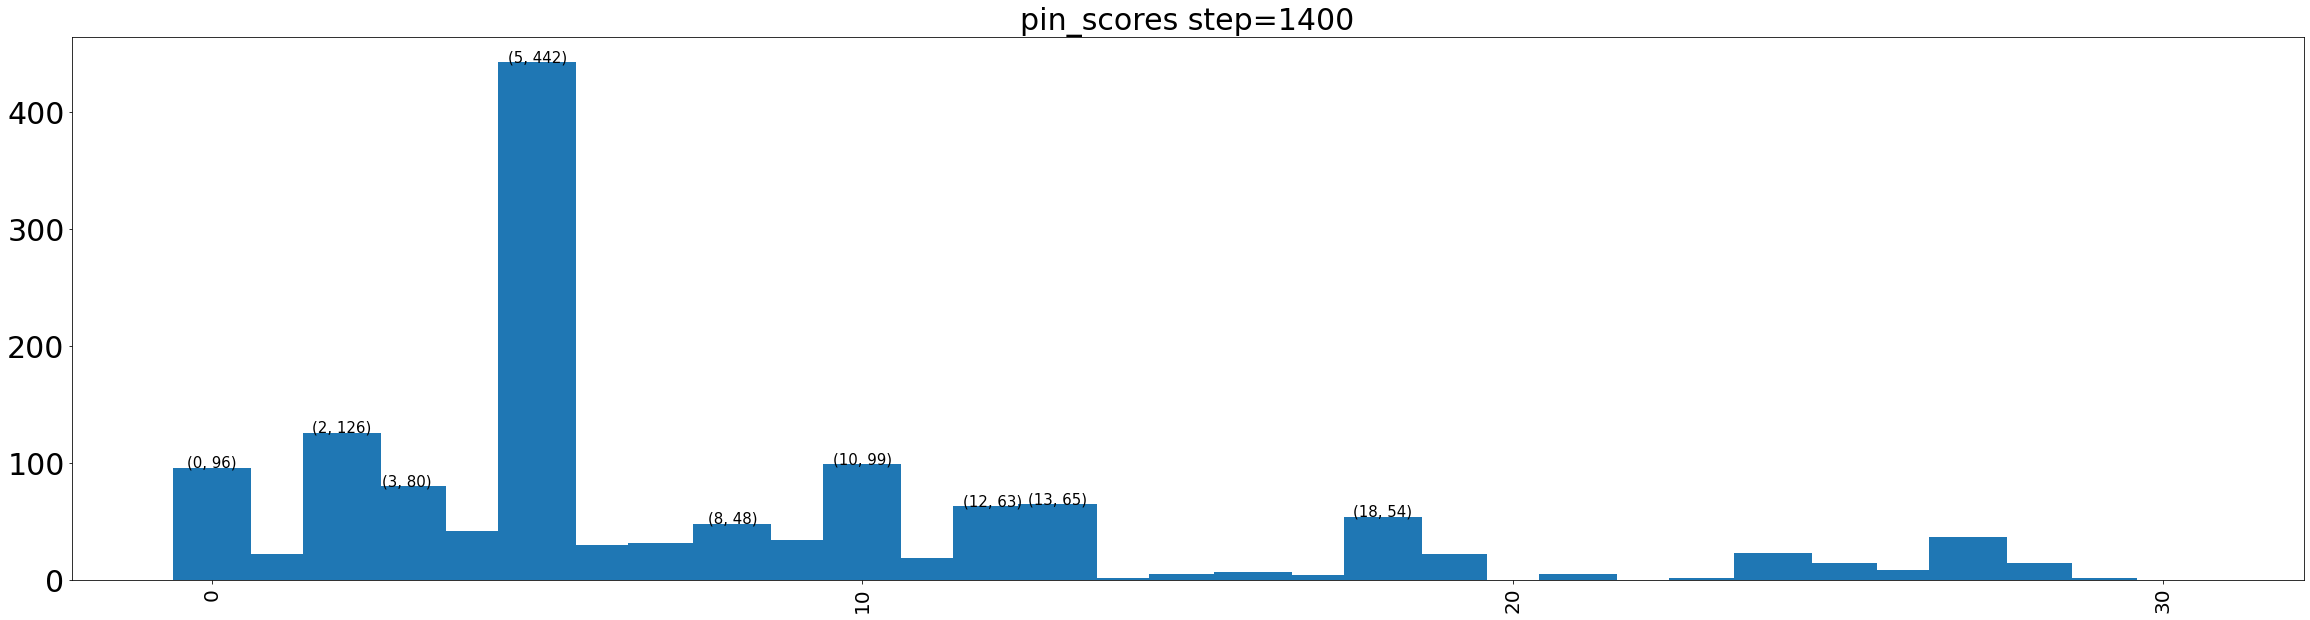

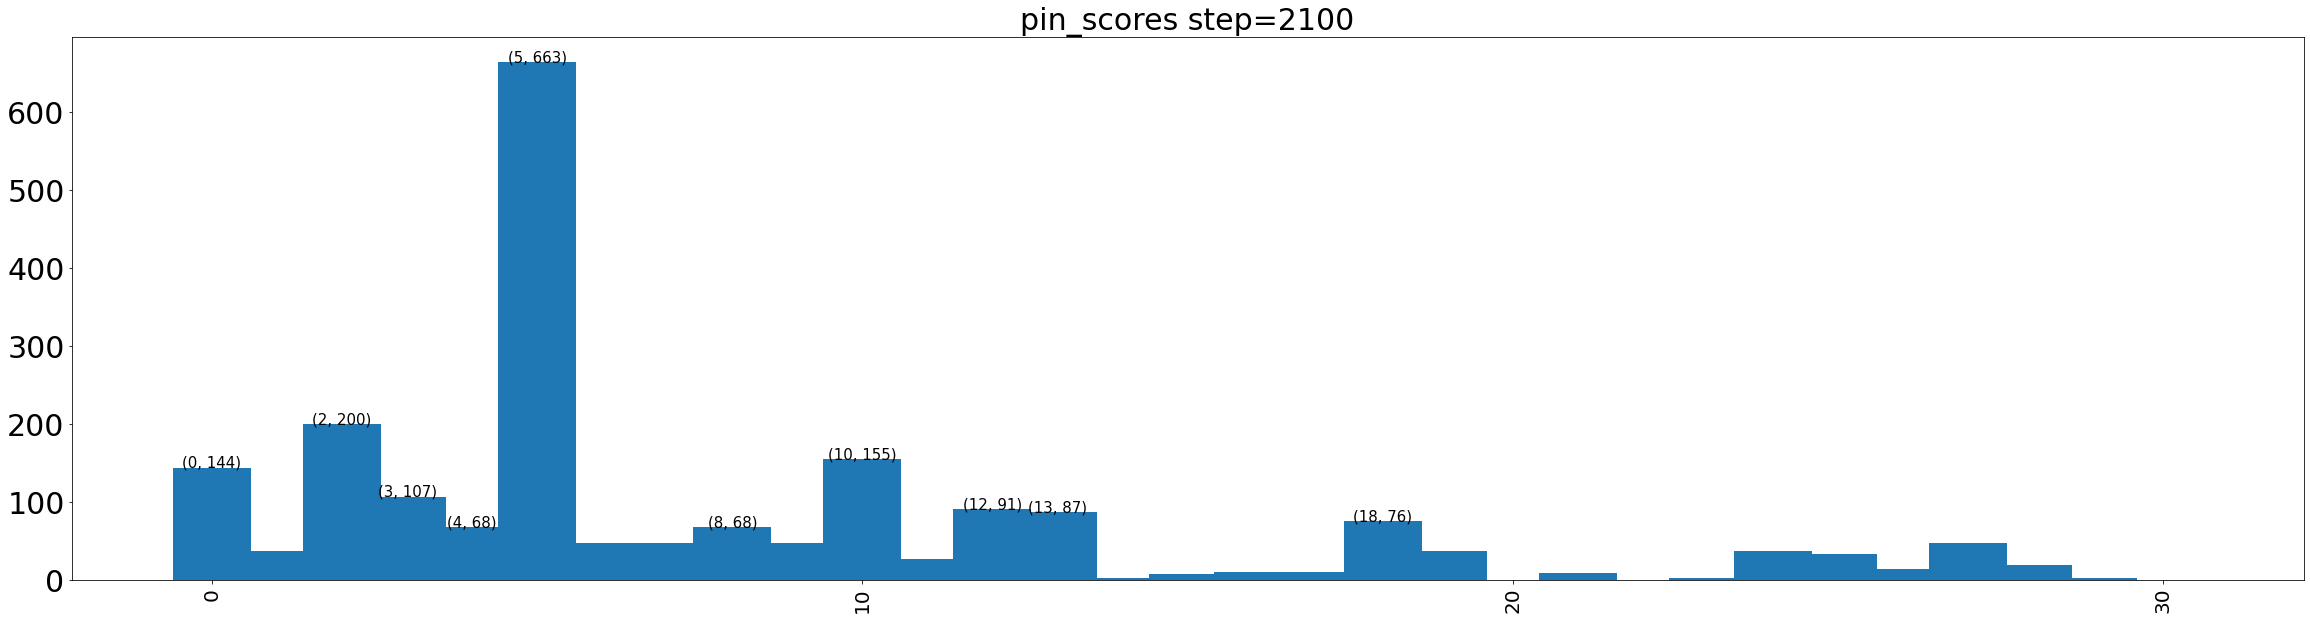

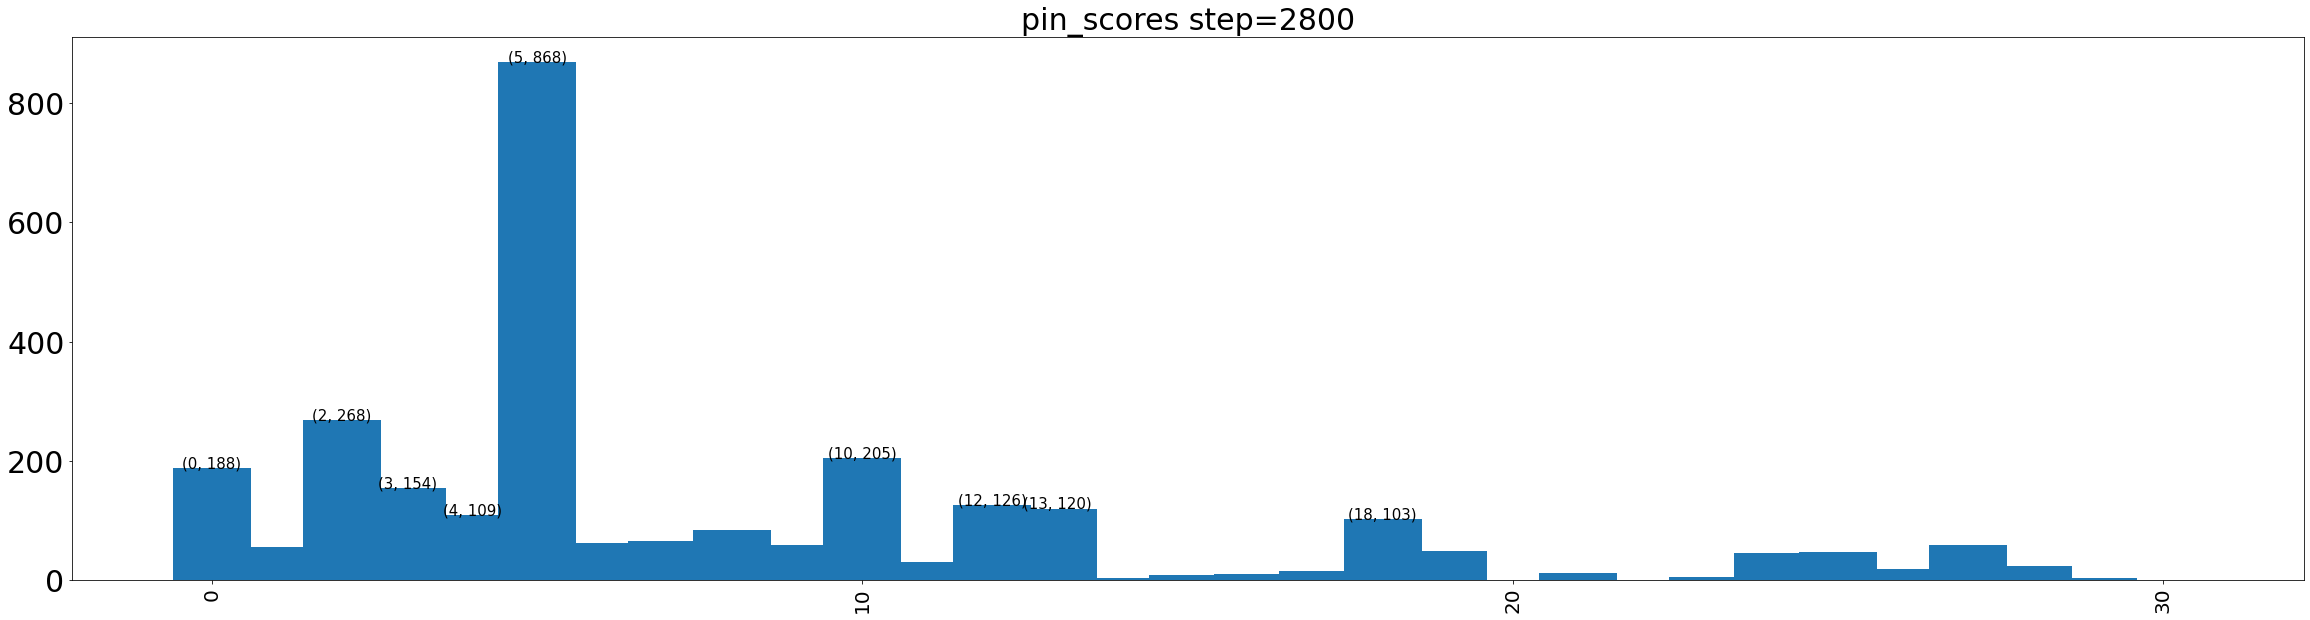

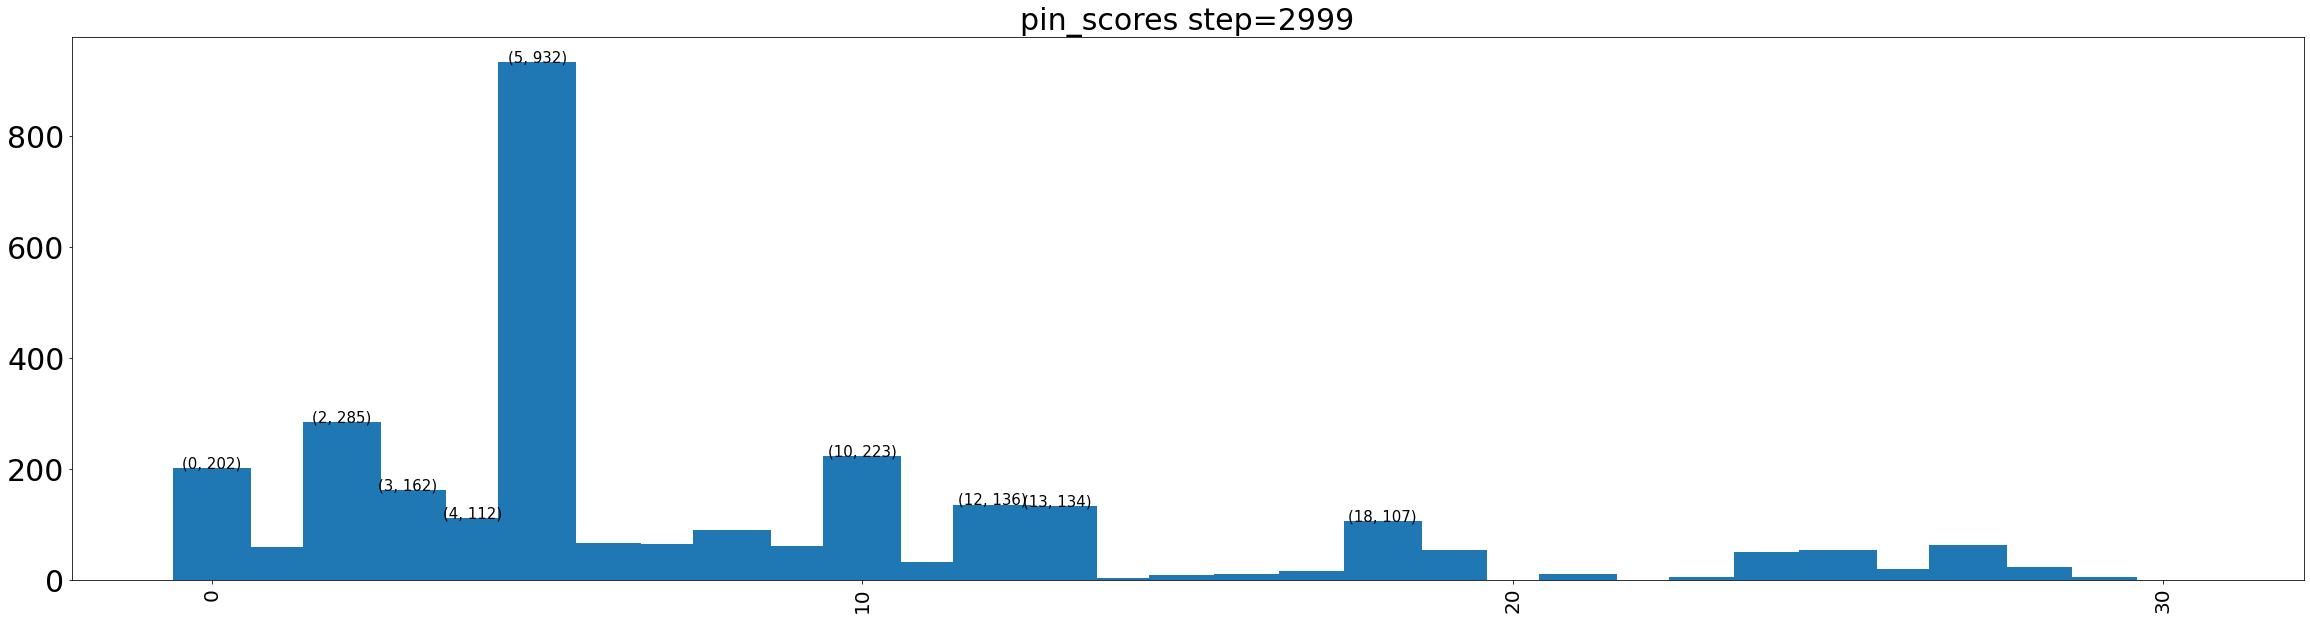

In [45]:
query_car = 5
car_scores = Pixie_Algorithm(query_car, PIN_NODES=car_nodes_rdd, BOARD_NODES=camera_nodes_rdd,
                N_STEPS=3000, ALPHA=0.5, EARLY_STOPPING=70)

### Part D04

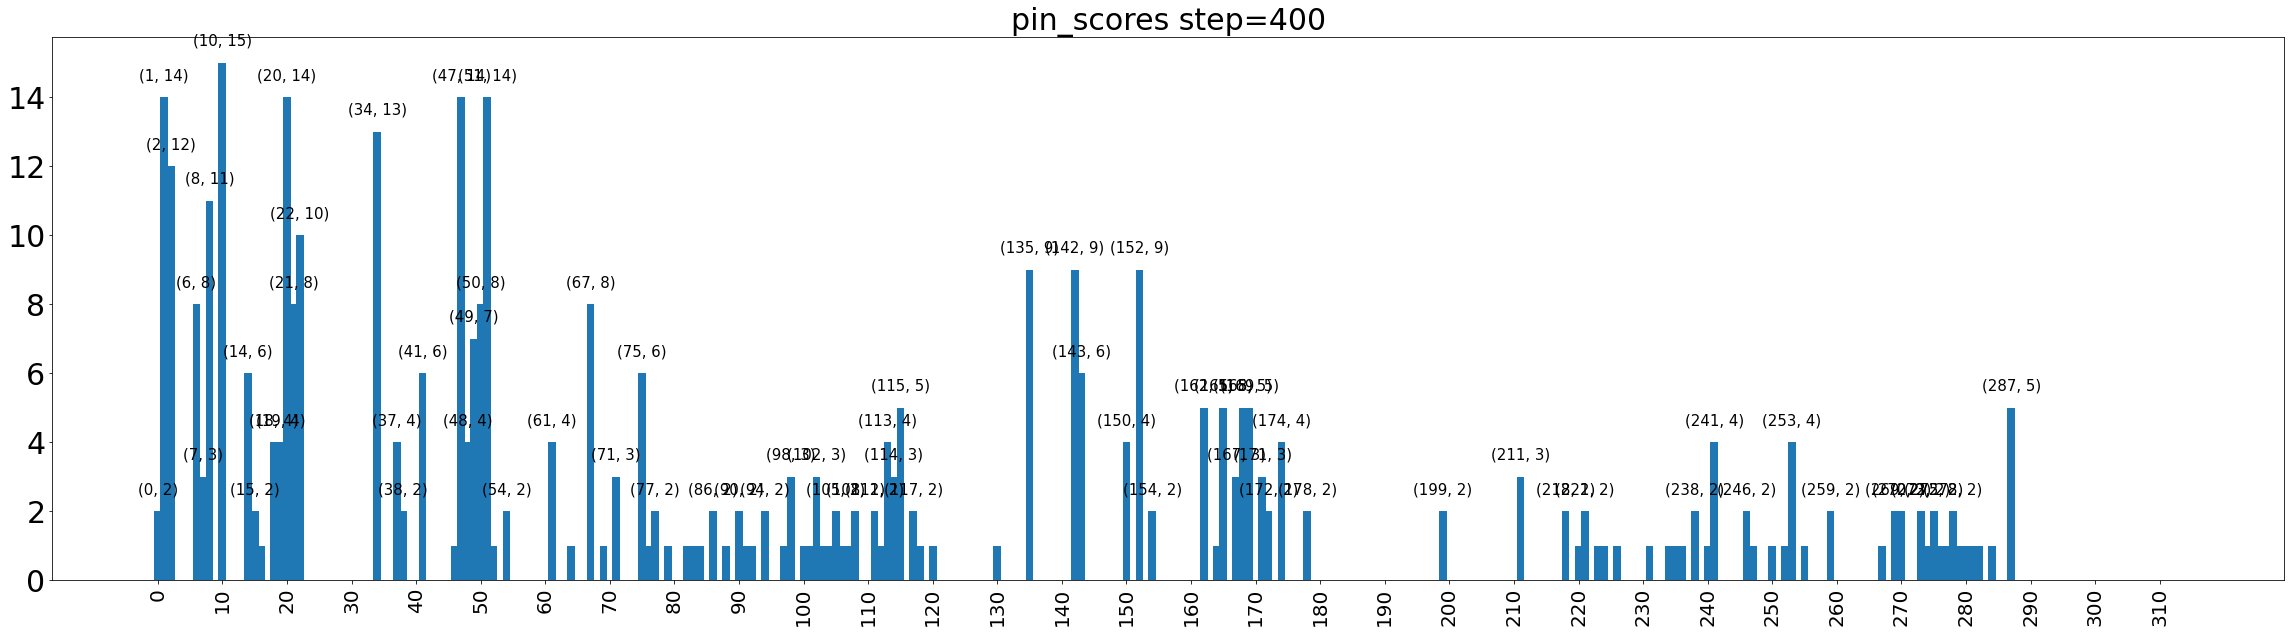

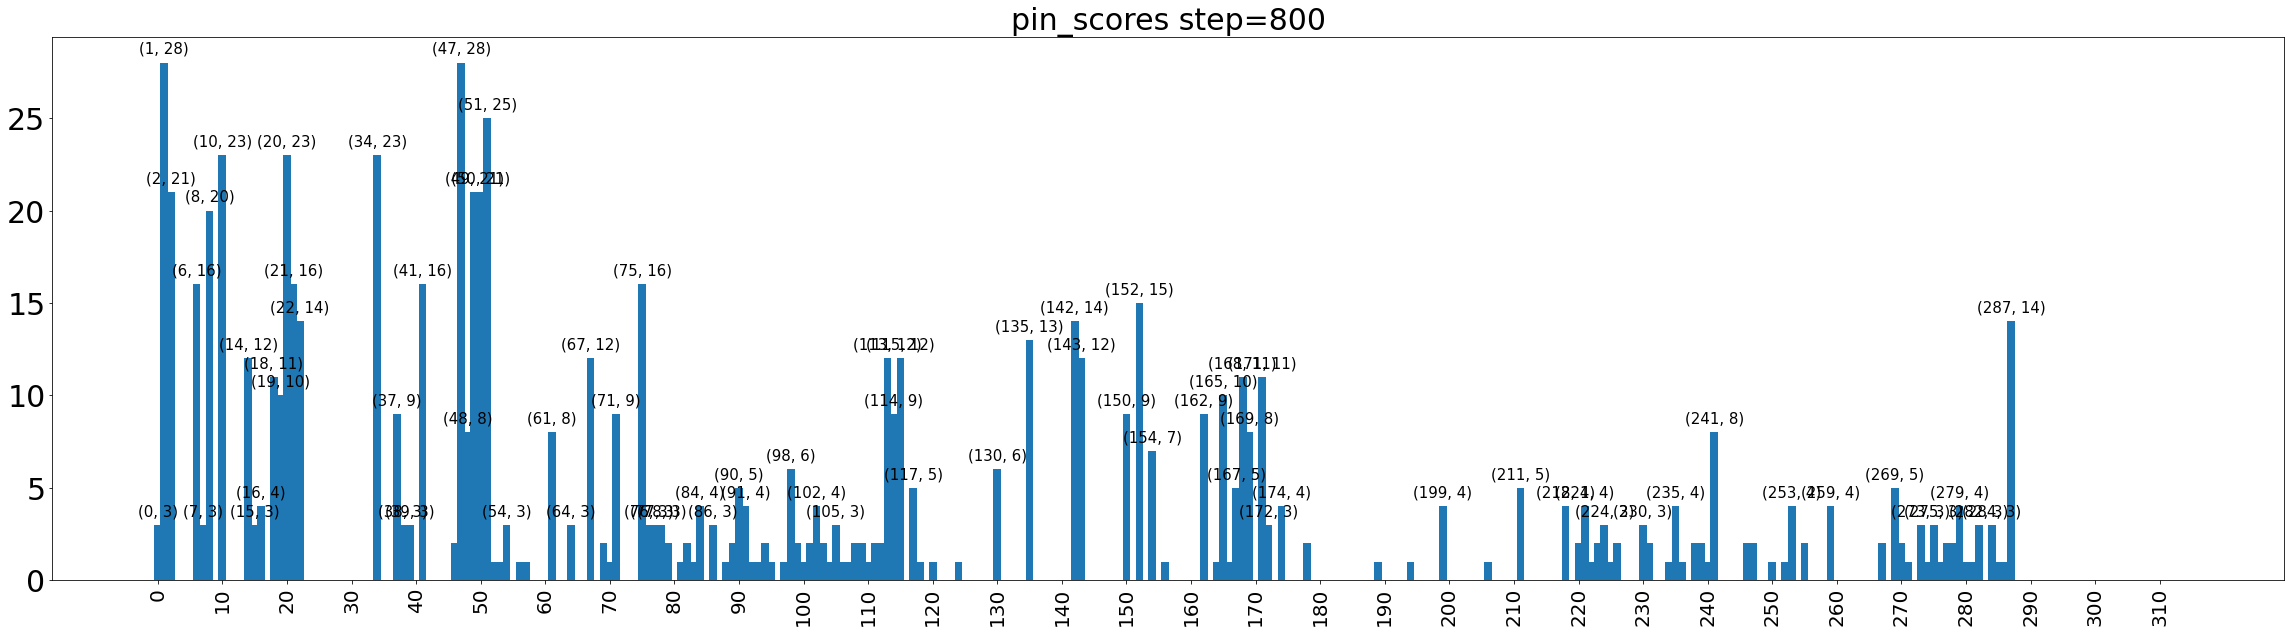

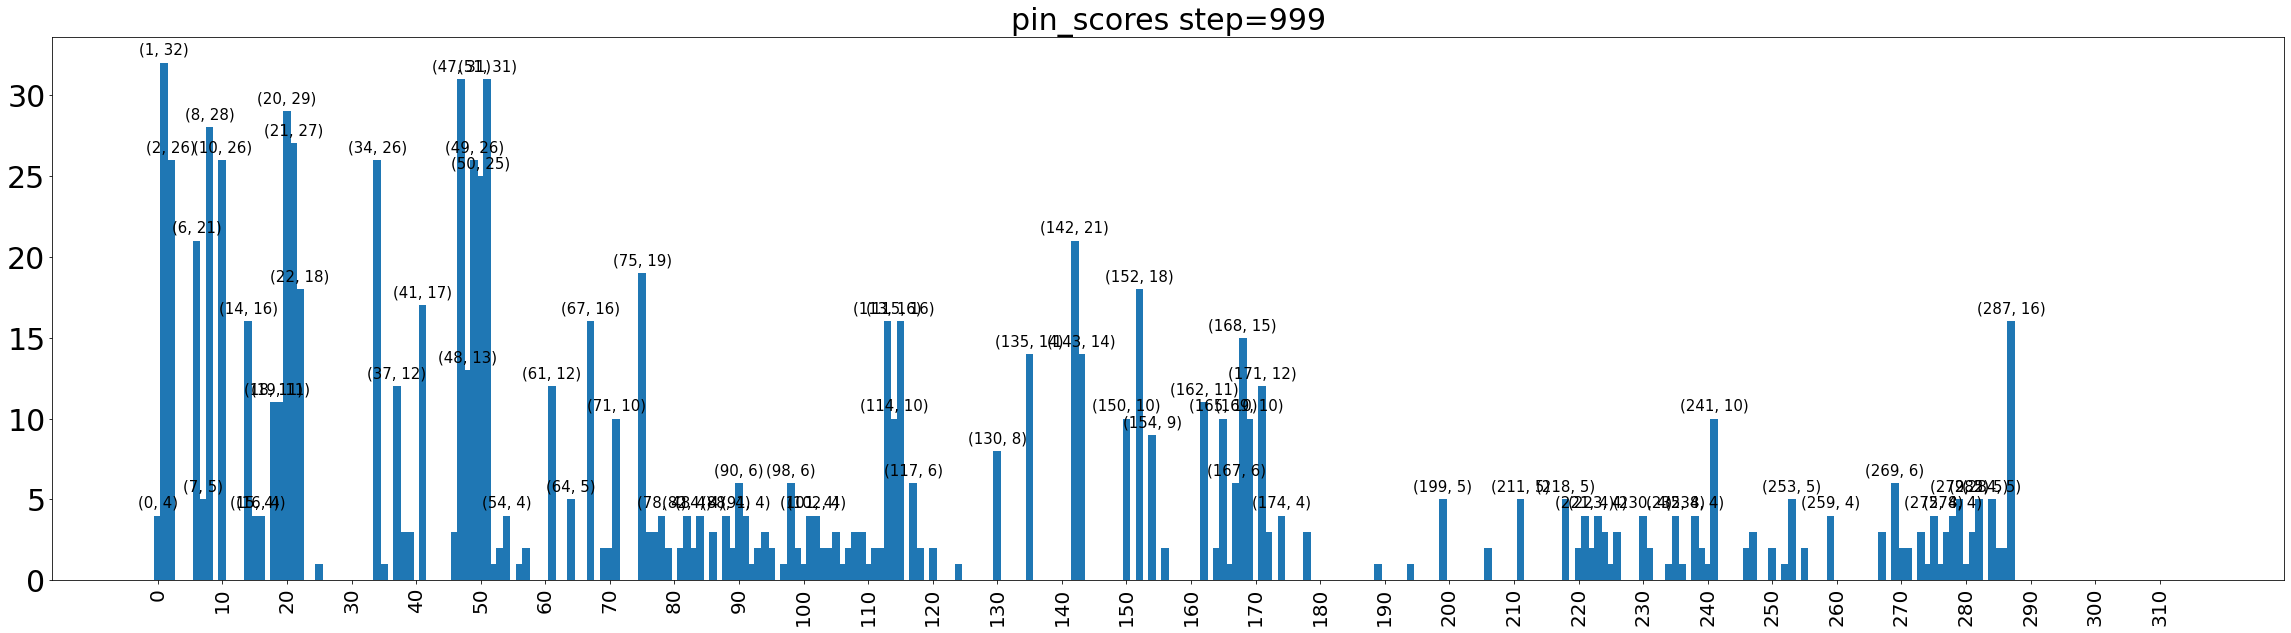

In [46]:
car_nodes_rdd, camera_nodes_rdd = get_car_and_camera_nodes(hour_of_day=7)

query_camera = 50
camera_scores = Pixie_Algorithm(query_camera, PIN_NODES=camera_nodes_rdd, BOARD_NODES=car_nodes_rdd,
                N_STEPS=1000, ALPHA=0.3, EARLY_STOPPING=40)

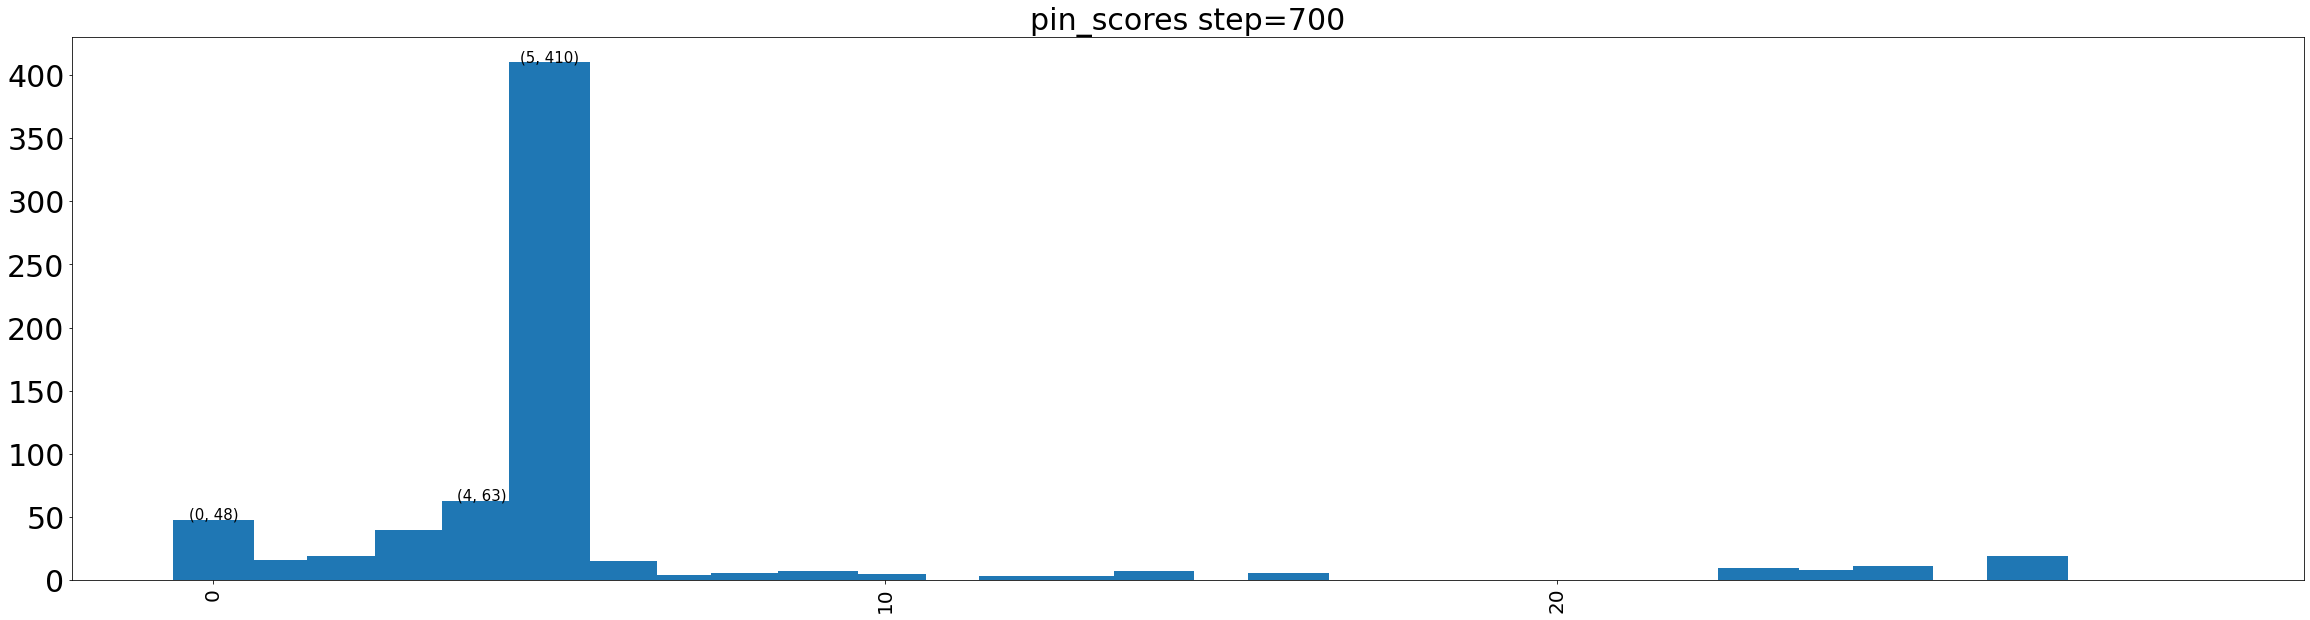

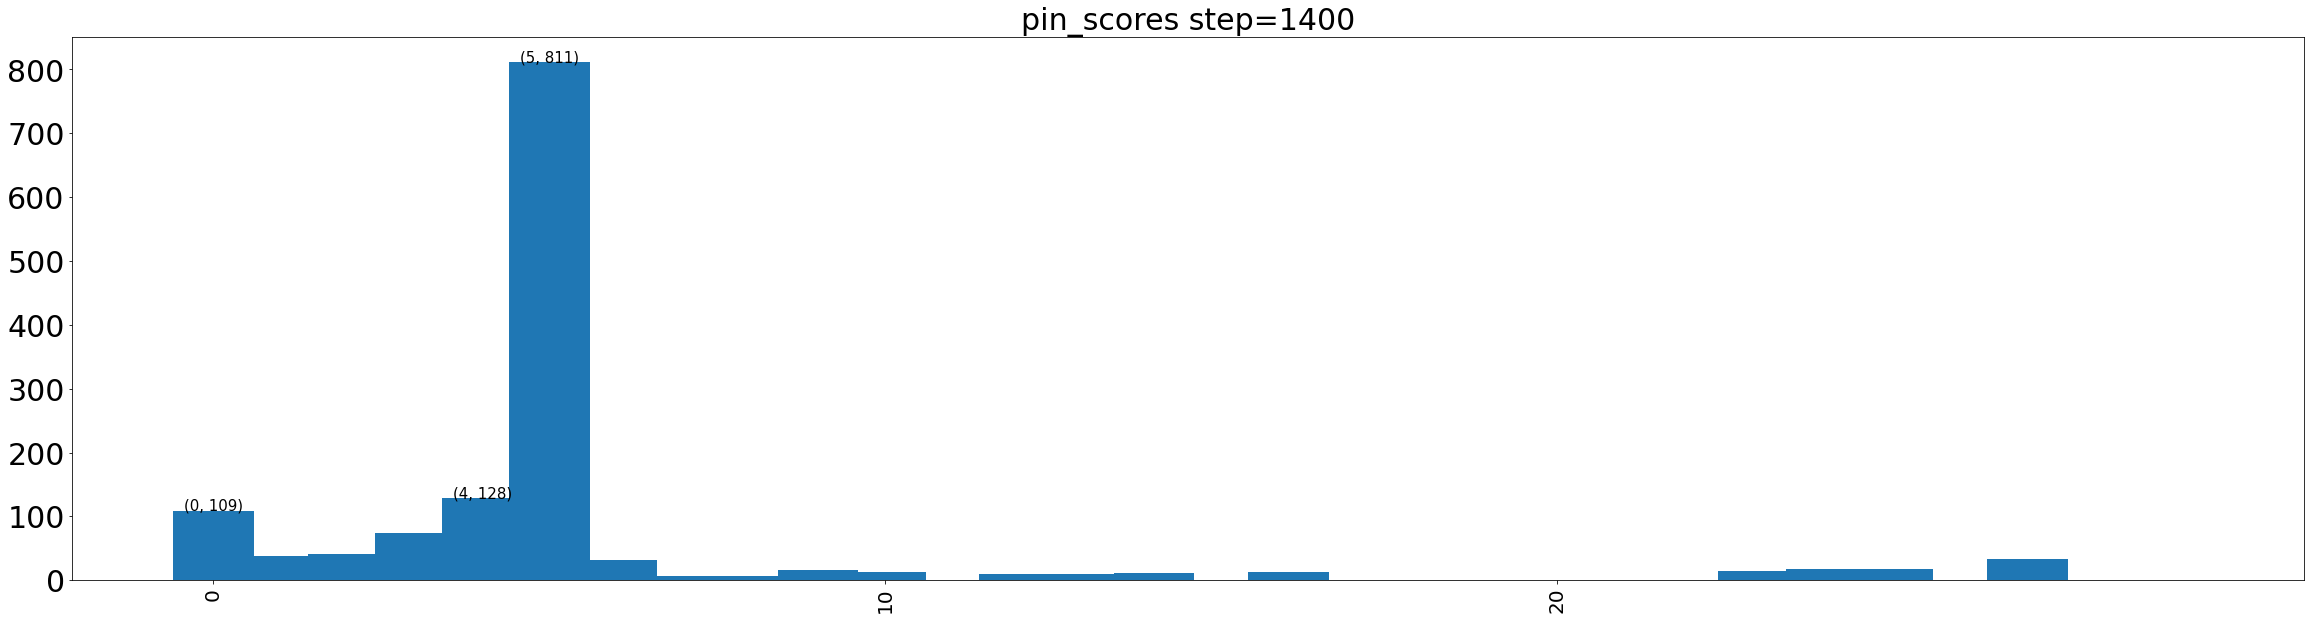

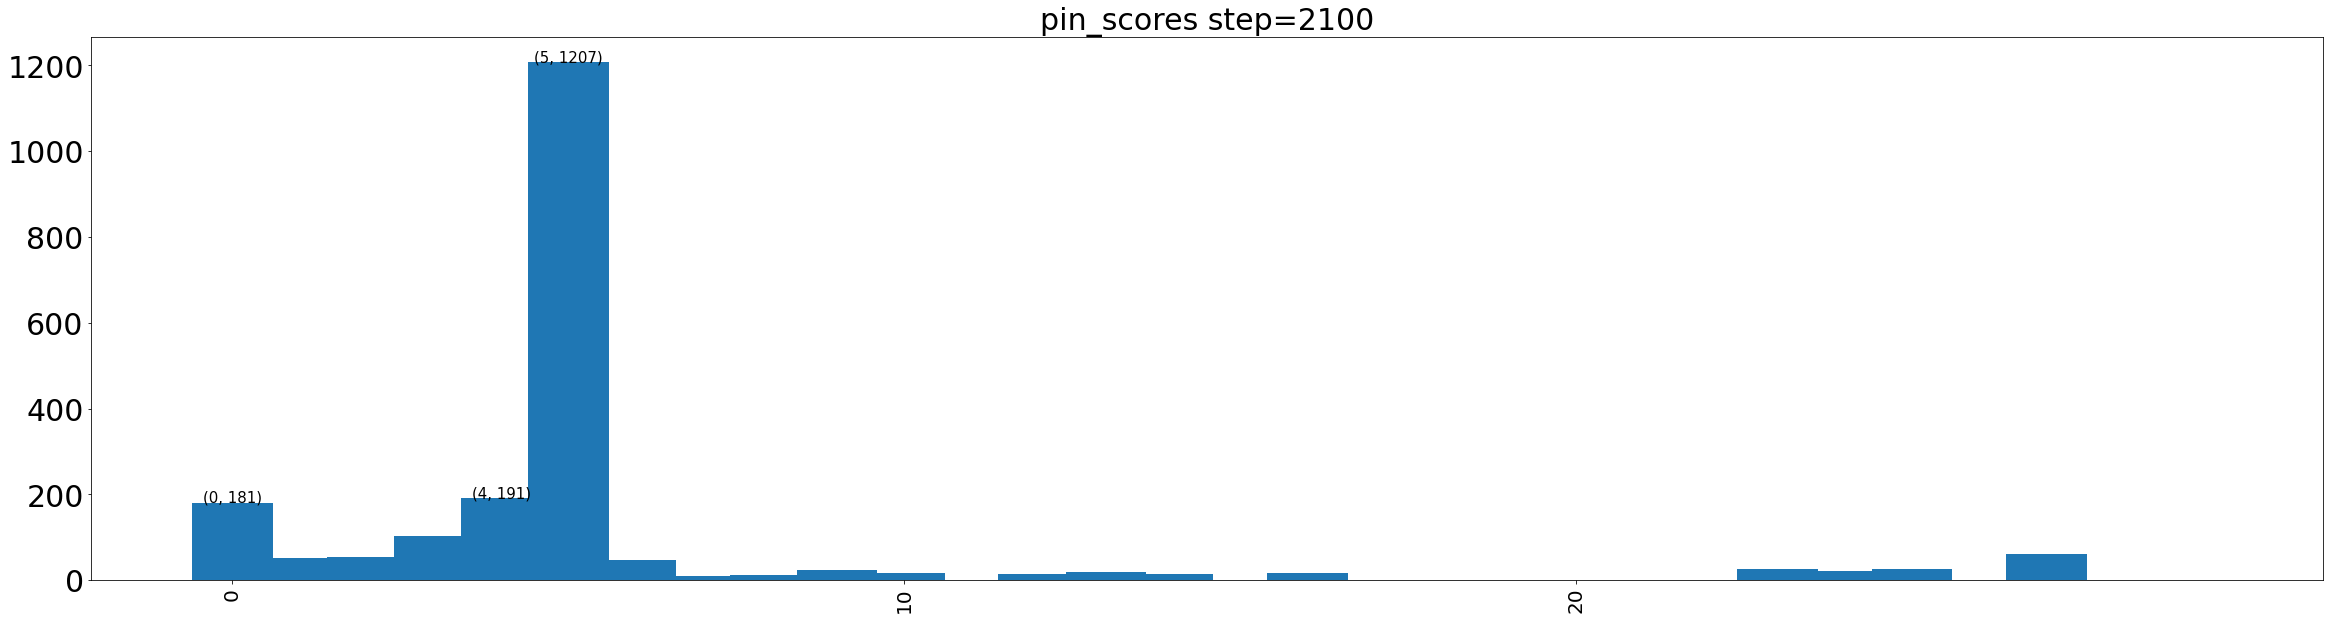

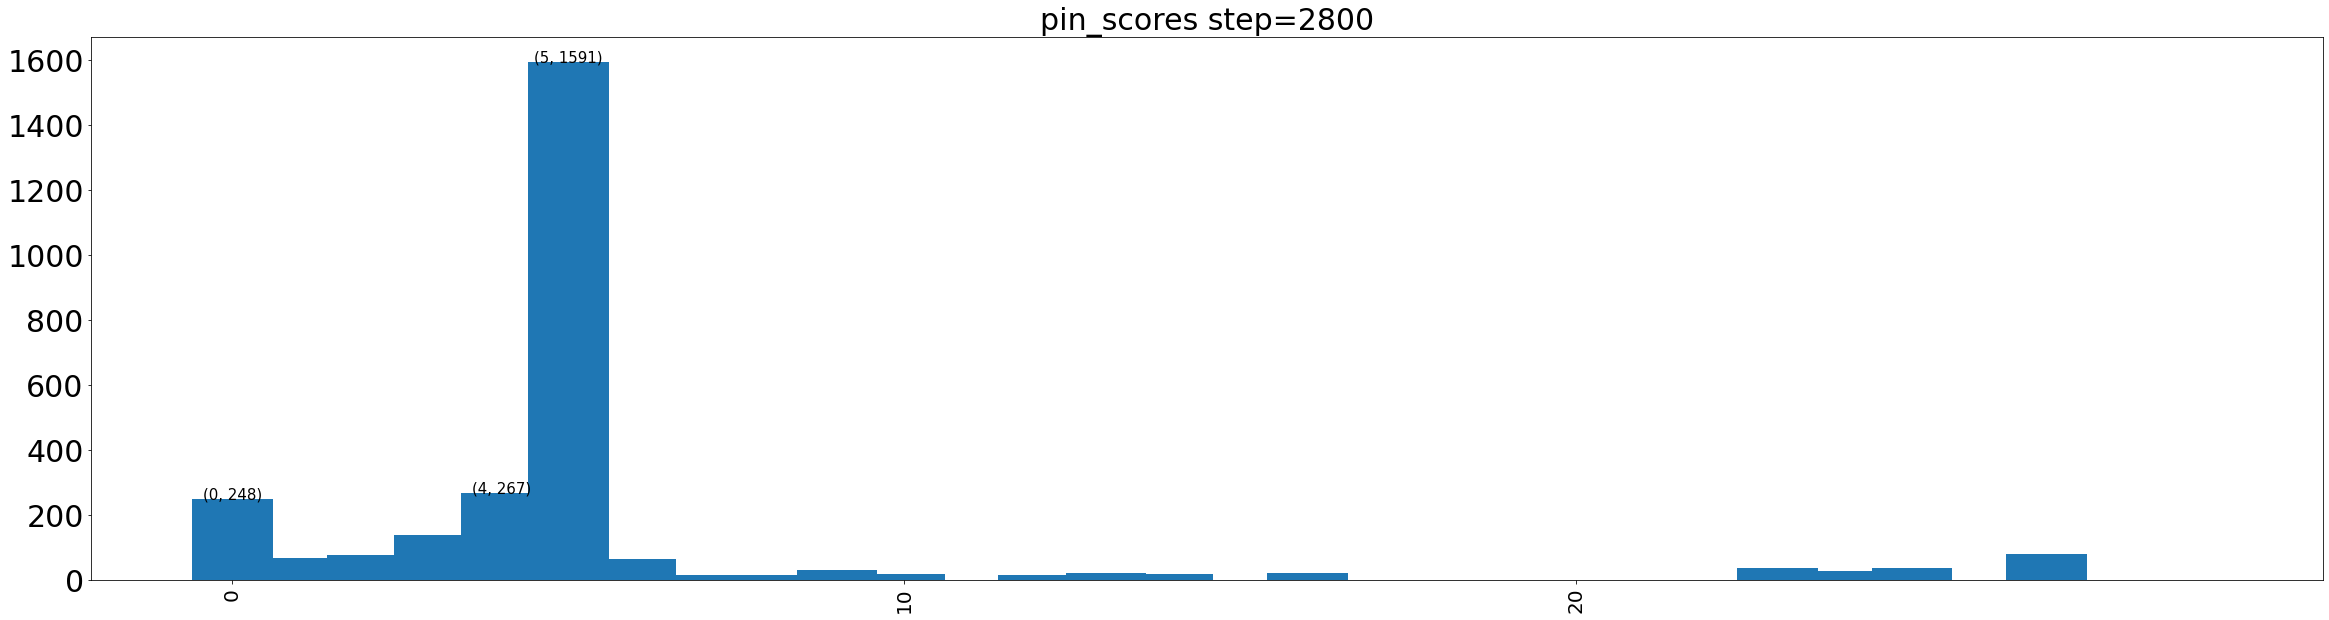

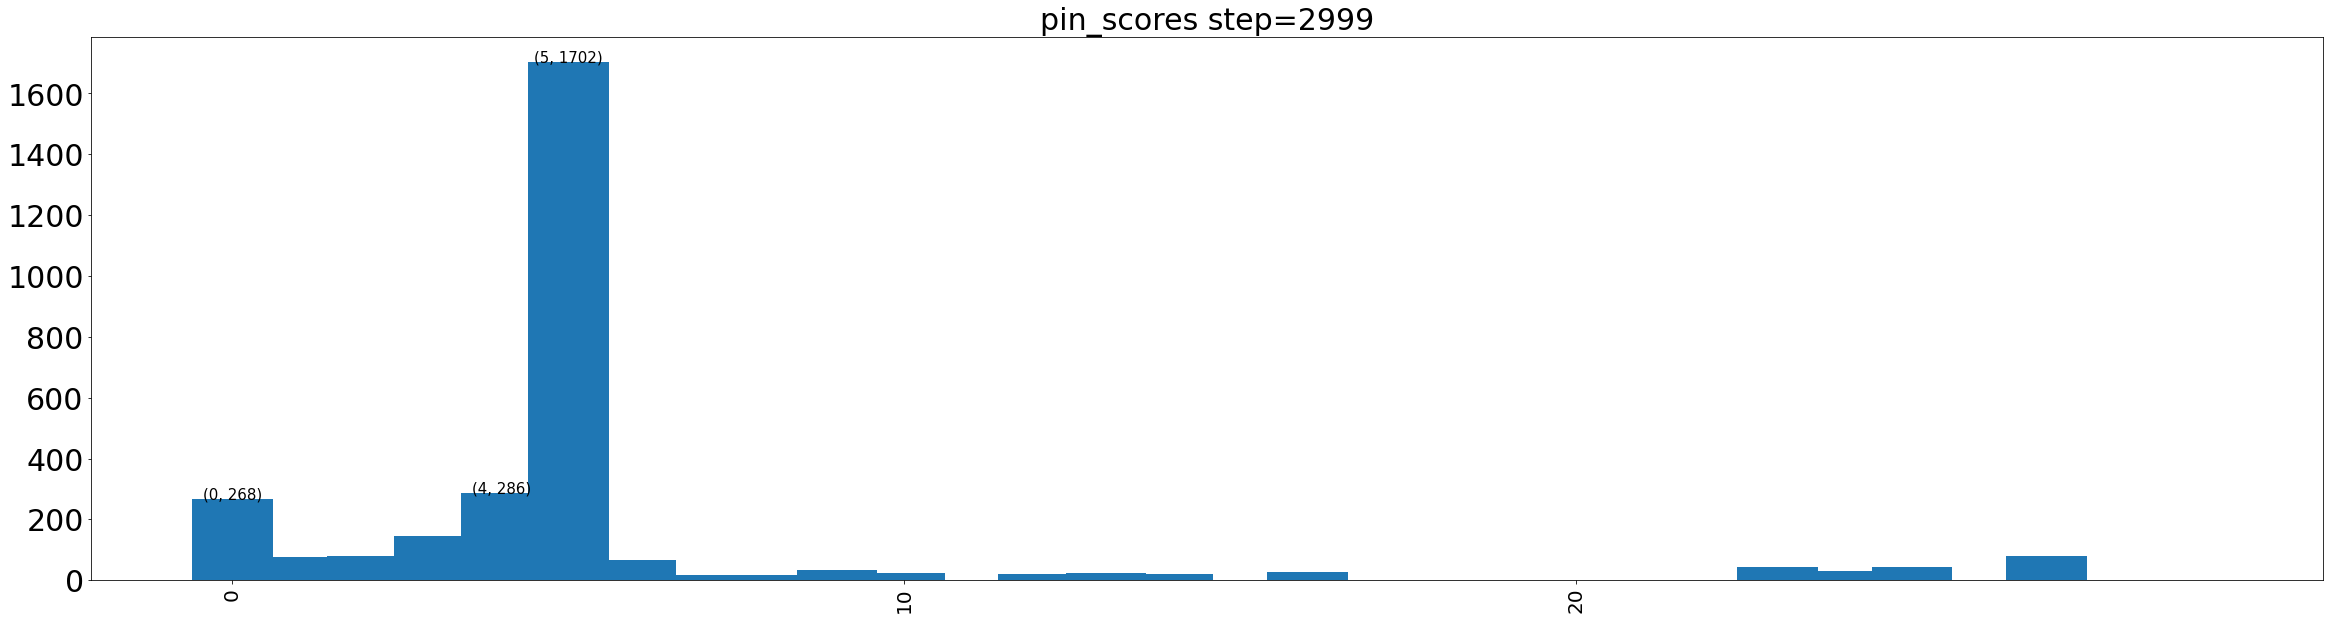

In [47]:
query_car = 5
car_scores = Pixie_Algorithm(query_car, PIN_NODES=car_nodes_rdd, BOARD_NODES=camera_nodes_rdd,
                N_STEPS=3000, ALPHA=0.5, EARLY_STOPPING=70)

## Part F
SVD

In [48]:
df_car_counts = df_cleaned.groupBy('FINAL_CAR_KEY').count()
df_car_counts.sort('count', ascending=False).show(10)

+-------------+------+
|FINAL_CAR_KEY| count|
+-------------+------+
|     69177480|320860|
|      8073331|147087|
|     91715532|  3033|
|      7633319|  2208|
|      7682972|  1834|
|      8282689|  1667|
|     12481252|  1655|
|      8396536|  1651|
|     76478733|  1644|
|     70522715|  1597|
+-------------+------+
only showing top 10 rows



In [51]:
support_threshold = int(top_frequent_car * 0.004)
frequent_cars_list = df_car_counts.filter(col('count') > support_threshold) \
  .select(col('FINAL_CAR_KEY')).rdd.flatMap(lambda x: x).collect()
  
df_camera_car_count = df_cleaned.filter(df_cleaned['FINAL_CAR_KEY'].isin(frequent_cars_list)) \
  .groupBy('DEVICE_CODE', 'FINAL_CAR_KEY').count() \
    .sort('count', ascending=False)
  
df_camera_car_count.show()

+-----------+-------------+-----+
|DEVICE_CODE|FINAL_CAR_KEY|count|
+-----------+-------------+-----+
|   22010043|     69177480|51678|
|   22010061|     69177480|47835|
|   22009830|      8073331|41143|
|   22010039|     69177480|30859|
|   22010040|     69177480|27938|
|   22010053|     69177480|27734|
|   22010047|     69177480|22935|
|   22010044|     69177480|17203|
|   22010048|     69177480|13382|
|   22010054|     69177480|12918|
|   22010053|      8073331|11318|
|  100701119|     69177480|10735|
|   22010054|      8073331|10135|
|     631634|      8073331| 7721|
|     631633|      8073331| 7632|
|   22010079|     69177480| 7516|
|   22010058|      8073331| 6774|
|   22010056|     69177480| 6563|
|   22010048|      8073331| 5624|
|   22010072|      8073331| 4943|
+-----------+-------------+-----+
only showing top 20 rows



In [52]:
from pyspark.ml.feature import StringIndexer

df_camera_car_indexed = StringIndexer(inputCol='FINAL_CAR_KEY', outputCol='CAR_INDEX').fit(df_camera_car_count).transform(df_camera_car_count)
df_camera_car_indexed = StringIndexer(inputCol='DEVICE_CODE', outputCol='CAMERA_INDEX').fit(df_camera_car_indexed).transform(df_camera_car_indexed)
df_camera_car_indexed.show(5)

+-----------+-------------+-----+---------+------------+
|DEVICE_CODE|FINAL_CAR_KEY|count|CAR_INDEX|CAMERA_INDEX|
+-----------+-------------+-----+---------+------------+
|   22010043|     69177480|51678|      5.0|       400.0|
|   22010061|     69177480|47835|      5.0|       319.0|
|   22009830|      8073331|41143|      0.0|       493.0|
|   22010039|     69177480|30859|      5.0|       315.0|
|   22010040|     69177480|27938|      5.0|       316.0|
+-----------+-------------+-----+---------+------------+
only showing top 5 rows



In [104]:
(df_camera_car_indexed.select('CAR_INDEX').distinct().count(),
 df_camera_car_indexed.select('CAMERA_INDEX').distinct().count())

(31, 543)

In [105]:
from pyspark.mllib.linalg.distributed import CoordinateMatrix

utility_matrix = CoordinateMatrix(df_camera_car_indexed.rdd.map(lambda x: (int(x['CAR_INDEX']), int(x['CAMERA_INDEX']), x['count']) ))
utility_matrix.numRows(), utility_matrix.numCols()

(31, 543)

In [106]:
svd = utility_matrix.toRowMatrix().computeSVD(50, computeU=True)
print(np.array(svd.U.rows.map(lambda x: x).collect()).shape, len(svd.s), svd.V.toArray().shape)

(31, 31) 31 (543, 31)


In [107]:
svd.s

DenseVector([94996.5151, 46825.1101, 3033.0002, 1750.3285, 1037.4065, 859.9504, 843.8719, 740.8419, 579.638, 552.4027, 542.3892, 526.6429, 493.2733, 434.3537, 381.544, 321.0757, 265.98, 259.6498, 209.6784, 204.1681, 181.3532, 177.0864, 148.4954, 137.0058, 128.8764, 123.4247, 112.8016, 109.7047, 86.646, 57.1762, 21.899])

In [108]:
def Energy(vec):
  e = 0
  for v in vec:
    e += v*v
  return e

def number_of_latent_factors(vector, energy_percent):
  total_energy = Energy(vector)
  latent_list = vector.copy()
  r = len(latent_list)
  while(Energy(latent_list) / total_energy >= energy_percent):
    # print(Energy(latent_list) / total_energy)
    latent_list.pop()
    r -= 1
  return r

In [109]:
r = number_of_latent_factors(list(svd.s), 0.98)

svd_u = np.array(svd.U.rows.map(lambda x: x).collect())[:,:r]
svd_s = np.diag(svd.s[:r])
svd_v = svd.V.toArray().transpose()[:r]

print(svd_u.shape, svd_s.shape, svd_v.shape)

(31, 1) (1, 1) (1, 543)


In [110]:
r=3

In [111]:
import numpy as np

svd_u = np.array(svd.U.rows.map(lambda x: x).collect())[:,:r]
svd_s = np.diag(svd.s[:r])
svd_v = svd.V.toArray().transpose()[:r]

mat_ = svd_u.dot(svd_s).dot(svd_v)
mat_.shape


(31, 543)

In [112]:
utility_matrix_list = utility_matrix.toRowMatrix().rows.map(lambda x: x).collect() 
utility_matrix_list[:2]

[SparseVector(543, {1: 1.0, 3: 2.0, 4: 693.0, 5: 1.0, 6: 1.0, 7: 23.0, 8: 1.0, 9: 1.0, 10: 1.0, 14: 1.0, 21: 1.0, 25: 12.0, 27: 1.0, 28: 1.0, 29: 3.0, 30: 5.0, 36: 3.0, 44: 1.0, 47: 2.0, 52: 1.0, 59: 8.0, 60: 1.0, 61: 793.0, 66: 3.0, 71: 1.0, 74: 1.0, 76: 1.0, 82: 2.0, 86: 4.0, 88: 1.0, 95: 1.0, 99: 1.0, 102: 2.0, 107: 2.0, 114: 1.0, 115: 1.0, 130: 3.0, 139: 2.0, 140: 1.0, 149: 1.0, 150: 1.0, 153: 1.0, 154: 2.0, 157: 181.0, 164: 46.0, 173: 1.0, 174: 1.0, 193: 1.0, 202: 1.0, 203: 2.0, 212: 1.0, 235: 5.0, 281: 1.0, 285: 1.0, 291: 1.0, 340: 1.0, 355: 1.0, 357: 1.0}),
 SparseVector(543, {0: 1.0, 1: 51.0, 2: 1.0, 4: 102.0, 5: 17.0, 6: 2.0, 7: 114.0, 9: 16.0, 10: 1.0, 11: 17.0, 13: 2.0, 14: 3.0, 16: 1.0, 17: 3.0, 18: 3.0, 20: 40.0, 21: 68.0, 22: 9.0, 24: 42.0, 25: 1.0, 28: 6.0, 30: 1.0, 32: 9.0, 33: 50.0, 34: 37.0, 35: 4.0, 36: 100.0, 37: 18.0, 38: 1.0, 41: 1.0, 43: 12.0, 45: 18.0, 47: 1.0, 51: 61.0, 52: 4.0, 56: 1.0, 57: 1.0, 61: 5.0, 65: 20.0, 66: 1.0, 67: 1.0, 68: 1.0, 70: 4.0, 71: 95.0, 

In [113]:
np.sqrt(np.sum(np.power(utility_matrix_list - mat_, 2)))

2903.5150075450424

**SVD_U First column**

In [114]:
top_svdU_1_idx = __builtin__.abs(svd_u[:,0]).argsort()[-5:][::-1]
print(top_svdU_1_idx, '\n', __builtin__.abs(svd_u[:,0])[top_svdU_1_idx])

def Pandas_SVD_U(top_svdU_idx, k=2):
  for idx, _ in zip(top_svdU_idx, range(k)):
    top_svdU_car = df_camera_car_indexed.toPandas() \
          .loc[df_camera_car_indexed.toPandas()['CAR_INDEX'] == idx, 'FINAL_CAR_KEY'].iloc[0]
    Pandas_df_svd = df_cleaned.filter(df_cleaned.FINAL_CAR_KEY==int(top_svdU_car)) \
          .select('FINAL_CAR_KEY', 'PASS_DAY_TIME', 'DEVICE_CODE') \
            .sort('PASS_DAY_TIME').limit(100).toPandas()
    display(Pandas_df_svd)
  
Pandas_SVD_U(top_svdU_1_idx, k=1)

[29 13 17 30 20] 
 [9.95289633e-01 9.69459742e-02 1.42333216e-04 4.26614613e-05
 4.18048872e-05]


,FINAL_CAR_KEY,PASS_DAY_TIME,DEVICE_CODE
0,8552081,2021-12-22 08:03:35,900185
1,8552081,2021-12-22 08:27:35,22010031
2,8552081,2021-12-22 08:29:50,100700864
3,8552081,2021-12-22 09:01:14,163
4,8552081,2021-12-22 09:02:57,900239
...,...,...,...
95,8552081,2021-12-23 16:45:56,900151
96,8552081,2021-12-23 16:48:13,100700864
97,8552081,2021-12-23 17:08:25,900151
98,8552081,2021-12-23 17:24:34,900148


**SVD_U Second column**

In [117]:
top_svdU_2_idx = __builtin__.abs(svd_u[:,1]).argsort()[-5:][::-1]
print(top_svdU_2_idx, '\n', __builtin__.abs(svd_u[:,1])[top_svdU_2_idx])

Pandas_SVD_U(top_svdU_2_idx, k=1)

[13 29 17 30 20] 
 [9.95289603e-01 9.69460137e-02 2.29600068e-04 9.28238393e-05
 9.25399811e-05]


,FINAL_CAR_KEY,PASS_DAY_TIME,DEVICE_CODE
0,7635415,2021-12-22 07:09:01,100
1,7635415,2021-12-22 07:29:50,232
2,7635415,2021-12-22 07:30:08,114
3,7635415,2021-12-22 07:30:31,202101
4,7635415,2021-12-22 07:32:37,101301
...,...,...,...
95,7635415,2021-12-24 09:59:26,900185
96,7635415,2021-12-24 10:00:34,213401
97,7635415,2021-12-24 10:01:09,213402
98,7635415,2021-12-24 10:02:09,153


**SVD_U third column**

In [116]:
top_svdU_3_idx = __builtin__.abs(svd_u[:,2]).argsort()[-5:][::-1]
print(top_svdU_3_idx, '\n', __builtin__.abs(svd_u[:,2])[top_svdU_3_idx])

Pandas_SVD_U(top_svdU_3_idx, k=1)

[10 24 13 21 29] 
 [9.99999944e-01 3.33790410e-04 3.53250991e-06 2.63314378e-06
 1.77434841e-06]


,FINAL_CAR_KEY,PASS_DAY_TIME,DEVICE_CODE
0,23733983,2021-12-22 09:38:48,900151
1,23733983,2021-12-22 09:41:52,156
2,23733983,2021-12-22 09:47:14,211301
3,23733983,2021-12-22 09:49:46,900242
4,23733983,2021-12-22 10:11:54,163
...,...,...,...
95,23733983,2021-12-24 10:41:30,22009923
96,23733983,2021-12-24 10:46:02,145
97,23733983,2021-12-24 10:49:20,230106
98,23733983,2021-12-24 10:50:55,900221


## Part E
***Hits***


### Part E01

In [69]:
from pyspark.ml.feature import StringIndexer
from pyspark.sql.types import IntegerType
from pyspark.sql.window import Window

window = Window.partitionBy('FINAL_CAR_KEY', 'day_of_year').orderBy('FINAL_CAR_KEY','PASS_DAY_TIME')

df_camera_nextcamera_count = StringIndexer(inputCol='DEVICE_CODE', outputCol='camera').fit(df_cleaned).transform(df_cleaned) \
  .withColumn('camera', col('camera').cast(IntegerType())) \
    .withColumn('day_of_year', dayofyear('PASS_DAY_TIME')) \
      .withColumn('next_camera', lead('camera', offset=1,  default=-1).over(window)) \
        .filter((col('next_camera') != -1) & (col('next_camera') != col('camera'))) \
          .groupBy('camera', 'next_camera').count()

df_camera_nextcamera_count.sort('count', ascending=False).show(5)

+------+-----------+-------+
|camera|next_camera|  count|
+------+-----------+-------+
|     0|          1|1635667|
|     7|          0| 714129|
|     1|          9| 569729|
|     5|         22| 387561|
|    10|         11| 348296|
+------+-----------+-------+
only showing top 5 rows



In [70]:
from pyspark.mllib.linalg.distributed import CoordinateMatrix

utility_matrix = CoordinateMatrix(df_camera_nextcamera_count.rdd.map(lambda x: (int(x['camera']), int(x['next_camera']), x['count'])) )

In [78]:
svd = utility_matrix.toRowMatrix().computeSVD(10, computeU=True)

In [72]:
print(np.array(svd.U.rows.map(lambda x: x).collect()).shape)
print(len(svd.s))
print(svd.V.toArray().shape)

(982, 10)
10
(982, 10)


In [73]:
print(svd.s)
r = number_of_latent_factors(list(svd.s), 0.9)

svd_u = np.array(svd.U.rows.map(lambda x: x).collect())[:,:r]
svd_s = np.diag(svd.s[:r])
svd_v = svd.V.toArray().transpose()[:r]

[1663436.9826646096,857855.3153966847,699949.4187993783,508300.02368176106,463449.92294584424,430197.11263801676,411922.07419164956,356370.6938698463,339634.75177733635,336355.89089394175]


In [74]:
print(svd_u.shape, svd_s.shape, svd_v.shape)

(982, 6) (6, 6) (6, 982)


In [75]:
def normalize_norm2(x):
  return x / np.sqrt(np.sum(x**2))

def normalize(x):
  return x / np.sum(x)

hubs = normalize_norm2(svd_u[:,0])
authorities = normalize_norm2(svd_v[0])

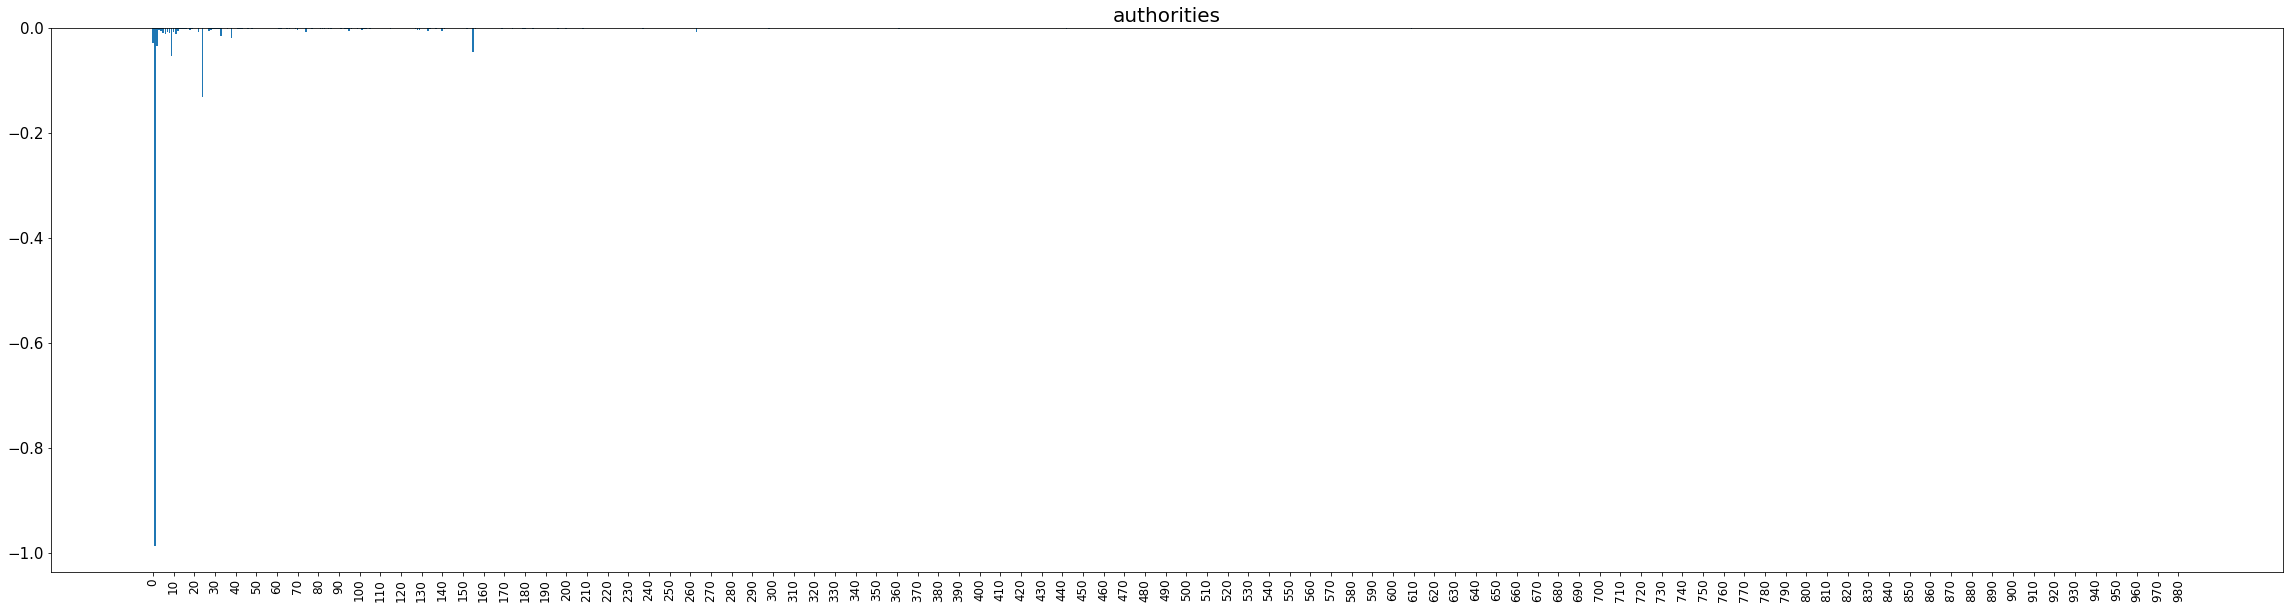

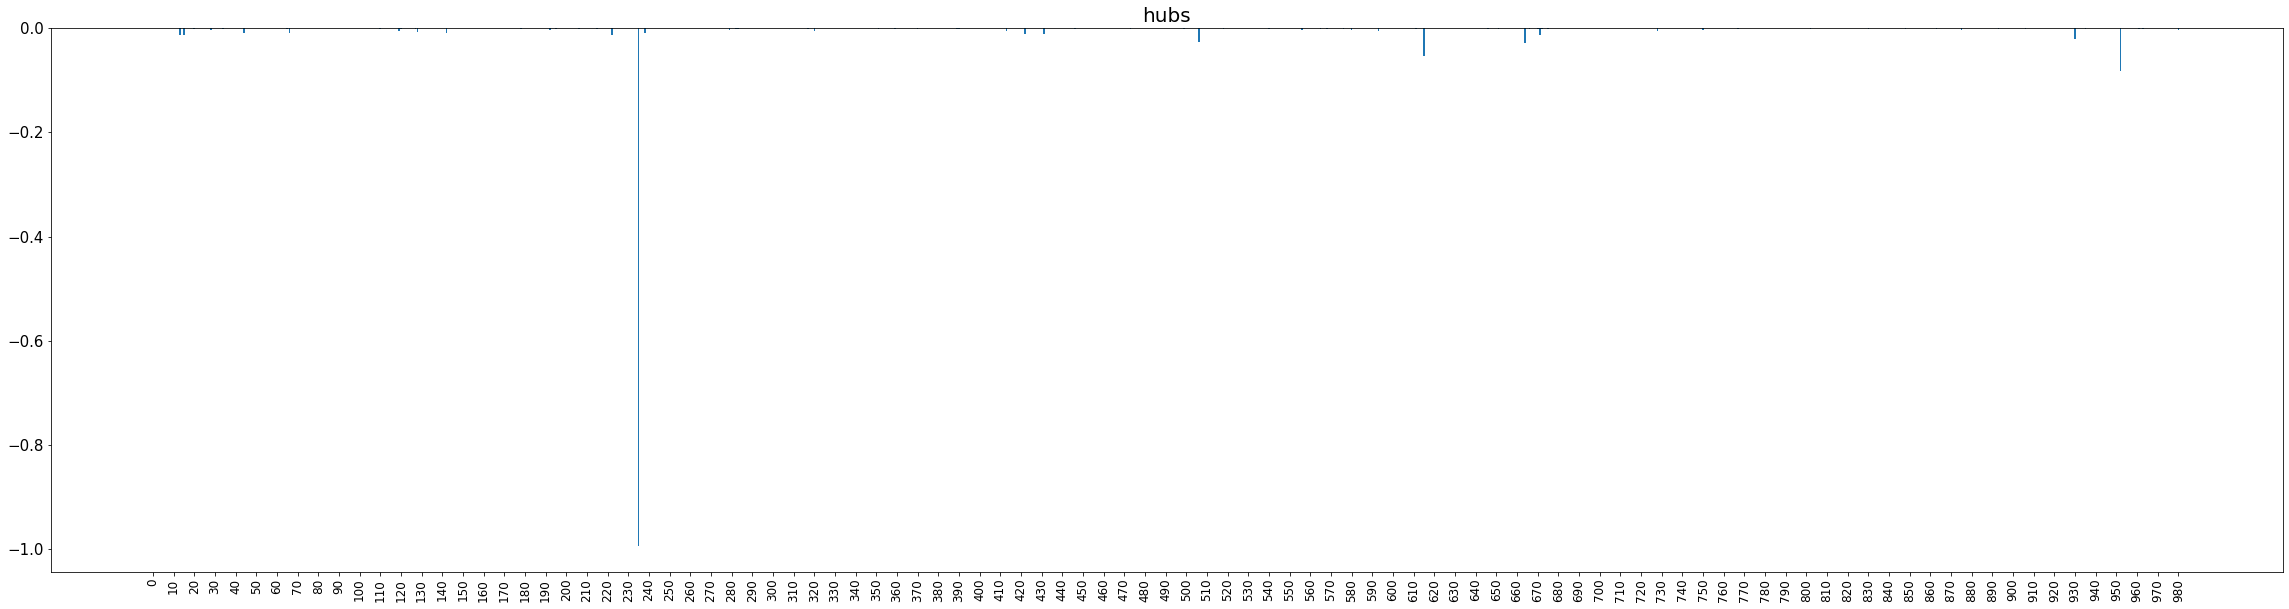

In [76]:
from matplotlib import pyplot as plt

def plot_hits(input_list, title='hits'):
  fig = plt.figure(figsize = (40, 10))
  labels = [i for i, e in enumerate(input_list)]
  plt.bar(labels, input_list, width = 0.8)
  plt.xticks([i for i, _ in enumerate(input_list) if i%10==0],
             rotation='vertical',fontsize=12)
  plt.yticks(fontsize=15)
  plt.title(title, fontsize=20)
  plt.show()

def plot_camera_hits():
  plot_hits(authorities, 'authorities')
  plot_hits(hubs, 'hubs')
plot_camera_hits()

In [91]:
import pandas as pd

def top_hits(input, k=10, title='hits'):
  top_list = sorted([(i,x) for i,x in enumerate(input)], key = lambda x: -1*__builtin__.abs(x[1]))[:k]
  top_df = pd.DataFrame({'camera_index':[i[0] for i in top_list], f'{title}_score':[i[1] for i in top_list]})
  display(top_df)

def top_camera_hits(k=10):
  top_hits(authorities, k, 'authorities')
  top_hits(hubs, k, 'hubs')

top_camera_hits(k=10)

,camera_index,authorities_score
0,1,-0.986943
1,24,-0.131919
2,9,-0.053774
3,155,-0.045103
4,2,-0.034345
5,0,-0.029072
6,38,-0.018786
7,33,-0.014212
8,6,-0.011522
9,11,-0.010284


,camera_index,hubs_score
0,235,-0.993330
1,952,-0.082107
2,615,-0.054167
3,664,-0.029287
4,506,-0.025872
5,930,-0.020418
6,222,-0.013493
7,671,-0.013481
8,15,-0.013308
9,13,-0.013094


## Part G(Extra)
***PageRank***

In [ ]:
path_df = df_cleaned.select(col("PASS_DAY_TIME").alias('time'), col("FINAL_CAR_KEY").alias('car'), col("DEVICE_CODE").alias('camera')) \
.groupby("car", dayofyear("time")) \
.agg(collect_set(struct("time", "camera")).alias("list_col"))
path_df.show(3)

+-------+---------------+--------------------+
|    car|dayofyear(time)|            list_col|
+-------+---------------+--------------------+
|7631926|             11|[{2022-01-11 23:1...|
|7631935|             13|[{2022-01-13 09:1...|
|7631941|              2|[{2022-01-02 19:4...|
+-------+---------------+--------------------+
only showing top 3 rows



In [ ]:
import operator

def path_find(row_detail):
  res = sorted(row_detail, key=operator.itemgetter(0))
  items = [item[1] for item in res]
  if(len(items) > 1):
    return items

path_udf = udf(lambda x: path_find(x), ArrayType(IntegerType()))
path_df = path_df.withColumn("paths", path_udf(col("list_col")))
path_df = path_df.select(col("car"), col("paths")).rdd.filter(lambda x: x[1] != None)
path_df.take(10)

[Row(car=7632116, paths=[900259, 900268]),
 Row(car=7632244, paths=[900102, 900234, 230106]),
 Row(car=7632404, paths=[200902, 114, 103]),
 Row(car=7632420, paths=[631829, 631360]),
 Row(car=7632550, paths=[900222, 631634]),
 Row(car=7632550, paths=[900273, 631634]),
 Row(car=7632644, paths=[900221, 631349, 900221]),
 Row(car=7632773, paths=[900226, 900269]),
 Row(car=7633171, paths=[631633, 900202]),
 Row(car=7633248, paths=[22010040, 114])]

In [ ]:
def path_build(path_list):
  out_list = []

  for i in range(len(path_list) - 1):
    out_list.append((path_list[i], {path_list[i+1]}))
  return out_list

# pred_list = path_df.flatMap(lambda x: path_build(x[1])).take(5) 
pred_list = path_df.flatMap(lambda x: path_build(x[1])) \
    .reduceByKey(lambda x,y : x|y)
pred_list = pred_list.cache()
# pred_list.take(3)

In [ ]:
def computeContribs(neighbors, rank):   
    num_neighbors = len(neighbors)
    for neigh in neighbors:
        yield (neigh, rank / num_neighbors)

def pagerank(ranks, alpha, thresh = 0.01):
  range_convergence = int(np.log10(thresh) / np.log10(1 - alpha)) + 1
  # Calculates and updates Neighbor ranks continuously using PageRank algorithm.
  for i in range(range_convergence):
    # Calculates point contributions to the rank of other points.
    contribs = pred_list.join(ranks).flatMap(
        lambda point_neigh_rank: computeContribs(point_neigh_rank[1][0], point_neigh_rank[1][1]))
    # Re-calculates point ranks based on neighbor contributions.
    ranks = contribs.reduceByKey(operator.add).mapValues(lambda rank: rank * (1 - alpha) + alpha)
  return ranks

# initialize rank of all points to 1
ranks = df_cleaned.select(col("DEVICE_CODE")).distinct().rdd.map(lambda x: (x[0], 1.0))
ranks = pagerank(ranks, 0.15, 0.001)
ranks = ranks.sortBy(lambda a: -a[1])

In [ ]:
ranks.take(40)

[(22010054, 6.727262404946119),
 (22010053, 6.320672420594088),
 (22010040, 5.2468044915169685),
 (22010039, 4.9175756254102945),
 (22010048, 4.427198845321739),
 (900244, 4.256829124389911),
 (631357, 3.9285370510441946),
 (22010047, 3.9101001109573095),
 (22010078, 3.8682823381019618),
 (22010083, 3.810132137112918),
 (114, 3.7549516385958452),
 (100700853, 3.719563759294639),
 (900269, 3.6833020798139744),
 (631368, 3.6674408758887886),
 (100700841, 3.6623631905477083),
 (100701263, 3.6048684561275204),
 (100701299, 3.60126382141369),
 (631795, 3.597447913805884),
 (175, 3.5896407207090935),
 (100701119, 3.582833838877364),
 (900225, 3.5748755711922438),
 (22010044, 3.54593198028092),
 (900212, 3.4670587429467195),
 (900191, 3.4569767648681067),
 (22010080, 3.4539515709202933),
 (900101, 3.3795144235548045),
 (22010084, 3.3527704400610654),
 (900222, 3.345075214341231),
 (203902, 3.2849746789879912),
 (900236, 3.2671901683070677),
 (22010060, 3.264177644449345),
 (100701266, 3.21105